In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels
                     for the columns
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Arguments:
        im         : The AxesImage to be labeled.
    Optional arguments:
        data       : Data used to annotate. If None, the image's data is used.
        valfmt     : The format of the annotations inside the heatmap.
                     This should either use the string format method, e.g.
                     "$ {x:.2f}", or be a :class:`matplotlib.ticker.Formatter`.
        textcolors : A list or array of two color specifications. The first is
                     used for values below a threshold, the second for those
                     above.
        threshold  : Value in data units according to which the colors from
                     textcolors are applied. If None (the default) uses the
                     middle of the colormap as separation.

    Further arguments are passed on to the created text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


def heat_map(data):
    
    ax = sns.heatmap(data, linewidth=0.5)
    plt.show()

In [3]:
# def heat_map(V):
    
#     fig, ax = plt.subplots()

#     im, cbar = heatmap(V, range(10), range(10), ax=ax,
#                        cmap="YlGn", cbarlabel="Optimal Value Function")
    
#     texts = annotate_heatmap(im, valfmt="{x:.1f}")

#     fig.tight_layout()
#     plt.show()

In [4]:
# def heat_map(V, X):

#     fig, ax = plt.subplots()
#     im = ax.imshow(V)

#     # We want to show all ticks...
#     ax.set_xticks(np.arange(len(X)))
#     ax.set_yticks(np.arange(len(X)))
#     # ... and label them with the respective list entries
#     ax.set_xticklabels(X)
#     ax.set_yticklabels(X)

#     # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#              rotation_mode="anchor")

#     # Loop over data dimensions and create text annotations.
#     for i in range(len(X)):
#         for j in range(len(X)):
#             text = ax.text(j, i, V[i, j],
#                            ha="center", va="center", color="w")

#     ax.set_title("Reward Function")
#     fig.tight_layout()
#     plt.show()

In [5]:
X = range(0,10)


#Define the reward Functions
reward_function_1 = {}

for i in range(10):
    for j in range(10):
        reward_function_1[(j*10 + i)] = 0
        
reward_function_1[99] = 1

reward_function_2 = {}

for i in range(10):
    for j in range(10):
        reward_function_2[(j*10 + i)] = 0


reward_function_2[41] = -100
reward_function_2[51] = -100
reward_function_2[61] = -100

reward_function_2[42] = -100
reward_function_2[43] = -100
reward_function_2[44] = -100
reward_function_2[45] = -100
reward_function_2[46] = -100

reward_function_2[62] = -100
reward_function_2[63] = -100

reward_function_2[73] = -100
reward_function_2[83] = -100

reward_function_2[84] = -100
reward_function_2[85] = -100
reward_function_2[86] = -100
reward_function_2[87] = -100

reward_function_2[77] = -100
reward_function_2[67] = -100
reward_function_2[68] = -100

reward_function_2[99] = 10


# [[ 0. 10. 20. 30. 40. 50. 60. 70. 80. 90.]
#  [ 1. 11. 21. 31. 41. 51. 61. 71. 81. 91.]
#  [ 2. 12. 22. 32. 42. 52. 62. 72. 82. 92.]
#  [ 3. 13. 23. 33. 43. 53. 63. 73. 83. 93.]
#  [ 4. 14. 24. 34. 44. 54. 64. 74. 84. 94.]
#  [ 5. 15. 25. 35. 45. 55. 65. 75. 85. 95.]
#  [ 6. 16. 26. 36. 46. 56. 66. 76. 86. 96.]
#  [ 7. 17. 27. 37. 47. 57. 67. 77. 87. 97.]
#  [ 8. 18. 28. 38. 48. 58. 68. 78. 88. 98.]
#  [ 9. 19. 29. 39. 49. 59. 69. 79. 89. 99.]]


# reward_function_2 = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#                     [0.0, 0.0, 0.0, 0.0, -100.0, -100.0, -100.0, 0.0, 0.0, 0.0],
#                     [0.0, 0.0, 0.0, 0.0, -100.0, 0.0, -100.0, 0.0, 0.0, 0.0],
#                     [0.0, 0.0, 0.0, 0.0, -100.0, 0.0, -100.0, -100.0, -100.0, 0.0],
#                     [0.0, 0.0, 0.0, 0.0, -100.0, 0.0, 0.0, 0.0, -100.0, 0.0],
#                     [0.0, 0.0, 0.0, 0.0, -100.0, 0.0, 0.0, 0.0, -100.0, 0.0],
#                     [0.0, 0.0, 0.0, 0.0, -100.0, 0.0, 0.0, 0.0, -100.0, 0.0],
#                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -100.0, -100.0, -100.0, 0.0],         
#                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -100.0, 0.0, 0.0, 0.0],
#                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]])

# reward_function_1 = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],         
#                     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])


# heat_map(reward_function_2)

In [6]:
def map_to_matrix(m, rows, cols):
    matrix = np.zeros((rows, cols))
    
    for key in m:
        matrix[key%10, key//10] = m[key]
        
    return matrix

# Question 1 - Heatmap of the reward function

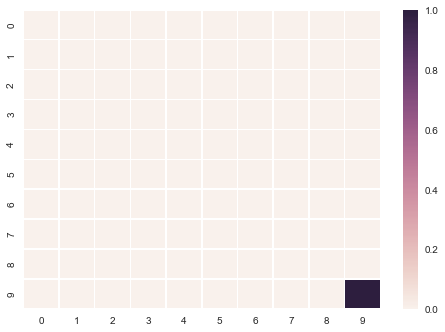

In [7]:
heat_map(map_to_matrix(reward_function_1, 10, 10))

# Question 2 - Implementing Value Iteration

In [8]:
#Creating the Environment

#4 types of actions possible (up, left, right, down)
left = 0
up = 1
right = 2
down = 3

transition_prob_matrix = np.zeros([100,100,4]) 

actions = [left, up, right, down]

#Number of states: 100 (is a 10x10 grid, each cell representing a state numbered column wise)
grid = np.empty([10, 10])
state = 0
for column in range(0,10):
    for row in range(0,10):
        grid[row][column] = state
        state += 1


#Reward Function 1 to be used

#Transition Probabilties
shape = (100, 100, 4)
#transition_prob = np.zeros(shape)

def build_transition_probability_matrix_helper(w, transition_prob, i, j, start, neighbor_left, neighbor_up, neighbor_right, neighbor_down):

    for end in (neighbor_left, neighbor_up, neighbor_right, neighbor_down):
        for action in actions:
            tup = (start, end, action)

            transition_prob[tup] = transition_prob.get(tup, 0) + w/4

            if (action == down) and (end == neighbor_down):
                transition_prob[tup] += 1-w

            elif (action == up) and (end == neighbor_up):
                transition_prob[tup] += 1-w

            elif (action == left) and (end == neighbor_left):
                transition_prob[tup] += 1-w

            elif (action == right) and (end == neighbor_right):
                transition_prob[tup] += 1-w
                
    return transition_prob



def build_transition_probability_matrix(w):
    transition_prob = {}

    #Inner states
    for i in range(1,9):
        for j in range(1,9):
            start = j*10 + i

            neighbor_left = start-10
            neighbor_up = start-1
            neighbor_right = start+10
            neighbor_down = start+1

            transition_prob = build_transition_probability_matrix_helper(w, transition_prob, i, j, start, neighbor_left, neighbor_up, neighbor_right, neighbor_down)
        
        
    #Top Edge
    for i in [0]:
        for j in range(1,9):
            start = j*10 + i

            neighbor_left = start-10
            neighbor_up = start
            neighbor_right = start+10
            neighbor_down = start+1

            transition_prob = build_transition_probability_matrix_helper(w, transition_prob, i, j, start, neighbor_left, neighbor_up, neighbor_right, neighbor_down)

            
    #Right Edge
    for i in range(1,9):
        for j in [9]:
            start = j*10 + i

            neighbor_left = start-10
            neighbor_up = start-1
            neighbor_right = start
            neighbor_down = start+1

            transition_prob = build_transition_probability_matrix_helper(w, transition_prob, i, j, start, neighbor_left, neighbor_up, neighbor_right, neighbor_down)

            
    #Bottom edge
    for i in [9]:
        for j in range(1,9):
            start = j*10 + i

            neighbor_left = start-10
            neighbor_up = start-1
            neighbor_right = start+10
            neighbor_down = start

            transition_prob = build_transition_probability_matrix_helper(w, transition_prob, i, j, start, neighbor_left, neighbor_up, neighbor_right, neighbor_down)
    
    
    #Left edge
    for i in range(1,9):
        for j in [0]:
            start = j*10 + i

            neighbor_left = start
            neighbor_up = start-1
            neighbor_right = start+10
            neighbor_down = start+1

            transition_prob = build_transition_probability_matrix_helper(w, transition_prob, i, j, start, neighbor_left, neighbor_up, neighbor_right, neighbor_down)

            
    #Corner states
    i = 0
    j = 0
    start = j*10 + i

    neighbor_left = start
    neighbor_up = start
    neighbor_right = start+10
    neighbor_down = start+1
    transition_prob = build_transition_probability_matrix_helper(w, transition_prob, i, j, start, neighbor_left, neighbor_up, neighbor_right, neighbor_down)
    transition_prob[(start,start,up)] -= 1-w
    transition_prob[(start,start,left)] -= 1-w
    
    
    i = 0
    j = 9
    start = j*10 + i

    neighbor_left = start-10
    neighbor_up = start
    neighbor_right = start
    neighbor_down = start+1
    transition_prob = build_transition_probability_matrix_helper(w, transition_prob, i, j, start, neighbor_left, neighbor_up, neighbor_right, neighbor_down)
    transition_prob[(start,start,up)] -= 1-w
    transition_prob[(start,start,right)] -= 1-w
    
    
    i = 9
    j = 9
    start = j*10 + i

    neighbor_left = start-10
    neighbor_up = start-1
    neighbor_right = start
    neighbor_down = start
    transition_prob = build_transition_probability_matrix_helper(w, transition_prob, i, j, start, neighbor_left, neighbor_up, neighbor_right, neighbor_down)
    transition_prob[(start,start,down)] -= 1-w
    transition_prob[(start,start,right)] -= 1-w
    
    
    i = 9
    j = 0
    start = j*10 + i

    neighbor_left = start
    neighbor_up = start-1
    neighbor_right = start+10
    neighbor_down = start
    transition_prob = build_transition_probability_matrix_helper(w, transition_prob, i, j, start, neighbor_left, neighbor_up, neighbor_right, neighbor_down)
    transition_prob[(start,start,left)] -= 1-w
    transition_prob[(start,start,down)] -= 1-w
    
    return transition_prob        


In [9]:
transition_prob = build_transition_probability_matrix(0.1)
#transition_prob

In [10]:
# start = 9
# neighbor_left = start-10
# neighbor_up = start-1
# neighbor_right = start+10
# neighbor_down = start+1

# for end in (start, neighbor_left, neighbor_up, neighbor_right, neighbor_down):
    
#     for action in [right]:
        
#         print(start,end,action)
#         print(transition_prob.get((start,end,action),0))


In [11]:
# #Implementation of Value Iteration Algorithm
# def Value_Iteration(transition_prob, discount, actions,epsilon, reward):
    
#     V = np.zeros((10,10))
#     delta = float('inf')
#     while delta > epsilon:
        
#         delta = 0
#         for state in range(100):
            
#             v = V[state%10, state/10]
#             temp = []
            
#             for action in actions:
                
#                 neighbor_left = state-10
#                 neighbor_up = state-1
#                 neighbor_right = state+10
#                 neighbor_down = state+1
                
#                 sum_values = 0
                
#                 neighbors = [state, neighbor_left, neighbor_up, neighbor_right, neighbor_down]               
#                 for neighbor in neighbors:
#                     if (neighbor < 0) or (neighbor > 99):
#                         continue
#                     sum_values += (transition_prob.get((state, neighbor, action),0) * (reward[neighbor/10, neighbor%10] + discount * V[neighbor%10 , neighbor/10]))
                    
#                 temp.append(sum_values)
                
#             V[state%10, state/10] = max(temp)
            
#             delta = max(delta, abs(v - V[state%10, state/10]))
    
#     return V

In [12]:
def Value_Iteration2(transition_prob, discount, actions,epsilon, reward):
    
    V = {}

    for i in range(10):
        for j in range(10):
            V[(j*10 + i)] = 0

    delta = float('inf')
    while delta > epsilon:
        
        delta = 0
        for state in range(100):
            
            v = V[state]
            temp = []
            
            for action in actions:
                
                neighbor_left = state-10
                neighbor_up = state-1
                neighbor_right = state+10
                neighbor_down = state+1
                
                sum_values = 0
                
                neighbors = [state, neighbor_left, neighbor_up, neighbor_right, neighbor_down]               
                for neighbor in neighbors:
                    if (neighbor < 0) or (neighbor > 99):
                        continue
                        
                    sum_values += (transition_prob.get((state, neighbor, action),0) * (reward[neighbor] + discount * V[neighbor]))
                    
                temp.append(sum_values)
                
            V[state] = max(temp)
            
            delta = max(delta, abs(v - V[state]))
    
    return V

In [13]:
expertV1 = Value_Iteration2(transition_prob, 0.8, actions, 0.01, reward_function_1)

In [14]:
optimal_values = np.empty([10, 10])
state = 0
for column in range(0,10):
    for row in range(0,10):
        optimal_values[row][column] = round(expertV1.get(row + column*10),2)
        

print(optimal_values)

[[0.04 0.06 0.09 0.12 0.17 0.22 0.29 0.38 0.49 0.61]
 [0.06 0.09 0.12 0.16 0.22 0.29 0.38 0.49 0.63 0.79]
 [0.09 0.12 0.16 0.22 0.29 0.38 0.49 0.64 0.82 1.02]
 [0.12 0.16 0.22 0.29 0.38 0.49 0.64 0.82 1.05 1.32]
 [0.17 0.22 0.29 0.38 0.49 0.64 0.82 1.05 1.35 1.7 ]
 [0.22 0.29 0.38 0.49 0.64 0.82 1.05 1.35 1.73 2.18]
 [0.29 0.38 0.49 0.64 0.82 1.05 1.35 1.73 2.22 2.81]
 [0.38 0.49 0.64 0.82 1.05 1.35 1.73 2.22 2.84 3.61]
 [0.49 0.63 0.82 1.05 1.35 1.73 2.22 2.84 3.63 4.63]
 [0.61 0.79 1.02 1.32 1.7  2.18 2.81 3.61 4.63 4.7 ]]


# Question 3 - Heatmap of the optimal values of states

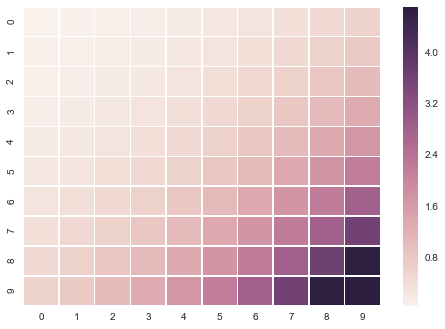

In [15]:
#heat_map(map_to_matrix(expertV1, 10, 10))
heat_map(map_to_matrix(expertV1, 10, 10))

# Question 5 - Computation step of Value Iteration

In [16]:
# def Value_Iteration_with_computation(transition_prob, discount, actions,epsilon, reward):
    
#     V = np.zeros((10,10))
#     Pi = np.zeros((10,10))
    
#     delta = float('inf')
#     while delta > epsilon:
#         delta = 0
        
#         for state in range(100):
            
#             v = V[state/10, state%10]
#             temp = []
            
#             for action in actions:
                
#                 neighbor_left = state-10
#                 neighbor_up = state-1
#                 neighbor_right = state+10
#                 neighbor_down = state+1
                
#                 sum_values = 0
                
#                 neighbors = [state, neighbor_left, neighbor_up, neighbor_right, neighbor_down]               
#                 for neighbor in neighbors:
#                     if (neighbor < 0) or (neighbor > 99):
#                         continue
#                     sum_values += (transition_prob.get((state, neighbor, action),0) * (reward[neighbor/10, neighbor%10] + discount * V[neighbor/10 , neighbor%10])  )
                    
#                 temp.append(sum_values)
                
#             V[state/10, state%10] = max(temp)
            
#             delta = max(delta, abs(v - V[state/10, state%10]))
    
    
#     for state in range(100):
        
#         temp = []
#         for action in actions:

#             neighbor_left = state-10
#             neighbor_up = state-1
#             neighbor_right = state+10
#             neighbor_down = state+1

#             sum_values = 0

#             neighbors = [state, neighbor_left, neighbor_up, neighbor_right, neighbor_down]               
#             for neighbor in neighbors:
#                 if (neighbor < 0) or (neighbor > 99):
#                     continue
#                 sum_values += (transition_prob.get((state, neighbor, action),0) * (reward[neighbor/10, neighbor%10] + discount * V[neighbor/10 , neighbor%10])  )

#             temp.append(sum_values)

#         Pi[state/10, state%10] = np.argmax(temp)

    
#     return Pi

In [17]:
def Value_Iteration_with_computation2(transition_prob, discount, actions,epsilon, reward):
    
    V = {}
    Pi = {}

    for i in range(10):
        for j in range(10):
            V[(j*10 + i)] = 0
            Pi[(j*10 + i)] = 0

    delta = float('inf')
    while delta > epsilon:
        delta = 0
        
        for state in range(100):
            
            v = V[state]
            temp = []
            
            for action in actions:
                
                neighbor_left = state-10
                neighbor_up = state-1
                neighbor_right = state+10
                neighbor_down = state+1
                
                sum_values = 0
                
                neighbors = [state, neighbor_left, neighbor_up, neighbor_right, neighbor_down]               
                for neighbor in neighbors:
                    if (neighbor < 0) or (neighbor > 99):
                        continue
                    sum_values += (transition_prob.get((state, neighbor, action),0) * (reward[neighbor] + discount * V[neighbor])  )
                    
                temp.append(sum_values)
                
            V[state] = max(temp)
            
            delta = max(delta, abs(v - V[state]))
    
    
    for state in range(100):
        
        temp = []
        for action in actions:

            neighbor_left = state-10
            neighbor_up = state-1
            neighbor_right = state+10
            neighbor_down = state+1

            sum_values = 0

            neighbors = [state, neighbor_left, neighbor_up, neighbor_right, neighbor_down]               
            for neighbor in neighbors:
                if (neighbor < 0) or (neighbor > 99):
                    continue
                sum_values += (transition_prob.get((state, neighbor, action),0) * (reward[neighbor] + discount * V[neighbor])  )

            temp.append(sum_values)

        Pi[state] = np.argmax(temp)

    
    return V, Pi

In [134]:
t = [1,5,4,3,-6]
np.argmax(t)

1

In [151]:
expertV1, expertPi1 = Value_Iteration_with_computation2(transition_prob, 0.8, actions, 0.01, reward_function_1)

In [152]:
expertPim1 = map_to_matrix(expertPi1, 10, 10)
expertPim1

array([[3., 2., 2., 2., 2., 2., 2., 3., 3., 3.],
       [3., 3., 2., 2., 2., 2., 3., 3., 3., 3.],
       [3., 3., 2., 2., 2., 3., 3., 3., 3., 3.],
       [3., 3., 3., 2., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 2., 2., 3., 3., 3., 3., 3.],
       [3., 3., 2., 2., 2., 3., 3., 3., 3., 3.],
       [3., 2., 2., 2., 2., 2., 2., 3., 3., 3.],
       [2., 2., 2., 2., 2., 2., 2., 2., 3., 3.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 3.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]])

In [20]:
def matrix_to_arrows(matrix):
    arrows = matrix.tolist()
    
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i, j] == 0:
                arrows[i][j] = "<"
                
            if matrix[i, j] == 1:
                #arrows[i][j] = "^"
                arrows[i][j] = "^"
                
            if matrix[i, j] == 2:
                arrows[i][j] = ">"
                
            if matrix[i, j] == 3:
                arrows[i][j] = "v"
                
    return arrows

In [21]:
#matrix_to_arrows(Pi)
#incorrect don't know why

In [22]:
matrix_to_arrows(expertPim1)

[['v', '>', '>', '>', '>', '>', '>', 'v', 'v', 'v'],
 ['v', 'v', '>', '>', '>', '>', 'v', 'v', 'v', 'v'],
 ['v', 'v', '>', '>', '>', 'v', 'v', 'v', 'v', 'v'],
 ['v', 'v', 'v', '>', 'v', 'v', 'v', 'v', 'v', 'v'],
 ['v', 'v', 'v', '>', '>', 'v', 'v', 'v', 'v', 'v'],
 ['v', 'v', '>', '>', '>', 'v', 'v', 'v', 'v', 'v'],
 ['v', '>', '>', '>', '>', '>', '>', 'v', 'v', 'v'],
 ['>', '>', '>', '>', '>', '>', '>', '>', 'v', 'v'],
 ['>', '>', '>', '>', '>', '>', '>', '>', '>', 'v'],
 ['>', '>', '>', '>', '>', '>', '>', '>', '>', '>']]

In [23]:
# optimal_actions_using_V = {}

# for i in range(1,9):
#     for j in range(1, 9):
#         key = j*10 + i

#         temp = []
    
#         left = key - 10
#         if (left < 0) or (left > 99):
#             temp.append(float('-inf'))
#         else:
#             temp.append(V[left])

#         up = key - 1
#         if (up < 0) or (up > 99):
#             temp.append(float('-inf'))
#         else:
#             temp.append(V[up])

#         right = key + 10
#         if (right < 0) or (right > 99):
#             temp.append(float('-inf'))
#         else:
#             temp.append(V[right])

#         down = key + 1
#         if (down < 0) or (down > 99):
#             temp.append(float('-inf'))
#         else:
#             temp.append(V[down])

#         print(key, temp)
#         optimal_actions_using_V[key] = np.argmax(temp)
    
# matrix_to_arrows(map_to_matrix(optimal_actions_using_V, 10, 10))


# Question 5

In [24]:
# optimal_actions_using_V = {}

# for i in range(1,9):
#     for j in range(1, 9):
#         key = j*10 + i

#         temp = []
    
#         left = key - 10
#         temp.append(V[left])

#         up = key - 1
#         temp.append(V[up])

#         right = key + 10
#         temp.append(V[right])

#         down = key + 1
#         temp.append(V[down])

#         print(key, temp)
#         optimal_actions_using_V[key] = np.argmax(temp)

# for i in [0]:
#     for j in range(1,9):
#         key = j*10 + i

#         temp = []

#         left = key - 10
#         temp.append(V[left])

#         up = key - 1
#         temp.append(float('-inf'))

#         right = key + 10
#         temp.append(V[right])

#         down = key + 1
#         temp.append(V[down])

#         print(key, temp)
#         optimal_actions_using_V[key] = np.argmax(temp)


# #Right Edge
# for i in range(1,9):
#     for j in [9]:
#         key = j*10 + i

#         temp = []
        
#         left = key - 10
#         temp.append(V[left])

#         up = key - 1
#         temp.append(V[up])

#         right = key + 10
#         temp.append(float('-inf'))

#         down = key + 1
#         temp.append(V[down])

#         print(key, temp)
#         optimal_actions_using_V[key] = np.argmax(temp)


# #Bottom edge
# for i in [9]:
#     for j in range(1,9):
#         key = j*10 + i

#         temp = []
        
#         left = key - 10
#         temp.append(V[left])

#         up = key - 1
#         temp.append(V[up])

#         right = key + 10
#         temp.append(V[right])

#         down = key + 1
#         temp.append(float('-inf'))

#         print(key, temp)
#         optimal_actions_using_V[key] = np.argmax(temp)


# #Left edge
# for i in range(1,9):
#     for j in [0]:
#         key = j*10 + i

#         temp = []
        
#         left = key - 10
#         temp.append(float('-inf'))

#         up = key - 1
#         temp.append(V[up])

#         right = key + 10
#         temp.append(V[right])

#         down = key + 1
#         temp.append(V[down])

#         print(key, temp)
#         optimal_actions_using_V[key] = np.argmax(temp)


# #Corner states
# i = 0
# j = 0
# key = j*10 + i

# temp = []

# left = key - 10
# temp.append(float('-inf'))

# up = key - 1
# temp.append(float('-inf'))

# right = key + 10
# temp.append(V[right])

# down = key + 1
# temp.append(V[down])

# print(key, temp)
# optimal_actions_using_V[key] = np.argmax(temp)


# i = 0
# j = 9
# key = j*10 + i

# temp = []

# left = key - 10
# temp.append(V[left])

# up = key - 1
# temp.append(float('-inf'))

# right = key + 10
# temp.append(float('-inf'))

# down = key + 1
# temp.append(V[down])

# print(key, temp)
# optimal_actions_using_V[key] = np.argmax(temp)


# i = 9
# j = 9
# key = j*10 + i

# temp = []

# left = key - 10
# temp.append(V[left])

# up = key - 1
# temp.append(V[up])

# right = key + 10
# temp.append(float('-inf'))

# down = key + 1
# temp.append(float('-inf'))

# print(key, temp)
# optimal_actions_using_V[key] = np.argmax(temp)


# i = 9
# j = 0
# key = j*10 + i

# temp = []

# left = key - 10
# temp.append(float('-inf'))

# up = key - 1
# temp.append(V[up])

# right = key + 10
# temp.append(V[right])

# down = key + 1
# temp.append(float('-inf'))

# print(key, temp)
# optimal_actions_using_V[key] = np.argmax(temp)

# # for i in range(10):
# #     for j in range(10):
# #         key = j*10 + i

# #         print(key, temp)
# #         optimal_actions_using_V[key] = np.argmax(temp)

# matrix_to_arrows(map_to_matrix(optimal_actions_using_V, 10, 10))


# Question 6

In [25]:
expertV2 = Value_Iteration2(transition_prob, 0.8, actions, 0.01, reward_function_2)

optimal_values = np.empty([10, 10])
state = 0
for column in range(0,10):
    for row in range(0,10):
        optimal_values[row][column] = expertV2.get(row + column*10)
        

print(optimal_values)

[[ 6.48477467e-01  7.94106515e-01  8.25237900e-01  5.36245558e-01
  -2.37043156e+00 -4.23381678e+00 -1.92052971e+00  1.13110795e+00
   1.59435584e+00  2.03820726e+00]
 [ 8.29851948e-01  1.02123596e+00  1.06603296e+00 -1.86790436e+00
  -6.73821942e+00 -8.67375446e+00 -6.36979468e+00 -1.29479626e+00
   1.92834321e+00  2.61046947e+00]
 [ 1.06360962e+00  1.31651254e+00  1.45007729e+00 -1.62402502e+00
  -6.74150886e+00 -1.39111818e+01 -9.64922518e+00 -5.51104325e+00
  -1.31012708e-01  3.35905866e+00]
 [ 1.36025245e+00  1.69269877e+00  1.94802285e+00 -1.23216899e+00
  -6.32308479e+00 -7.97760603e+00 -7.93667980e+00 -9.42386879e+00
  -1.91442835e+00  4.39062525e+00]
 [ 1.73657224e+00  2.17160228e+00  2.58983267e+00 -7.25587435e-01
  -5.83072992e+00 -3.25362550e+00 -3.23020014e+00 -7.41906241e+00
   1.71898209e+00  9.16310147e+00]
 [ 2.21393346e+00  2.78108417e+00  3.41709976e+00 -2.75630965e-02
  -5.09866208e+00 -5.49015498e-01 -4.76652804e-01 -2.96756313e+00
   6.58652246e+00  1.53573288e+01

# Question 7

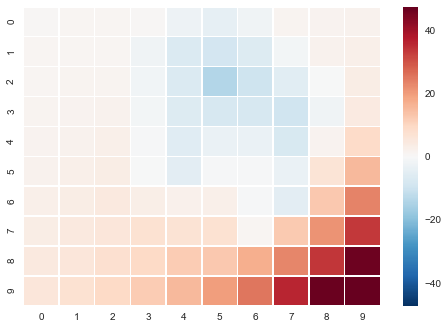

In [26]:
heat_map(map_to_matrix(expertV2, 10, 10))

# Question 9 - Computation step

In [148]:
def compute_optimal_action(transition_prob_dict, reward_function_dict):
    
    V, Pi = Value_Iteration_with_computation2(transition_prob_dict, 0.8, actions, 0.01, reward_function_dict)

    return Pi

    Pim = map_to_matrix(Pi, 10, 10)
    matrix_to_arrows(Pim)

    optimal_actions_using_V = {}

    for i in range(1,9):
        for j in range(1, 9):
            key = j*10 + i

            temp = []

            left = key - 10
            temp.append(V[left])

            up = key - 1
            temp.append(V[up])

            right = key + 10
            temp.append(V[right])

            down = key + 1
            temp.append(V[down])

            #print(key, temp)
            optimal_actions_using_V[key] = np.argmax(temp)

    for i in [0]:
        for j in range(1,9):
            key = j*10 + i

            temp = []

            left = key - 10
            temp.append(V[left])

            up = key - 1
            temp.append(float('-inf'))

            right = key + 10
            temp.append(V[right])

            down = key + 1
            temp.append(V[down])

            #print(key, temp)
            optimal_actions_using_V[key] = np.argmax(temp)


    #Right Edge
    for i in range(1,9):
        for j in [9]:
            key = j*10 + i

            temp = []

            left = key - 10
            temp.append(V[left])

            up = key - 1
            temp.append(V[up])

            right = key + 10
            temp.append(float('-inf'))

            down = key + 1
            temp.append(V[down])

            #print(key, temp)
            optimal_actions_using_V[key] = np.argmax(temp)


    #Bottom edge
    for i in [9]:
        for j in range(1,9):
            key = j*10 + i

            temp = []

            left = key - 10
            temp.append(V[left])

            up = key - 1
            temp.append(V[up])

            right = key + 10
            temp.append(V[right])

            down = key + 1
            temp.append(float('-inf'))

            #print(key, temp)
            optimal_actions_using_V[key] = np.argmax(temp)


    #Left edge
    for i in range(1,9):
        for j in [0]:
            key = j*10 + i

            temp = []

            left = key - 10
            temp.append(float('-inf'))

            up = key - 1
            temp.append(V[up])

            right = key + 10
            temp.append(V[right])

            down = key + 1
            temp.append(V[down])

            #print(key, temp)
            optimal_actions_using_V[key] = np.argmax(temp)


    #Corner states
    i = 0
    j = 0
    key = j*10 + i

    temp = []

    left = key - 10
    temp.append(float('-inf'))

    up = key - 1
    temp.append(float('-inf'))

    right = key + 10
    temp.append(V[right])

    down = key + 1
    temp.append(V[down])

    #print(key, temp)
    optimal_actions_using_V[key] = np.argmax(temp)


    i = 0
    j = 9
    key = j*10 + i

    temp = []

    left = key - 10
    temp.append(V[left])

    up = key - 1
    temp.append(float('-inf'))

    right = key + 10
    temp.append(float('-inf'))

    down = key + 1
    temp.append(V[down])

    #print(key, temp)
    optimal_actions_using_V[key] = np.argmax(temp)


    i = 9
    j = 9
    key = j*10 + i

    temp = []

    left = key - 10
    temp.append(V[left])

    up = key - 1
    temp.append(V[up])

    right = key + 10
    temp.append(float('-inf'))

    down = key + 1
    temp.append(float('-inf'))

    #print(key, temp)
    optimal_actions_using_V[key] = np.argmax(temp)


    i = 9
    j = 0
    key = j*10 + i

    temp = []

    left = key - 10
    temp.append(float('-inf'))

    up = key - 1
    temp.append(V[up])

    right = key + 10
    temp.append(V[right])

    down = key + 1
    temp.append(float('-inf'))

    #print(key, temp)
    optimal_actions_using_V[key] = np.argmax(temp)

    # for i in range(10):
    #     for j in range(10):
    #         key = j*10 + i

    #         print(key, temp)
    #         optimal_actions_using_V[key] = np.argmax(temp)

    #print matrix_to_arrows(map_to_matrix(optimal_actions_using_V, 10, 10))

    return Pim

In [158]:
#expert_optimal_actions_1 = compute_optimal_action(transition_prob, reward_function_1)
expert_optimal_actions_1 = expertPi1

In [164]:
expertV2, expertPi2 = Value_Iteration_with_computation2(transition_prob, 0.8, actions, 0.01, reward_function_2)
expertPim2 = map_to_matrix(expertPi2, 10, 10)
#expertPim2

#expert_optimal_actions_2 = compute_optimal_action(transition_prob, reward_function_2)
expert_optimal_actions_2 = expertPi2
matrix_to_arrows(expertPim2)
#print matrix_to_arrows(map_to_matrix(optimal_actions_using_V, 10, 10))

[['v', 'v', 'v', '<', '<', '>', '>', '>', '>', 'v'],
 ['v', 'v', 'v', '<', '<', '^', '>', '>', '>', 'v'],
 ['v', 'v', 'v', '<', '<', 'v', '>', '>', '>', 'v'],
 ['v', 'v', 'v', '<', '<', 'v', 'v', '^', '>', 'v'],
 ['v', 'v', 'v', '<', '<', 'v', 'v', 'v', '>', 'v'],
 ['v', 'v', 'v', '<', '<', 'v', 'v', '<', '>', 'v'],
 ['v', 'v', 'v', 'v', 'v', 'v', '<', '<', '>', 'v'],
 ['v', 'v', 'v', 'v', 'v', 'v', '<', 'v', 'v', 'v'],
 ['>', '>', '>', 'v', 'v', 'v', 'v', 'v', 'v', 'v'],
 ['>', '>', '>', '>', '>', '>', '>', '>', '>', '>']]

# Question 11

In [30]:
def fill_identity_matrix(D, dimension, row, col, factor):
    D[row:row+dimension, col:col+dimension] = factor * np.identity(dimension)
    
    return D

In [31]:
def reward_function_matrix(reward_function_dict):
    A = np.zeros([100,1])
    for i in range(100):
        A[i] = reward_function_dict[i]
        
    return A

In [32]:
def find_Rmax(reward_function):
    return np.abs(np.max(reward_function))

In [61]:
find_Rmax(reward_function_matrix(reward_function_2))

10.0

In [33]:
def normalize(vals):
    min_val = np.min(vals)
    max_val = np.max(vals)
    return (vals - min_val) / (max_val - min_val)

In [144]:
inv = np.linalg.inv(np.identity(100) - 0.8 * transition_prob_matrix[:, :, 1])
res = - (np.dot(transition_prob_matrix[state, :, 3] - transition_prob_matrix[state, :, 1], inv))

In [145]:
res

array([ 9.33385582e-01, -9.14017142e-01, -1.89663629e-02, -3.93726838e-04,
       -8.17680090e-06, -1.69881260e-07, -3.53083480e-09, -7.34135059e-11,
       -1.52710808e-12, -3.19278179e-14,  1.92612179e-02, -1.84700916e-02,
       -7.66747833e-04, -2.37105335e-05, -6.50799217e-07, -1.67399350e-08,
       -4.13345987e-10, -9.92398985e-12, -2.33460845e-13, -5.42717660e-15,
        4.03640179e-04, -3.78986042e-04, -2.36474014e-05, -9.72434993e-07,
       -3.32488038e-08, -1.02247125e-09, -2.93419514e-11, -8.01947969e-13,
       -2.11388058e-14, -5.42990196e-16,  8.58795158e-06, -7.89681718e-06,
       -6.56100060e-07, -3.36089634e-08, -1.37454482e-09, -4.91712987e-11,
       -1.60826238e-12, -4.93214013e-14, -1.44083613e-15, -4.05372276e-17,
        1.85426654e-07, -1.67066633e-07, -1.72528053e-08, -1.05495908e-09,
       -5.01356971e-11, -2.04316118e-12, -7.49770948e-14, -2.54877650e-15,
       -8.17220365e-17, -2.49782504e-18,  4.06036574e-09, -3.58735137e-09,
       -4.40085504e-10, -

In [167]:
from cvxopt import matrix, solvers
#solvers.options['show_progress'] = False

def compute_solver(lamda, reward_function_dict, expert_optimal_actions):
    
    num_states = 100
    num_actions = len(actions)
    discount = 0.8
#   lamda = 2

    #Dimension of D is 1000 x 300
    D = np.zeros([num_states * (num_actions - 1) * 2 + num_states * 4, num_states * 3])

    #Dimension of X is 300 x 1
    X = np.zeros([num_states * 3])

    #Dimension of C is 300 x 1
    C = np.zeros([num_states * 3])

    #Dimension of B is 1000x1
    B = np.zeros([1000, 1])

    
    #Filling the D matrix

    for state in range(num_states):

        optimal_action = expert_optimal_actions[state]

        first_inv = np.linalg.inv(np.eye(num_states) - discount * transition_prob_matrix[:, :, optimal_action])

        count = 0

        print state, optimal_action
        
        for action in range(num_actions):

            if action != optimal_action:

                D[state * (num_actions - 1) + count, 0:num_states] = - (np.dot(transition_prob_matrix[state, :, optimal_action] - transition_prob_matrix[state, :, action], first_inv))

                D[state * (num_actions - 1) + count, num_states + state] = 1

                D[num_states * (num_actions - 1) + state * (num_actions - 1) + count, 0:num_states] = - (np.dot(transition_prob_matrix[state, :, optimal_action] - transition_prob_matrix[state, :, action], first_inv))
                
#               A[N_STATES * (N_ACTIONS - 1) + i * (N_ACTIONS - 1) + cnt, N_STATES + i] = 1

                count += 1

    #D = fill_identity_matrix(D, 100, 0, 100, 1)
    D = fill_identity_matrix(D, 100, 600, 0, -1)
    D = fill_identity_matrix(D, 100, 700, 0, 1)
    D = fill_identity_matrix(D, 100, 800, 0, 1)
    D = fill_identity_matrix(D, 100, 900, 0, -1)
    D = fill_identity_matrix(D, 100, 600, 200, -1)
    D = fill_identity_matrix(D, 100, 700, 200, -1)

    Rmax = find_Rmax(reward_function_matrix(reward_function_dict))
    
#     D[800:1000,300] = -1 * Rmax

    #FIlling the B matrix
    B[800:1000] = Rmax

    #Filling the C matrix

    C[100:200] = -1
    C[200:300] = lamda
    
#     print(D.shape)
#     print(B.shape)
#     print(sum(abs(D)))
#     print(sum(abs(C)))
#     denom = (sum(abs(D)))
    
#     D = D/denom
#     B = B/denom
    
#     print(D.shape)
#     print(B.shape)
#     print(C.shape)
#     denom = (sum(abs(C)))
#     C = C/denom
    
   # print(C.shape)

#     - Each row of A[i] and b[i] are renormalized by sum(abs(A[i]))
# - Each row of G[i] and h[i] are renormalized by sum(abs(G[i]))
# - P and q are renormalized with the spectral norm of P. 

    sol = solvers.lp(matrix(C), matrix(D), matrix(B))

    rewards = sol['x'][0:100]
   # rewards = normalize(rewards) * Rmax
    return rewards
    #return rewards, D, B, C


In [88]:
import pprint
n = 100

transition_prob_matrix = np.zeros([100,100,4]) 

for tup in transition_prob:
    #print(tup, transition_prob[tup])
    
    start = tup[0]
    end = tup[1]
    action = tup[2]
    
    #print(start,end,action)
    transition_prob_matrix[start,end,action] = transition_prob[tup]

In [90]:
def compute_solver_optimal_actions(reward_function_dict):
    
    V, Pi = Value_Iteration_with_computation2(transition_prob, 0.8, actions, 0.01, reward_function_dict)
    Pim = map_to_matrix(Pi, 10, 10)
    
    matrix_to_arrows(Pim)

    optimal_actions_using_V = {}

    for i in range(1,9):
        for j in range(1, 9):
            key = j*10 + i

            temp = []

            left = key - 10
            temp.append(V[left])

            up = key - 1
            temp.append(V[up])

            right = key + 10
            temp.append(V[right])

            down = key + 1
            temp.append(V[down])

          #  print(key, temp)
            optimal_actions_using_V[key] = np.argmax(temp)

    for i in [0]:
        for j in range(1,9):
            key = j*10 + i

            temp = []

            left = key - 10
            temp.append(V[left])

            up = key - 1
            temp.append(float('-inf'))

            right = key + 10
            temp.append(V[right])

            down = key + 1
            temp.append(V[down])

           # print(key, temp)
            optimal_actions_using_V[key] = np.argmax(temp)


    #Right Edge
    for i in range(1,9):
        for j in [9]:
            key = j*10 + i

            temp = []

            left = key - 10
            temp.append(V[left])

            up = key - 1
            temp.append(V[up])

            right = key + 10
            temp.append(float('-inf'))

            down = key + 1
            temp.append(V[down])

            #print(key, temp)
            optimal_actions_using_V[key] = np.argmax(temp)


    #Bottom edge
    for i in [9]:
        for j in range(1,9):
            key = j*10 + i

            temp = []

            left = key - 10
            temp.append(V[left])

            up = key - 1
            temp.append(V[up])

            right = key + 10
            temp.append(V[right])

            down = key + 1
            temp.append(float('-inf'))
# 
            #print(key, temp)
            optimal_actions_using_V[key] = np.argmax(temp)


    #Left edge
    for i in range(1,9):
        for j in [0]:
            key = j*10 + i

            temp = []

            left = key - 10
            temp.append(float('-inf'))

            up = key - 1
            temp.append(V[up])

            right = key + 10
            temp.append(V[right])

            down = key + 1
            temp.append(V[down])

           # print(key, temp)
            optimal_actions_using_V[key] = np.argmax(temp)


    #Corner states
    i = 0
    j = 0
    key = j*10 + i

    temp = []

    left = key - 10
    temp.append(float('-inf'))

    up = key - 1
    temp.append(float('-inf'))

    right = key + 10
    temp.append(V[right])

    down = key + 1
    temp.append(V[down])

    #print(key, temp)
    optimal_actions_using_V[key] = np.argmax(temp)


    i = 0
    j = 9
    key = j*10 + i

    temp = []

    left = key - 10
    temp.append(V[left])

    up = key - 1
    temp.append(float('-inf'))

    right = key + 10
    temp.append(float('-inf'))

    down = key + 1
    temp.append(V[down])

    #print(key, temp)
    optimal_actions_using_V[key] = np.argmax(temp)


    i = 9
    j = 9
    key = j*10 + i

    temp = []

    left = key - 10
    temp.append(V[left])

    up = key - 1
    temp.append(V[up])

    right = key + 10
    temp.append(float('-inf'))

    down = key + 1
    temp.append(float('-inf'))

    #print(key, temp)
    optimal_actions_using_V[key] = np.argmax(temp)


    i = 9
    j = 0
    key = j*10 + i

    temp = []

    left = key - 10
    temp.append(float('-inf'))

    up = key - 1
    temp.append(V[up])

    right = key + 10
    temp.append(V[right])

    down = key + 1
    temp.append(float('-inf'))

    #print(key, temp)
    optimal_actions_using_V[key] = np.argmax(temp)


    matrix_to_arrows(map_to_matrix(optimal_actions_using_V, 10, 10))
    
    return optimal_actions_using_V



In [48]:
def compute_accuracy(reward_function_dict, expert_optimal_actions):
    
    max_accuracy = 0
    max_accuracy_lamda = 0
    
    accuracies = []

    lamdas = np.linspace(start=0, stop=5, num=500)
    
    for l in lamdas:
        solver_reward_function = np.array(compute_solver(l, reward_function_dict, expert_optimal_actions))

        solver_reward_function_dict = dict()

        for i in range(100):
            solver_reward_function_dict[i] = solver_reward_function[i][0]

        solver_optimal_actions = compute_solver_optimal_actions(solver_reward_function_dict)

        count = 0

        for i in range(100):
            if solver_optimal_actions[i] == expert_optimal_actions[i]:
                count += 1

        #print(l, count)
        accuracies.append(count)
        #lamdas.append(l)
        
        if max_accuracy < count:
            max_accuracy = count
            max_accuracy_lamda = l
            
    #return max_accuracy, max_accuracy_lamda
    return accuracies, lamdas, max_accuracy, max_accuracy_lamda

0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.1192e+01 -9.9765e+01  4e+02  7e-01  5e+00  1e+00
 2: -2.0458e+01 -7.6979e+01  3e+02  5e-01  3e+00  7e-01
 3: -3.0348e+01 -5.9507e+01  1e+02  2e-01  2e+00  4e-01
 4: -3.6005e+01 -4.9316e+01  6e+01  1e-01  7e-01  1e-01
 5: -3.8450e+01 -4.6405e+01  4e+01  6e-02  4e-01  9e-02
 6: -3.9996e+01 -4.3909e+01  2e+01  3e-02  2e-01  4e-02
 7: -4.1244e+01 -4.2497e+01  5e+00  1e-02  7e-02  6e-03
 8: -4.1

24: -3.9040e+01 -3.9040e+01  4e-06  7e-09  5e-08  4e-09
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  2e+01  1e+00
 1: -8.9738e+00 -9.3751e+01  4e+02  7e-01  5e+00  1e+00
 2: -1.7217e+01 -7.1684e+01  2e+02  4e-01  3e+00  7e-01
 3: -2.6179e+01 -5.4967e+01  1e+02  2e-01  2e+00  4e-01
 4: -3.1217e+01 -4.5519e+01  6e+01  1e-01  8e-01  2e-01
 5: -3.4333e+01 -4.1877e+01  3e+01  6e-02  4e-01  8e-02
 6: -3.5821e+01 -3.9417e+01  1e+01  3e-0

11: -3.4847e+01 -3.5134e+01  1e+00  2e-03  2e-02  1e-03
12: -3.4932e+01 -3.5114e+01  7e-01  1e-03  1e-02  7e-04
13: -3.4983e+01 -3.5101e+01  4e-01  9e-04  6e-03  5e-04
14: -3.4992e+01 -3.5105e+01  4e-01  9e-04  6e-03  4e-04
15: -3.5018e+01 -3.5093e+01  3e-01  6e-04  4e-03  3e-04
16: -3.5024e+01 -3.5086e+01  3e-01  5e-04  3e-03  3e-04
17: -3.5038e+01 -3.5076e+01  2e-01  3e-04  2e-03  2e-04
18: -3.5049e+01 -3.5073e+01  1e-01  2e-04  1e-03  1e-04
19: -3.5050e+01 -3.5070e+01  9e-02  2e-04  1e-03  9e-05
20: -3.5054e+01 -3.5065e+01  5e-02  9e-05  6e-04  5e-05
21: -3.5057e+01 -3.5060e+01  2e-02  3e-05  2e-04  1e-05
22: -3.5058e+01 -3.5059e+01  3e-03  5e-06  3e-05  2e-06
23: -3.5058e+01 -3.5058e+01  5e-04  1e-06  7e-06  5e-07
24: -3.5058e+01 -3.5058e+01  1e-04  2e-07  1e-06  1e-07
25: -3.5058e+01 -3.5058e+01  1e-06  3e-09  2e-08  1e-09
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
2

 5: -2.8103e+01 -3.4827e+01  3e+01  5e-02  4e-01  6e-02
 6: -2.9736e+01 -3.3280e+01  1e+01  3e-02  2e-01  3e-02
 7: -3.0657e+01 -3.2261e+01  6e+00  1e-02  9e-02  1e-02
 8: -3.1053e+01 -3.1903e+01  3e+00  7e-03  5e-02  6e-03
 9: -3.1341e+01 -3.1592e+01  9e-01  2e-03  1e-02  1e-03
10: -3.1364e+01 -3.1565e+01  8e-01  2e-03  1e-02  1e-03
11: -3.1415e+01 -3.1531e+01  4e-01  9e-04  6e-03  5e-04
12: -3.1401e+01 -3.1520e+01  5e-01  9e-04  6e-03  6e-04
13: -3.1414e+01 -3.1503e+01  4e-01  7e-04  5e-03  4e-04
14: -3.1442e+01 -3.1474e+01  1e-01  3e-04  2e-03  1e-04
15: -3.1442e+01 -3.1469e+01  1e-01  2e-04  1e-03  1e-04
16: -3.1447e+01 -3.1465e+01  8e-02  1e-04  1e-03  8e-05
17: -3.1454e+01 -3.1458e+01  2e-02  3e-05  2e-04  2e-05
18: -3.1455e+01 -3.1456e+01  2e-03  4e-06  3e-05  2e-06
19: -3.1455e+01 -3.1455e+01  4e-04  7e-07  5e-06  4e-07
20: -3.1455e+01 -3.1455e+01  2e-05  4e-08  3e-07  2e-08
21: -3.1455e+01 -3.1455e+01  2e-07  4e-10  3e-09  2e-10
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3


0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  2e+01  1e+00
 1: -4.2461e+00 -7.9452e+01  3e+02  6e-01  4e+00  1e+00
 2: -1.0260e+01 -5.8835e+01  2e+02  4e-01  3e+00  7e-01
 3: -1.7115e+01 -4.3318e+01  1e+02  2e-01  1e+00  3e-01
 4: -2.1205e+01 -3.4754e+01  5e+01  1e-01  7e-01  1e-01
 5: -2.4115e+01 -3.0607e+01  2e+01  5e-02  4e-01  6e-02
 6: -2.6033e+01 -2.8623e+01  1e+01  2e-02  1e-01  2e-02
 7: -2.6741e+01 -2.8052e+01  5e+00  1e-02  7e-02  9e-03
 8: -2.7

0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  2e+01  1e+00
 1: -3.1971e+00 -7.5816e+01  3e+02  6e-01  4e+00  1e+00
 2: -8.5837e+00 -5.5260e+01  2e+02  4e-01  3e+00  7e-01
 3: -1.4476e+01 -4.0042e+01  1e+02  2e-01  1e+00  3e-01
 4: -1.8811e+01 -3.0737e+01  5e+01  1e-01  6e-01  1e-01
 5: -2.1131e+01 -2.7050e+01  2e+01  5e-02  3e-01  5e-02
 6: -2.2838e+01 -2.5213e+01  9e+00  2e-02  1e-01  2e-02
 7: -2.3474e+01 -2.4753e+01  5e+00  1e-02  7e-02  8e-03
 8: -2.3

 2: -7.1110e+00 -5.1827e+01  2e+02  4e-01  2e+00  7e-01
 3: -1.2118e+01 -3.6542e+01  1e+02  2e-01  1e+00  3e-01
 4: -1.6636e+01 -2.6629e+01  4e+01  8e-02  5e-01  1e-01
 5: -1.8446e+01 -2.3423e+01  2e+01  4e-02  3e-01  4e-02
 6: -1.9792e+01 -2.2067e+01  8e+00  2e-02  1e-01  1e-02
 7: -2.0500e+01 -2.1460e+01  4e+00  8e-03  5e-02  5e-03
 8: -2.0760e+01 -2.1162e+01  1e+00  3e-03  2e-02  1e-03
 9: -2.0915e+01 -2.1082e+01  6e-01  1e-03  9e-03  6e-04
10: -2.0907e+01 -2.1076e+01  6e-01  1e-03  9e-03  6e-04
11: -2.0929e+01 -2.1047e+01  4e-01  9e-04  6e-03  4e-04
12: -2.0975e+01 -2.1002e+01  1e-01  2e-04  1e-03  1e-04
13: -2.0986e+01 -2.0993e+01  3e-02  6e-05  4e-04  3e-05
14: -2.0989e+01 -2.0991e+01  7e-03  1e-05  9e-05  7e-06
15: -2.0990e+01 -2.0990e+01  1e-03  2e-06  1e-05  1e-06
16: -2.0990e+01 -2.0990e+01  1e-04  3e-07  2e-06  1e-07
17: -2.0990e+01 -2.0990e+01  6e-06  1e-08  9e-08  6e-09
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2


15: -1.8059e+01 -1.8059e+01  1e-03  2e-06  2e-05  1e-06
16: -1.8059e+01 -1.8059e+01  2e-04  3e-07  2e-06  2e-07
17: -1.8059e+01 -1.8059e+01  3e-05  6e-08  4e-07  3e-08
18: -1.8059e+01 -1.8059e+01  2e-06  4e-09  2e-08  2e-09
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.4250e+00 -6.8472e+01  2e+02  5e-01  4e+00  1e+00
 2: -5.5668e+00 -4.7840e+01  2e+02  3e-01  2e+00  7e-01
 3: -9.4147e+00 -3.2705e+01  9e+01  2e-0

12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  1e+01  1e+00
 1: -8.1745e-01 -6.5375e+01  2e+02  5e-01  3e+00  1e+00
 2: -4.4368e+00 -4.4595e+01  1e+02  3e-01  2e+00  6e-01
 3: -7.3397e+00 -2.9740e+01  8e+01  2e-01  1e+00  3e-01
 4: -1.1379e+01 -1.9238e+01  3e+01  6e-02  4e-01  9e-02
 5: -1.2636e+01 -1.7051e+01  2e+01  4e-02  2e-01  4e-02
 6: -1.3806e+01 -1.5682e+01  7e+00  1e-02  1e-01  1e-02
 7: -1.4371e+01 -1.5123e+01  3e+00  6e-03  4e-02  5e-03
 8: -1.4552e+01 -1.4860e+01  1e+00  2e-03  2e-02  1e-03
 9

Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  1e+01  1e+00
 1: -2.1768e-01 -6.1815e+01  2e+02  5e-01  3e+00  1e+00
 2: -3.2397e+00 -4.0754e+01  1e+02  3e-01  2e+00  6e-01
 3: -5.1616e+00 -2.6151e+01  8e+01  2e-01  1e+00  3e-01
 4: -8.9268e+00 -1.5650e+01  2e+01  5e-02  3e-01  8e-02
 5: -1.0059e+01 -1.3985e+01  1e+01  3e-02  2e-01  4e-02
 6: -1.0754e+01 -1.2889e+01  7e+00  2e-02  1e-01  2e-02
 7: -1.1142e+01 -1.2204e+01  4e+00  8e-0

Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  1e+01  1e+00
 1:  2.6534e-01 -5.8396e+01  2e+02  5e-01  3e+00  1e+00
 2: -2.1910e+00 -3.6932e+01  1e+02  3e-01  2e+00  6e-01
 3: -3.3172e+00 -2.2552e+01  7e+01  2e-01  9e-01  2e-01
 4: -6.3169e+00 -1.3454e+01  2e+01  6e-02  4e-01  9e-02
 5: -7.1707e+00 -1.1789e+01  2e+01  4e-02  2e-01  5e-02
 6: -7.5733e+00 -9.8122e+00  7e+00  2e-02  1e-01  8e-03
 7: -8.2505e+00 -9.0324e+00  3e+00  6e-0

0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  1e+01  1e+00
 1:  6.4903e-01 -5.6889e+01  2e+02  5e-01  3e+00  1e+00
 2: -1.3038e+00 -3.3426e+01  1e+02  3e-01  2e+00  6e-01
 3: -1.8101e+00 -1.8965e+01  6e+01  1e-01  8e-01  2e-01
 4: -4.1332e+00 -1.0985e+01  2e+01  5e-02  3e-01  8e-02
 5: -5.2337e+00 -8.0524e+00  9e+00  2e-02  1e-01  3e-02
 6: -5.4593e+00 -7.1847e+00  5e+00  1e-02  8e-02  1e-02
 7: -5.9668e+00 -6.5269e+00  2e+00  4e-03  3e-02  3e-03
 8: -6.1

14: -4.4241e+00 -4.4247e+00  2e-03  4e-06  3e-05  2e-06
15: -4.4242e+00 -4.4243e+00  3e-04  8e-07  5e-06  3e-07
16: -4.4243e+00 -4.4243e+00  8e-05  2e-07  1e-06  8e-08
17: -4.4243e+00 -4.4243e+00  2e-05  5e-08  3e-07  2e-08
18: -4.4243e+00 -4.4243e+00  5e-06  1e-08  8e-08  5e-09
19: -4.4243e+00 -4.4243e+00  7e-07  2e-09  1e-08  7e-10
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  1e+01  1e+00
 1:  9.4853e-01 -5.6641e+01  2e+02  5e-0

27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.1494e+00 -5.6429e+01  2e+02  5e-01  3e+00  1e+00
 2:  1.3208e-01 -3.0419e+01  1e+02  2e-01  1e+00  5e-01
 3: -5.8923e-01 -1.3615e+01  4e+01  1e-01  6e-01  2e-01
 4: -1.4942e+00 -6.6587e+00  1e+01  4e-02  2e-01  7e-02
 5: -1.7520e+00 -5.3091e+00  1e+01  3e-02  2e-01  4e-02
 6: -2.1714e+00 -3.9280e+00  5e+00  1e-02  8e-02  1e-02
 7: -2.5154e+00 -2.9553e+00  1e+00  3e-03  2e-02  3e-03
 8: -2.5636e+00 -2.7798e+00  6e-01  2e-03  1e-02  1e-03
 9: -2.5972e+00 -2.6775e+00  2e-01  6e-04  4e-03  3e-04
10: -2.6161e+00 -2.64

Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.3165e+00 -5.6203e+01  2e+02  5e-01  3e+00  1e+00
 2:  6.3581e-01 -2.9510e+01  1e+02  2e-01  1e+00  5e-01
 3:  2.2019e-01 -1.2710e+01  4e+01  1e-01  6e-01  2e-01
 4: -4.5418e-01 -5.8231e+00  1e+01  4e-02  2e-01  8e-02
 5: -8.6139e-01 -4.2271e+00  9e+00  3e-02  1e-01  5e-02
 6: -1.0207e+00 -2.9251e+00  5e+00  2e-02  8e-02  2e-02
 7: -1.1479e+00 -2.3525e+00  3e+00  1e-0

0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.4518e+00 -5.6932e+01  2e+02  5e-01  3e+00  1e+00
 2:  1.0326e+00 -2.8620e+01  9e+01  2e-01  1e+00  5e-01
 3:  1.0174e+00 -1.2039e+01  4e+01  1e-01  6e-01  2e-01
 4:  2.8863e-01 -4.2467e+00  1e+01  4e-02  2e-01  6e-02
 5: -6.3453e-02 -1.8799e+00  5e+00  1e-02  8e-02  2e-02
 6: -1.5787e-01 -9.9194e-01  2e+00  7e-03  4e-02  4e-03
 7: -2.7586e-01 -6.5746e-01  1e+00  3e-03  2e-02  2e-03
 8: -3.0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.5450e+00 -5.7590e+01  2e+02  5e-01  3e+00  1e+00
 2:  1.3294e+00 -2.7962e+01  9e+01  2e-01  1e+00  5e-01
 3:  1.5504e+00 -9.0826e+00  3e+01  9e-02  5e-01  1e-01
 4:  8.2417e-01 -2.7906e+00  9e+00  3e-02  2e-01  4e-02
 5:  7.8952e-01 -1.7358e+00  6e+00  2e-02  1e-01  2e-02
 6:  4.6079e-01 -7.9919e-01  3e+00  1e-02  5e-02  4e-03
 7:  4.4890e-01 -6.9627e-01  3e+00  9e-03  5e-02  3e-03
 8:  2.5324e-01 -3.8061e-01  1e+00  5e-03  3e-02  2e-03
 9:  1.3629e-01 -2.4121e-01  8e-01  3e-03  2e-02  1e-03
10:  5.7834e-02 -1.4560e-01  4e-01  2e-03  9e-03  5e-04
11:  4.0455e-02 -1.1597e-01  3e-01  1e-03  7e-03  4e-04
12: -8.5034e-03 -7.0636e-02  1e-01  5e-04  3e-03  1e-04
13: -1.3725e-02 -5.5774e-02  8e-02  3e-04  2e-03  9e-05
14: -1.8948e-02 -5.4638e-02  7e-02  3e-04  2e-03  8e-05
15: -3.3602e-02 -4.3067e-02  2e-02  7e-05  4e-04  2e-05
16: -3.4526e-02 -4.2094e-02  2e-02  6e-05  3e-04  

17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.6687e+00 -5.8448e+01  2e+02  5e-01  2e+00  1e+00
 2:  1.7369e+00 -2.6932e+01  9e+01  2e-01  1e+00  5e-01
 3:  2.1924e+00 -5.8689e+00  2e+01  6e-02  3e-01  8e-02
 4:  1.6950e+00 -3.4884e+00  1e+01  4e-02  2e-01  5e-02
 5:  8.0572e-01 -1.0033e+00  4e+00  1e-02  7e-02  5e-03
 6:  9.8014e-02 -5.0515e-02  3e-01  1e-03  6e-03  2e-04
 7:  1.6125e-03 -9.6360e-04  5e-03  2e-05  1e-04  4e-06
 8:  1.6120e-05 -9.6340e-06  5e-05  2e-07  1e-06  4e-08
 9:  1.6120e-07 -9.6339e-08

98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.7991e+00 -5.9259e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.1380e+00 -2.5530e+01  8e+01  2e-01  1e+00  5e-01
 3:  2.6151e+00 -5.2797e+00  2e+01  6e-02  3e-01  7e-02
 4:  1.2001e+00 -1.6687e+00  6e+00  2e-02  1e-01  2e-02
 5:  1.5697e-01 -1.1059e-01  5e-01  2e-03  1e-02  7e-04
 6:  1.7037e-03 -1.3451e-03  6e-03  2e-05  1e-04  8e-06
 7:  1.7032e-05 -1.3447e-05  6e-05  2e-07  1e-06  8e-08
 8:  1.7032e-07 -1.3447e-07  6e-07  2e-09  1e-08  8e-10
 9:  1.7032e-09 -1.3447e-09  6e-09  2e-11  1e-10  8e-12
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72

81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.9430e+00 -5.9945e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.5194e+00 -2.3742e+01  8e+01  2e-01  1e+00  4e-01
 3:  2.8071e+00 -4.8066e+00  2e+01  6e-02  3e-01  6e-02
 4:  8.4068e-01 -9.3613e-01  4e+00  1e-02  7e-02  8e-03
 5:  3.5610e-02 -2.7016e-02  1e-01  5e-04  2e-03  2e-04
 6:  3.5649e-04 -2.7129e-04  1e-03  5e-06  2e-05  2e-06
 7:  3.5647e-06 -2.7128e-06  1e-05  5e-08  2e-07  2e-08
 8:  3.5647e-08 -2.7128e-08  1e-07  5e-10  2e-09  2e-10
 9:  3.5647e-10 -2.7128e-10  1e-09  5e-12  2e-11  2e-12
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55

28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  1e+01  1e+00
 1:  2.1119e+00 -6.0422e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.8530e+00 -2.2392e+01  7e+01  2e-01  9e-01  4e-01
 3:  2.6992e+00 -5.2426e+00  2e+01  6e-02  3e-01  7e-02
 4:  4.9703e-01 -4.0956e-01  2e+00  7e-03  3e-02  4e-03
 5:  6.9047e-03 -6.0277e-03  2e-02  1e-04  5e-04  5e-05
 6:  6.9001e-05 -6.0239e-05  2e-04  1e-06  5e-06  5e-07
 7:  6.9001e-07 -6.0239e-07  2e-06  1e-08  5e-08  5e-09
 8:  6.9001e-09 -6.0239e-09  2e-08  1e-10  5e-10  5e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 

22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  1e+01  1e+00
 1:  2.2987e+00 -6.0605e+01  2e+02  5e-01  2e+00  1e+00
 2:  3.1210e+00 -2.0590e+01  7e+01  2e-01  8e-01  4e-01
 3:  2.5250e+00 -4.9614e+00  2e+01  6e-02  3e-01  7e-02
 4:  3.6951e-01 -3.4915e-01  1e+00  6e-03  2e-02  4e-03
 5:  4.1957e-03 -4.0213e-03  2e-02  7e-05  3e-04  4e-05
 6:  4.1941e-05 -4.0198e-05  2e-04  7e-07  3e-06  4e-07
 7:  4.1941e-07 -4.0198e-07  2e-06  7e-09  3e-08  4e-09
 8:  4.1941e-09 -4.0198e-09  2e-08  7e-11  3e-10  4e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3


0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  9e+00  1e+00
 1:  2.5060e+00 -6.0835e+01  2e+02  5e-01  2e+00  1e+00
 2:  3.3336e+00 -1.8374e+01  6e+01  2e-01  7e-01  4e-01
 3:  2.2664e+00 -4.1958e+00  2e+01  5e-02  2e-01  6e-02
 4:  2.2198e-01 -2.1482e-01  9e-01  3e-03  1e-02  3e-03
 5:  2.3208e-03 -2.2743e-03  9e-03  4e-05  2e-04  3e-05
 6:  2.3204e-05 -2.2738e-05  9e-05  4e-07  2e-06  3e-07
 7:  2.3204e-07 -2.2738e-07  9e-07  4e-09  2e-08  3e-09
 8:  2.3

99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  9e+00  1e+00
 1:  2.6932e+00 -6.2384e+01  2e+02  5e-01  2e+00  1e+00
 2:  3.4260e+00 -1.9113e+01  7e+01  2e-01  7e-01  4e-01
 3:  1.9898e+00 -4.0464e+00  1e+01  5e-02  2e-01  6e-02
 4:  1.3139e-01 -1.1480e-01  5e-01  2e-03  8e-03  1e-03
 5:  1.3192e-03 -1.1631e-03  5e-03  2e-05  8e-05  1e-05
 6:  1.3191e-05 -1.1630e-05  5e-05  2e-07  8e-07  1e-07
 7:  1.3191e-07 -1.1630e-07  5e-07  2e-09  8e-09  1e-09
 8:  1.3191e-09 -1.1630e-09  5e-09  2e-11  8e-11  1e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 

 4:  9.4834e-02 -7.9713e-02  4e-01  1e-03  5e-03  9e-04
 5:  9.4837e-04 -8.0091e-04  4e-03  1e-05  5e-05  9e-06
 6:  9.4831e-06 -8.0086e-06  4e-05  1e-07  5e-07  9e-08
 7:  9.4831e-08 -8.0086e-08  4e-07  1e-09  5e-09  9e-10
 8:  9.4831e-10 -8.0086e-10  4e-09  1e-11  5e-11  9e-12
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  9e+00  1e+00
 1:  2.9263e+00 -6.3805e+01  3e+02  5e-01  2e+00  1e+00
 2:  3.5033e+00 -2.0538e+01  7e+01  2e-0

64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  8e+00  1e+00
 1:  3.1523e+00 -6.4812e+01  3e+02  5e-01  2e+00  1e+00
 2:  3.5750e+00 -2.1015e+01  7e+01  2e-01  7e-01  4e-01
 3:  1.6225e+00 -3.7314e+00  1e+01  4e-02  2e-01  7e-02
 4:  7.4783e-02 -8.2659e-02  3e-01  1e-03  5e-03  1e-03
 5:  7.4707e-04 -8.2714e-04  3e-03  1e-05  5e-05  1e-05
 6:  7.4704e-06 -8.2710e-06  3e-05  1e-07  5e-07  1e-07
 7:  7.4704e-08 -8.2710e-08  3e-07  1e-09  5e-09  1e-09
 8:  7.4704e-10 -8.2710e-10  3e-09  1e-11  5e-11  1e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 

27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  8e+00  1e+00
 1:  3.3938e+00 -6.5608e+01  3e+02  6e-01  2e+00  1e+00
 2:  3.6445e+00 -2.0956e+01  7e+01  2e-01  7e-01  4e-01
 3:  1.4661e+00 -3.3857e+00  1e+01  4e-02  1e-01  6e-02
 4:  6.7499e-02 -6.7815e-02  3e-01  1e-03  4e-03  6e-04
 5:  6.7369e-04 -6.7729e-04  3e-03  1e-05  4e-05  6e-06
 6:  6.7366e-06 -6.7727e-06  3e-05  1e-07  4e-07  6e-08
 7:  6.7366e-08 -6.7727e-08  3e-07  1e-09  4e-09  6e-10
 8:  6.7366e-10 -6.7727e-10  3e-09  1e-11  4e-11  6e-12
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 

10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  8e+00  1e+00
 1:  3.6813e+00 -6.6263e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.7149e+00 -2.0396e+01  7e+01  2e-01  7e-01  4e-01
 3:  1.3711e+00 -3.5113e+00  1e+01  4e-02  1e-01  6e-02
 4:  8.0380e-02 -8.2611e-02  4e-01  1e-03  4e-03  6e-04
 5:  8.0208e-04 -8.2475e-04  4e-03  1e-05  4e-05  6e-06
 6:  8.0205e-06 -8.2472e-06  4e-05  1e-07  4e-07  6e-08
 7:  8.0205e-08 -8.2472e-08  4e-07  1e-09  4e-09  6e-10
 8:  8.0205e-10 -8.2472e-10  4e-09  1e-11  4e-11

7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  7e+00  1e+00
 1:  3.9821e+00 -6.6689e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.7720e+00 -1.9428e+01  7e+01  2e-01  6e-01  3e-01
 3:  1.2453e+00 -3.2894e+00  1e+01  4e-02  1e-01  6e-02
 4:  7.1891e-02 -7.7322e-02  3e-01  1e-03  4e-03  6e-04
 5:  7.1745e-04 -7.7184e-04  3e-03  1e-05  4e-05  6e-06
 6:  7.1743e-06 -7.7182e-06  3e-05  1e-07  4e-07  6e-08
 7:  7.1743e-08 -7.7182e-08  3e-07  1e-09  4e-09  6e-10
 8:  7.1743e-10 -7.7182e-10  3e-09  

76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  7e+00  1e+00
 1:  4.2577e+00 -6.6897e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.8078e+00 -1.8293e+01  7e+01  2e-01  6e-01  3e-01
 3:  1.1047e+00 -2.8713e+00  1e+01  3e-02  1e-01  5e-02
 4:  5.4723e-02 -6.2809e-02  3e-01  9e-04  3e-03  5e-04
 5:  5.4628e-04 -6.2707e-04  3e-03  9e-06  3e-05  5e-06
 6:  5.4626e-06 -6.2706e-06  3e-05  9e-08  3e-07  5e-08
 7:  5.4626e-08 -6.2706e-08  3e-07  9e-10  3e-09  5e-10
 8:  5.4626e-10 -6.2706e-10  3e-09  9e-12  3e-11  5e-12
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 

28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  7e+00  1e+00
 1:  4.5735e+00 -6.6959e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.8274e+00 -1.6768e+01  6e+01  2e-01  5e-01  3e-01
 3:  9.2890e-01 -2.3086e+00  8e+00  3e-02  8e-02  4e-02
 4:  3.5314e-02 -4.5877e-02  2e-01  6e-04  2e-03  5e-04
 5:  3.5269e-04 -4.5820e-04  2e-03  6e-06  2e-05  5e-06
 6:  3.5268e-06 -4.5820e-06  2e-05  6e-08  2e-07  5e-08
 7:  3.5268e-08 -4.5820e-08  2e-07  6e-10  2e-09  5e-10
 8:  3.5268e-10 -4.5820e-10  2e-09  6e-12  2e-11  5e-12
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 

 1:  4.8568e+00 -6.6878e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.8235e+00 -1.5232e+01  6e+01  2e-01  5e-01  3e-01
 3:  7.7042e-01 -1.7966e+00  6e+00  2e-02  6e-02  3e-02
 4:  2.1036e-02 -3.0656e-02  1e-01  4e-04  1e-03  4e-04
 5:  2.1018e-04 -3.0631e-04  1e-03  4e-06  1e-05  4e-06
 6:  2.1018e-06 -3.0631e-06  1e-05  4e-08  1e-07  4e-08
 7:  2.1018e-08 -3.0631e-08  1e-07  4e-10  1e-09  4e-10
 8:  2.1018e-10 -3.0631e-10  1e-09  4e-12  1e-11  4e-12
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pr

 2:  3.7973e+00 -1.3556e+01  5e+01  1e-01  4e-01  3e-01
 3:  6.1277e-01 -1.3278e+00  5e+00  2e-02  5e-02  3e-02
 4:  1.1560e-02 -1.8832e-02  7e-02  2e-04  7e-04  3e-04
 5:  1.1555e-04 -1.8823e-04  7e-04  2e-06  7e-06  3e-06
 6:  1.1555e-06 -1.8823e-06  7e-06  2e-08  7e-08  3e-08
 7:  1.1555e-08 -1.8823e-08  7e-08  2e-10  7e-10  3e-10
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  6e+00  1e+00
 1:  5.1755e+00 -6.6651e+01  3e+02  6e-0

86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  6e+00  1e+00
 1:  5.4566e+00 -6.6342e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.7940e+00 -1.3299e+01  5e+01  1e-01  4e-01  2e-01
 3:  5.5277e-01 -1.1723e+00  4e+00  1e-02  4e-02  2e-02
 4:  8.7353e-03 -1.5237e-02  6e-02  2e-04  5e-04  2e-04
 5:  8.7321e-05 -1.5232e-04  6e-04  2e-06  5e-06  2e-06
 6:  8.7321e-07 -1.5232e-06  6e-06  2e-08  5e-08  2e-08
 7:  8.7321e-09 -1.5232e-08  6e-08  2e-10  5e-10  2e-10
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  6e+00  1e+00
 1:  5.7679e+00 -6.5888e+01  3e+02  6e-01  2e+00  8e-01
 2:  3.7896e+00 -1.3191e+01  5e+01  1e-01  4e-01  2e-01
 3:  5.0084e-01 -1.0361e+00  4e+00  1e-02  3e-02  2e-02
 4:  6.7387e-03 -1.2370e-02  5e-02  2e-04  4e-04  2e-04
 5:  6.7367e-05 -1.2367e-04  5e-04  2e-06  4e-06  2e-06
 6:  6.7367e-07 -1.2367e-06  5e-06  2e-08  4e-08  2e-08
 7:  6.7367e-09 -1.2367e-08  5e-08  2e-10  4e-10  2e-10
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3

82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  6e+00  1e+00
 1:  6.0718e+00 -6.5336e+01  3e+02  6e-01  2e+00  8e-01
 2:  3.7789e+00 -1.3055e+01  5e+01  1e-01  4e-01  2e-01
 3:  4.4872e-01 -8.9863e-01  4e+00  1e-02  3e-02  2e-02
 4:  5.2816e-03 -9.9584e-03  4e-02  1e-04  3e-04  2e-04
 5:  5.2805e-05 -9.9563e-05  4e-04  1e-06  3e-06  2e-06
 6:  5.2805e-07 -9.9562e-07  4e-06  1e-08  3e-08  2e-08
 7:  5.2805e-09 -9.9562e-09  4e-08  1e-10  3e-10  2e-10
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2

78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  6e+00  1e+00
 1:  6.3665e+00 -6.4698e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.7619e+00 -1.2898e+01  5e+01  1e-01  3e-01  2e-01
 3:  3.9888e-01 -7.6899e-01  3e+00  9e-03  2e-02  1e-02
 4:  4.2929e-03 -8.0829e-03  3e-02  1e-04  3e-04  1e-04
 5:  4.2922e-05 -8.0815e-05  3e-04  1e-06  3e-06  1e-06
 6:  4.2921e-07 -8.0815e-07  3e-06  1e-08  3e-08  1e-08
 7:  4.2921e-09 -8.0815e-09  3e-08  1e-10  3e-10  1e-10
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3

 6:  3.6769e-07 -6.7815e-07  3e-06  8e-09  2e-08  1e-08
 7:  3.6769e-09 -6.7815e-09  3e-08  8e-11  2e-10  1e-10
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  6e+00  1e+00
 1:  6.6503e+00 -6.3986e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.7383e+00 -1.2726e+01  5e+01  1e-01  3e-01  2e-01
 3:  3.5266e-01 -6.5181e-01  3e+00  8e-03  2e-02  1e-02
 4:  3.6126e-03 -6.6392e-03  3e-02  8e-05  2e-04  1e-04
 5:  3.6121e-05 -6.6383e-05  3e-04  8e-0

40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  5e+00  1e+00
 1:  6.8923e+00 -6.3300e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.7118e+00 -1.2564e+01  5e+01  1e-01  3e-01  2e-01
 3:  3.1730e-01 -5.6726e-01  2e+00  7e-03  2e-02  1e-02
 4:  3.2001e-03 -5.7254e-03  2e-02  7e-05  2e-04  1e-04
 5:  3.1997e-05 -5.7247e-05  2e-04  7e-07  2e-06  1e-06
 6:  3.1997e-07 -5.7247e-07  2e-06  7e-09  2e-08  1e-08
 7:  3.1997e-09 -5.7247e-09  2e-08  7e-11  2e-10  1e-10
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2

79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.1520e+00 -6.2474e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.6758e+00 -1.2375e+01  5e+01  1e-01  3e-01  2e-01
 3:  3.0654e-01 -5.7262e-01  2e+00  7e-03  2e-02  1e-02
 4:  3.0850e-03 -5.7668e-03  2e-02  7e-05  2e-04  1e-04
 5:  3.0846e-05 -5.7662e-05  2e-04  7e-07  2e-06  1e-06
 6:  3.0846e-07 -5.7662e-07  2e-06  7e-09  2e-08  1e-08
 7:  3.0846e-09 -5.7662e-09  2e-08  7e-11  2e-10  1e-10
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3

 1:  7.3711e+00 -6.1701e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.6384e+00 -1.2204e+01  5e+01  1e-01  3e-01  2e-01
 3:  2.9550e-01 -5.6980e-01  2e+00  7e-03  2e-02  1e-02
 4:  2.9997e-03 -5.7828e-03  2e-02  7e-05  2e-04  1e-04
 5:  2.9993e-05 -5.7821e-05  2e-04  7e-07  2e-06  1e-06
 6:  2.9993e-07 -5.7821e-07  2e-06  7e-09  2e-08  1e-08
 7:  2.9993e-09 -5.7821e-09  2e-08  7e-11  2e-10  1e-10
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+0

95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.6035e+00 -6.0792e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.5903e+00 -1.2010e+01  5e+01  1e-01  3e-01  2e-01
 3:  2.8176e-01 -5.5973e-01  2e+00  7e-03  1e-02  9e-03
 4:  2.8606e-03 -5.6780e-03  2e-02  7e-05  2e-04  9e-05
 5:  2.8603e-05 -5.6774e-05  2e-04  7e-07  2e-06  9e-07
 6:  2.8603e-07 -5.6774e-07  2e-06  7e-09  2e-08  9e-09
 7:  2.8603e-09 -5.6774e-09  2e-08  7e-11  2e-10  9e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3

82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.8206e+00 -5.9848e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.5360e+00 -1.1815e+01  5e+01  1e-01  3e-01  2e-01
 3:  2.6699e-01 -5.4387e-01  2e+00  6e-03  1e-02  9e-03
 4:  2.7028e-03 -5.4997e-03  2e-02  7e-05  1e-04  9e-05
 5:  2.7026e-05 -5.4992e-05  2e-04  7e-07  1e-06  9e-07
 6:  2.7026e-07 -5.4992e-07  2e-06  7e-09  1e-08  9e-09
 7:  2.7026e-09 -5.4992e-09  2e-08  7e-11  1e-10  9e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2

 3:  2.5155e-01 -5.2334e-01  2e+00  6e-03  1e-02  8e-03
 4:  2.5382e-03 -5.2743e-03  2e-02  6e-05  1e-04  8e-05
 5:  2.5380e-05 -5.2738e-05  2e-04  6e-07  1e-06  8e-07
 6:  2.5380e-07 -5.2738e-07  2e-06  6e-09  1e-08  8e-09
 7:  2.5380e-09 -5.2738e-09  2e-08  6e-11  1e-10  8e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  5e+00  1e+00
 1:  8.0435e+00 -5.8766e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.4686e+00 -1.1600e+01  5e+01  1e-0

 5:  2.3707e-05 -5.0144e-05  2e-04  6e-07  1e-06  8e-07
 6:  2.3707e-07 -5.0144e-07  2e-06  6e-09  1e-08  8e-09
 7:  2.3707e-09 -5.0144e-09  2e-08  6e-11  1e-10  8e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  5e+00  1e+00
 1:  8.2273e+00 -5.7767e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.4018e+00 -1.1409e+01  5e+01  1e-01  2e-01  2e-01
 3:  2.3389e-01 -4.9619e-01  2e+00  6e-03  1e-02  8e-03
 4:  2.3523e-03 -4.9846e-03  2e-02  6e-0

60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.3773e+00 -5.6863e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.3378e+00 -1.1243e+01  5e+01  1e-01  2e-01  2e-01
 3:  2.1956e-01 -4.7241e-01  2e+00  6e-03  1e-02  7e-03
 4:  2.2034e-03 -4.7360e-03  2e-02  6e-05  1e-04  7e-05
 5:  2.2032e-05 -4.7356e-05  2e-04  6e-07  1e-06  7e-07
 6:  2.2032e-07 -4.7356e-07  2e-06  6e-09  1e-08  7e-09
 7:  2.2032e-09 -4.7356e-09  2e-08  6e-11  1e-10  7e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2

44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.5310e+00 -5.5832e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.2607e+00 -1.1059e+01  5e+01  1e-01  2e-01  2e-01
 3:  2.0348e-01 -4.4431e-01  2e+00  5e-03  1e-02  7e-03
 4:  2.0381e-03 -4.4464e-03  2e-02  5e-05  1e-04  7e-05
 5:  2.0379e-05 -4.4461e-05  2e-04  5e-07  1e-06  7e-07
 6:  2.0379e-07 -4.4461e-07  2e-06  5e-09  1e-08  7e-09
 7:  2.0379e-09 -4.4461e-09  2e-08  5e-11  1e-10  7e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2

76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.6687e+00 -5.4789e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.1785e+00 -1.0880e+01  5e+01  1e-01  2e-01  2e-01
 3:  1.8765e-01 -4.1552e-01  2e+00  5e-03  9e-03  6e-03
 4:  1.8769e-03 -4.1531e-03  2e-02  5e-05  9e-05  6e-05
 5:  1.8767e-05 -4.1528e-05  2e-04  5e-07  9e-07  6e-07
 6:  1.8767e-07 -4.1528e-07  2e-06  5e-09  9e-09  6e-09
 7:  1.8767e-09 -4.1528e-09  2e-08  5e-11  9e-11  6e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3

 4:  1.7215e-03 -3.8619e-03  2e-02  4e-05  8e-05  6e-05
 5:  1.7214e-05 -3.8616e-05  2e-04  4e-07  8e-07  6e-07
 6:  1.7214e-07 -3.8616e-07  2e-06  4e-09  8e-09  6e-09
 7:  1.7214e-09 -3.8616e-09  2e-08  4e-11  8e-11  6e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.8034e+00 -5.3620e+01  3e+02  5e-01  9e-01  6e-01
 2:  3.0814e+00 -1.0688e+01  5e+01  1e-01  2e-01  2e-01
 3:  1.7061e-01 -3.8353e-01  2e+00  4e-0

59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.8974e+00 -5.2679e+01  3e+02  5e-01  9e-01  6e-01
 2:  2.9995e+00 -1.0539e+01  5e+01  1e-01  2e-01  2e-01
 3:  1.5755e-01 -3.5840e-01  2e+00  4e-03  8e-03  5e-03
 4:  1.5737e-03 -3.5784e-03  2e-02  4e-05  7e-05  5e-05
 5:  1.5736e-05 -3.5782e-05  2e-04  4e-07  7e-07  5e-07
 6:  1.5736e-07 -3.5782e-07  2e-06  4e-09  7e-09  5e-09
 7:  1.5736e-09 -3.5782e-09  2e-08  4e-11  7e-11  5e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3

38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.9887e+00 -5.1617e+01  3e+02  5e-01  9e-01  6e-01
 2:  2.9030e+00 -1.0377e+01  5e+01  1e-01  2e-01  1e-01
 3:  1.4357e-01 -3.3105e-01  2e+00  4e-03  7e-03  5e-03
 4:  1.4337e-03 -3.3047e-03  1e-02  4e-05  7e-05  5e-05
 5:  1.4336e-05 -3.3045e-05  1e-04  4e-07  7e-07  5e-07
 6:  1.4336e-07 -3.3045e-07  1e-06  4e-09  7e-09  5e-09
 7:  1.4336e-09 -3.3045e-09  1e-08  4e-11  7e-11  5e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2

 7:  1.3165e-09 -3.0723e-09  1e-08  4e-11  6e-11  4e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.0651e+00 -5.0553e+01  3e+02  5e-01  8e-01  6e-01
 2:  2.8021e+00 -1.0221e+01  5e+01  1e-01  2e-01  1e-01
 3:  1.3045e-01 -3.0499e-01  1e+00  3e-03  6e-03  4e-03
 4:  1.3025e-03 -3.0442e-03  1e-02  3e-05  6e-05  4e-05
 5:  1.3024e-05 -3.0441e-05  1e-04  3e-07  6e-07  4e-07
 6:  1.3024e-07 -3.0441e-07  1e-06  3e-0

 5:  1.1936e-05 -2.8259e-05  1e-04  3e-07  5e-07  4e-07
 6:  1.1936e-07 -2.8259e-07  1e-06  3e-09  5e-09  4e-09
 7:  1.1936e-09 -2.8259e-09  1e-08  3e-11  5e-11  4e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.1270e+00 -4.9489e+01  3e+02  5e-01  8e-01  6e-01
 2:  2.6967e+00 -1.0072e+01  5e+01  1e-01  2e-01  1e-01
 3:  1.1826e-01 -2.8051e-01  1e+00  3e-03  5e-03  4e-03
 4:  1.1806e-03 -2.7997e-03  1e-02  3e-0

29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.1856e+00 -4.8594e+01  3e+02  5e-01  8e-01  6e-01
 2:  2.5979e+00 -9.9367e+00  5e+01  1e-01  2e-01  1e-01
 3:  1.0754e-01 -2.5883e-01  1e+00  3e-03  5e-03  3e-03
 4:  1.0735e-03 -2.5832e-03  1e-02  3e-05  5e-05  3e-05
 5:  1.0735e-05 -2.5831e-05  1e-04  3e-07  5e-07  3e-07
 6:  1.0735e-07 -2.5831e-07  1e-06  3e-09  5e-09  3e-09
 7:  1.0735e-09 -2.5831e-09  1e-08  3e-11  5e-11  3e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2

 6:  9.8891e-08 -2.4110e-07  1e-06  3e-09  4e-09  3e-09
 7:  9.8891e-10 -2.4110e-09  1e-08  3e-11  4e-11  3e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.2395e+00 -4.7832e+01  3e+02  5e-01  7e-01  6e-01
 2:  2.5040e+00 -9.8126e+00  4e+01  1e-01  2e-01  1e-01
 3:  9.8057e-02 -2.3951e-01  1e+00  3e-03  4e-03  3e-03
 4:  9.7881e-04 -2.3905e-03  1e-02  3e-05  4e-05  3e-05
 5:  9.7878e-06 -2.3904e-05  1e-04  3e-0

2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.2763e+00 -4.7153e+01  3e+02  5e-01  7e-01  6e-01
 2:  2.4176e+00 -9.7072e+00  4e+01  1e-01  2e-01  1e-01
 3:  9.0286e-02 -2.2365e-01  1e+00  3e-03  4e-03  3e-03
 4:  9.0126e-04 -2.2322e-03  1e-02  2e-05  4e-05  3e-05
 5:  9.0123e-06 -2.2322e-05  1e-04  2e-07  4e-07  3e-07
 6:  9.0123e-08 -2.2322e-07  1e-06  2e-09  4e-09  3e-09
 7:  9.0123e-10 -2.2322e-09  1e-08  2e-11  4e-11  3e-11
Optimal solution

56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  4e+00  1e+00
 1:  9.3055e+00 -4.6390e+01  3e+02  4e-01  7e-01  5e-01
 2:  2.3170e+00 -9.5945e+00  4e+01  1e-01  1e-01  1e-01
 3:  8.2275e-02 -2.0732e-01  1e+00  2e-03  4e-03  3e-03
 4:  8.2132e-04 -2.0694e-03  1e-02  2e-05  4e-05  3e-05
 5:  8.2130e-06 -2.0693e-05  1e-04  2e-07  4e-07  3e-07
 6:  8.2130e-08 -2.0693e-07  1e-06  2e-09  4e-09  3e-09
 7:  8.2130e-10 -2.0693e-09  1e-08  2e-11  4e-11  3e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3

0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.3220e+00 -4.5627e+01  3e+02  4e-01  7e-01  5e-01
 2:  2.2125e+00 -9.4883e+00  4e+01  9e-02  1e-01  1e-01
 3:  7.5987e-02 -1.9687e-01  9e-01  2e-03  3e-03  2e-03
 4:  7.5861e-04 -1.9652e-03  9e-03  2e-05  3e-05  2e-05
 5:  7.5860e-06 -1.9652e-05  9e-05  2e-07  3e-07  2e-07
 6:  7.5860e-08 -1.9652e-07  9e-07  2e-09  3e-09  2e-09
 7:  7.5860e-10 -1.9652e-09  9e-09  2e-11  3e-11  2e-11
Optimal 

85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.3264e+00 -4.4951e+01  3e+02  4e-01  7e-01  5e-01
 2:  2.1163e+00 -9.3994e+00  4e+01  9e-02  1e-01  1e-01
 3:  7.1308e-02 -1.9066e-01  9e-01  2e-03  3e-03  2e-03
 4:  7.1195e-04 -1.9034e-03  9e-03  2e-05  3e-05  2e-05
 5:  7.1193e-06 -1.9033e-05  9e-05  2e-07  3e-07  2e-07
 6:  7.1193e-08 -1.9033e-07  9e-07  2e-09  3e-09  2e-09
 7:  7.1193e-10 -1.9033e-09  9e-09  2e-11  3e-11  2e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3

50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.3199e+00 -4.4193e+01  3e+02  4e-01  6e-01  5e-01
 2:  2.0040e+00 -9.3058e+00  4e+01  9e-02  1e-01  1e-01
 3:  6.6162e-02 -1.8339e-01  9e-01  2e-03  3e-03  2e-03
 4:  6.6062e-04 -1.8308e-03  9e-03  2e-05  3e-05  2e-05
 5:  6.6060e-06 -1.8308e-05  9e-05  2e-07  3e-07  2e-07
 6:  6.6060e-08 -1.8308e-07  9e-07  2e-09  3e-09  2e-09
 7:  6.6060e-10 -1.8308e-09  9e-09  2e-11  3e-11  2e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2

 6:  6.1606e-08 -1.7644e-07  8e-07  2e-09  3e-09  2e-09
 7:  6.1606e-10 -1.7644e-09  8e-09  2e-11  3e-11  2e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.3017e+00 -4.3438e+01  3e+02  4e-01  6e-01  5e-01
 2:  1.8870e+00 -9.2190e+00  4e+01  9e-02  1e-01  1e-01
 3:  6.1144e-02 -1.7587e-01  8e-01  2e-03  3e-03  2e-03
 4:  6.1057e-04 -1.7560e-03  8e-03  2e-05  3e-05  2e-05
 5:  6.1056e-06 -1.7559e-05  8e-05  2e-0

 4:  5.6713e-04 -1.6879e-03  8e-03  2e-05  3e-05  2e-05
 5:  5.6712e-06 -1.6878e-05  8e-05  2e-07  3e-07  2e-07
 6:  5.6712e-08 -1.6878e-07  8e-07  2e-09  3e-09  2e-09
 7:  5.6712e-10 -1.6878e-09  8e-09  2e-11  3e-11  2e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.2721e+00 -4.2687e+01  2e+02  4e-01  6e-01  5e-01
 2:  1.7647e+00 -9.1390e+00  4e+01  9e-02  1e-01  1e-01
 3:  5.6252e-02 -1.6818e-01  8e-01  2e-0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.2365e+00 -4.2023e+01  2e+02  4e-01  6e-01  5e-01
 2:  1.6508e+00 -9.0734e+00  4e+01  9e-02  1e-01  1e-01
 3:  5.2000e-02 -1.6120e-01  8e-01  2e-03  2e-03  2e-03
 4:  5.1934e-04 -1.6097e-03  8e-03  2e-05  2e-05  2e-05
 5:  5.1933e-06 -1.6097e-05  8e-05  2e-07  2e-07  2e-07
 6:  5.1933e-08 -1.6097e-07  8e-07  2e-09  2e-09  2e-09
 7:  5.1933e-10 -1.6097e-09  8e-09  2e-11  2e-11  2e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3

87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  3e+00  1e+00
 1:  9.1863e+00 -4.1280e+01  2e+02  4e-01  6e-01  5e-01
 2:  1.5158e+00 -9.0051e+00  4e+01  8e-02  1e-01  1e-01
 3:  4.7309e-02 -1.5321e-01  7e-01  2e-03  2e-03  2e-03
 4:  4.7252e-04 -1.5300e-03  7e-03  2e-05  2e-05  2e-05
 5:  4.7251e-06 -1.5299e-05  7e-05  2e-07  2e-07  2e-07
 6:  4.7251e-08 -1.5299e-07  7e-07  2e-09  2e-09  2e-09
 7:  4.7251e-10 -1.5299e-09  7e-09  2e-11  2e-11  2e-11
Optimal solution found.
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3

 3:  4.3747e-02 -1.4739e-01  7e-01  2e-03  2e-03  2e-03
 4:  4.3697e-04 -1.4720e-03  7e-03  2e-05  2e-05  2e-05
 5:  4.3696e-06 -1.4720e-05  7e-05  2e-07  2e-07  2e-07
 6:  4.3696e-08 -1.4720e-07  7e-07  2e-09  2e-09  2e-09
 7:  4.3696e-10 -1.4720e-09  7e-09  2e-11  2e-11  2e-11
Optimal solution found.
(80, 0.8416833667334669)


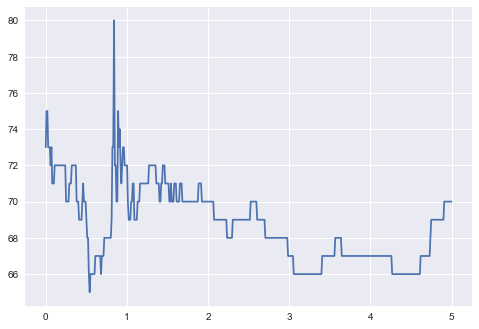

In [173]:
import matplotlib.pyplot as plt

accuracies_1, lamdas_1, max_accuracy_1, max_accuracy_lamda_1 = compute_accuracy(reward_function_1, expert_optimal_actions_1)

print(max_accuracy_1, max_accuracy_lamda_1)

plt.plot(lamdas_1,accuracies_1)
plt.show()

In [174]:
#max_solver_reward_function_1, D, B, C = compute_solver(0.05, reward_function_1, expert_optimal_actions_1)
max_solver_reward_function_1 = compute_solver(max_accuracy_lamda_1, reward_function_1, expert_optimal_actions_1)

0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 2
8 2
9 2
10 2
11 3
12 3
13 3
14 3
15 3
16 2
17 2
18 2
19 2
20 2
21 2
22 2
23 3
24 3
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 3
53 3
54 3
55 3
56 2
57 2
58 2
59 2
60 2
61 3
62 3
63 3
64 3
65 3
66 2
67 2
68 2
69 2
70 3
71 3
72 3
73 3
74 3
75 3
76 3
77 2
78 2
79 2
80 3
81 3
82 3
83 3
84 3
85 3
86 3
87 3
88 2
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.8190e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.5450e+00 -5.7590e+01  2e+02  5e-01  3e+00  1e+00
 2:  1.3294e+00 -2.7962e+01  9e+01  2e-01  1e+00  5e-01
 3:  1.5504e+00 -9.0826e+00  3e+01  9e-02  5e-01  1e-01
 4:  8.2417e-01 -2.7906e+00  9e+00  3e-02  2e-01  4e-02
 5:  7.8952e-01 -1.7358e+00  6e+00  2e-02  1e-01  2e-02
 6:  4.6079e-01 -7.9919e-01  3e+00  1e-02  5e-02  4e-03
 7:  4.4890e-01 -6.9627e-01  3e+00  9e-03  5e-02  3e-03
 8:  2.5

In [160]:
def reshape_solver_reward_function(reward_function_np):
    rf_matrix = np.zeros([10,10])
    
    for i in range(10):
        for j in range(10):
            rf_matrix[i][j] = reward_function_np[j*10 + i]
            
    return rf_matrix

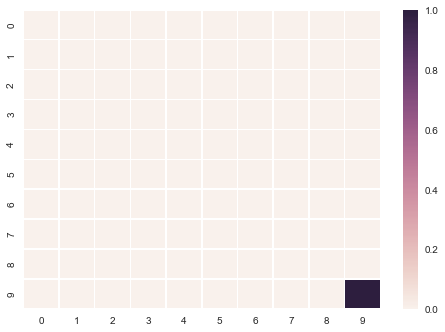

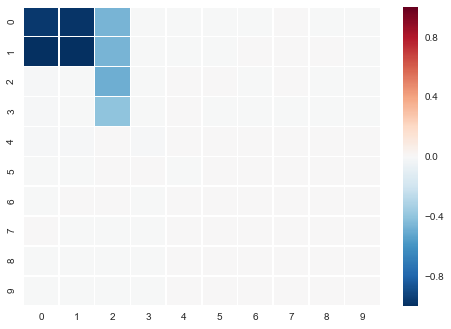

In [175]:
heat_map(map_to_matrix(reward_function_1, 10, 10))
heat_map(reshape_solver_reward_function(np.array(max_solver_reward_function_1)))

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  9e+00  1e+00
 1:  1.4201e+01 -1.2645e+03  2e+03  1e-01  4e+00  1e+00
 2: -4.0363e+01 -5.3629e+02  9e+02  4e-02  2e+00  7e-01
 3: -1.2263e+02 -4.5557e+02  7e+02  3e-02  1e+00  6e-01
 4: -2.1316e+02 -3.9998e+02  5e+02  2e-02  6e-01  4e-01
 5: -2.8739e+02 -3.6086e+02  2e+02  6e-03  2e-01  2e-01
 6: -3.1869e+02 -3.6005e+02  1e+02  3e-03  1e-01  1e-01
 7: -3.4118e+02 -3.6073e+02  6e+01  2e-03  6e-02  6e-02
 8: -3.4983e+02 -3.6039e+02  4e+01  9e-04  3e-02  3e-02
 9: -3.5191e+02 -3.6036e+02  3e+01  7e-04  3e-02  3e-02
10: -3.5709e+02 -3.6161e+02  2e+01  4e-04  1e-02  2e-02
11: -3.6155e+02 -3.6305e+02  5e+00  1e-04  5e-03  5e-03
12: -3.6286e+02 -3.6336e+02  2e+00  4e-05  2e-03  2e-03
13: -3.6285e+02 -3.6332e+02  2e+00  4e-05  2e-03  2e-03
14: -3.6318e+02 -3.6340e+02  8e-01  2e-05  7e-04  8e-04
15: -3.6332e+02 -3.6343e+02  4e-01  1e-05  4e-04  4e-04
16: -3.6342e+02 -3.6345e+02  1e-01  3e-06  1e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  9e+00  1e+00
 1:  2.1239e+01 -1.2510e+03  2e+03  1e-01  4e+00  1e+00
 2: -2.2465e+01 -5.0096e+02  8e+02  4e-02  2e+00  7e-01
 3: -9.2340e+01 -4.1965e+02  7e+02  3e-02  1e+00  6e-01
 4: -1.6760e+02 -3.5964e+02  5e+02  2e-02  6e-01  4e-01
 5: -2.3182e+02 -3.1964e+02  2e+02  7e-03  3e-01  2e-01
 6: -2.6737e+02 -3.0794e+02  1e+02  3e-03  1e-01  1e-01
 7: -2.7425e+02 -3.0655e+02  9e+01  3e-03  1e-01  9e-02
 8: -2.9620e+02 -3.0696e+02  3e+01  9e-04  3e-02  3e-02
 9: -3.0222e+02 -3.0793e+02  2e+01  5e-04  2e-02  2e-02
10: -3.0223e+02 -3.0697e+02  1e+01  4e-04  2e-02  1e-02
11: -3.0268e+02 -3.0706e+02  1e+01  4e-04  1e-02  1e-02
12: -3.0643e+02 -3.0807e+02  5e+00  1e-04  5e-03  5e-03
13: -3.0740e+02 -3.0831e+02  3e+00  8e-05  3e-03  3e-03
14: -3.0817e+02 -3.0848e+02  9e-01  3e-05  1e-03  9e-04
15: -3.0824e+02 -3.0847e+02  7e-01  2e-05  8e-04  7e-04
16: -3.0846e+02 -3.0853e+02  2e-01  6e-06  2e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  8e+00  1e+00
 1:  2.8109e+01 -1.2442e+03  2e+03  1e-01  4e+00  1e+00
 2: -4.6317e+00 -4.7466e+02  8e+02  4e-02  1e+00  6e-01
 3: -6.4327e+01 -3.7791e+02  6e+02  3e-02  1e+00  5e-01
 4: -1.2514e+02 -3.1516e+02  4e+02  2e-02  6e-01  4e-01
 5: -1.8458e+02 -2.7183e+02  2e+02  7e-03  3e-01  2e-01
 6: -2.1998e+02 -2.5942e+02  1e+02  3e-03  1e-01  1e-01
 7: -2.3399e+02 -2.5767e+02  6e+01  2e-03  8e-02  6e-02
 8: -2.3576e+02 -2.5553e+02  5e+01  2e-03  6e-02  5e-02
 9: -2.4884e+02 -2.5485e+02  2e+01  5e-04  2e-02  2e-02
10: -2.5199e+02 -2.5438e+02  6e+00  2e-04  8e-03  6e-03
11: -2.5382e+02 -2.5457e+02  2e+00  6e-05  2e-03  2e-03
12: -2.5410e+02 -2.5455e+02  1e+00  4e-05  1e-03  1e-03
13: -2.5437e+02 -2.5456e+02  5e-01  2e-05  6e-04  5e-04
14: -2.5451e+02 -2.5457e+02  2e-01  5e-06  2e-04  2e-04
15: -2.5456e+02 -2.5457e+02  5e-02  1e-06  5e-05  5e-05
16: -2.5457e+02 -2.5457e+02  1e-02  4e-07  2e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  8e+00  1e+00
 1:  3.3953e+01 -1.2341e+03  2e+03  1e-01  4e+00  1e+00
 2:  9.6831e+00 -4.5300e+02  7e+02  4e-02  1e+00  6e-01
 3: -4.3020e+01 -3.3316e+02  6e+02  2e-02  9e-01  5e-01
 4: -9.2024e+01 -2.7110e+02  4e+02  2e-02  6e-01  4e-01
 5: -1.3710e+02 -2.3207e+02  2e+02  8e-03  3e-01  2e-01
 6: -1.8202e+02 -2.1293e+02  8e+01  3e-03  1e-01  8e-02
 7: -1.9617e+02 -2.1177e+02  4e+01  1e-03  5e-02  4e-02
 8: -1.9645e+02 -2.1060e+02  4e+01  1e-03  4e-02  4e-02
 9: -2.0308e+02 -2.1003e+02  2e+01  6e-04  2e-02  2e-02
10: -2.0751e+02 -2.1061e+02  8e+00  3e-04  1e-02  8e-03
11: -2.0982e+02 -2.1097e+02  3e+00  1e-04  4e-03  3e-03
12: -2.1056e+02 -2.1102e+02  1e+00  4e-05  1e-03  1e-03
13: -2.1077e+02 -2.1102e+02  7e-01  2e-05  8e-04  7e-04
14: -2.1100e+02 -2.1104e+02  1e-01  4e-06  1e-04  1e-04
15: -2.1103e+02 -2.1104e+02  3e-02  1e-06  4e-05  3e-05
16: -2.1104e+02 -2.1104e+02  1e-02  3e-07  1e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  8e+00  1e+00
 1:  3.8307e+01 -1.2235e+03  2e+03  1e-01  4e+00  1e+00
 2:  1.9666e+01 -4.3512e+02  7e+02  4e-02  1e+00  6e-01
 3: -2.8765e+01 -2.9253e+02  5e+02  2e-02  8e-01  4e-01
 4: -6.4486e+01 -2.4212e+02  4e+02  1e-02  6e-01  4e-01
 5: -1.0381e+02 -1.9934e+02  2e+02  8e-03  3e-01  2e-01
 6: -1.3628e+02 -1.8032e+02  1e+02  4e-03  1e-01  1e-01
 7: -1.5305e+02 -1.7589e+02  6e+01  2e-03  7e-02  6e-02
 8: -1.6329e+02 -1.7412e+02  3e+01  9e-04  3e-02  3e-02
 9: -1.6731e+02 -1.7386e+02  2e+01  5e-04  2e-02  2e-02
10: -1.7052e+02 -1.7370e+02  8e+00  3e-04  1e-02  8e-03
11: -1.7113e+02 -1.7378e+02  7e+00  2e-04  8e-03  7e-03
12: -1.7320e+02 -1.7415e+02  3e+00  8e-05  3e-03  3e-03
13: -1.7326e+02 -1.7413e+02  2e+00  7e-05  3e-03  2e-03
14: -1.7363e+02 -1.7417e+02  1e+00  4e-05  2e-03  1e-03
15: -1.7396e+02 -1.7418e+02  6e-01  2e-05  7e-04  6e-04
16: -1.7407e+02 -1.7419e+02  3e-01  1e-05  4e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  8e+00  1e+00
 1:  4.2161e+01 -1.2113e+03  2e+03  1e-01  4e+00  1e+00
 2:  2.7958e+01 -4.1778e+02  7e+02  4e-02  1e+00  5e-01
 3: -1.4212e+01 -2.6216e+02  4e+02  2e-02  8e-01  4e-01
 4: -3.6923e+01 -2.2134e+02  4e+02  2e-02  6e-01  3e-01
 5: -7.6255e+01 -1.7047e+02  2e+02  8e-03  3e-01  2e-01
 6: -1.0024e+02 -1.5338e+02  1e+02  4e-03  2e-01  1e-01
 7: -1.0922e+02 -1.4617e+02  9e+01  3e-03  1e-01  9e-02
 8: -1.2637e+02 -1.4140e+02  4e+01  1e-03  5e-02  4e-02
 9: -1.2871e+02 -1.3933e+02  3e+01  9e-04  3e-02  3e-02
10: -1.3264e+02 -1.3865e+02  2e+01  5e-04  2e-02  1e-02
11: -1.3672e+02 -1.3854e+02  5e+00  2e-04  6e-03  5e-03
12: -1.3677e+02 -1.3845e+02  4e+00  1e-04  5e-03  4e-03
13: -1.3762e+02 -1.3847e+02  2e+00  7e-05  3e-03  2e-03
14: -1.3776e+02 -1.3846e+02  2e+00  6e-05  2e-03  2e-03
15: -1.3822e+02 -1.3851e+02  7e-01  2e-05  9e-04  7e-04
16: -1.3825e+02 -1.3850e+02  7e-01  2e-05  8e-04  

 8: -1.0568e+02 -1.2017e+02  3e+01  1e-03  4e-02  3e-02
 9: -1.1132e+02 -1.1916e+02  2e+01  7e-04  2e-02  2e-02
10: -1.1606e+02 -1.1870e+02  6e+00  2e-04  8e-03  6e-03
11: -1.1749e+02 -1.1842e+02  2e+00  8e-05  3e-03  2e-03
12: -1.1768e+02 -1.1836e+02  2e+00  6e-05  2e-03  2e-03
13: -1.1770e+02 -1.1835e+02  2e+00  5e-05  2e-03  2e-03
14: -1.1768e+02 -1.1830e+02  2e+00  5e-05  2e-03  2e-03
15: -1.1763e+02 -1.1827e+02  2e+00  5e-05  2e-03  2e-03
16: -1.1747e+02 -1.1806e+02  2e+00  5e-05  2e-03  2e-03
17: -1.1720e+02 -1.1777e+02  3e+00  5e-05  2e-03  2e-03
18: -1.1717e+02 -1.1762e+02  2e+00  4e-05  1e-03  2e-03
19: -1.1719e+02 -1.1747e+02  1e+00  2e-05  8e-04  1e-03
20: -1.1716e+02 -1.1735e+02  1e+00  2e-05  6e-04  7e-04
21: -1.1716e+02 -1.1733e+02  9e-01  1e-05  5e-04  7e-04
22: -1.1714e+02 -1.1728e+02  8e-01  1e-05  4e-04  7e-04
23: -1.1709e+02 -1.1718e+02  5e-01  8e-06  3e-04  4e-04
24: -1.1706e+02 -1.1711e+02  3e-01  4e-06  1e-04  2e-04
25: -1.1703e+02 -1.1705e+02  1e-01  2e-06  6e-05

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  8e+00  1e+00
 1:  4.6657e+01 -1.1930e+03  2e+03  1e-01  4e+00  1e+00
 2:  3.6877e+01 -3.9541e+02  7e+02  4e-02  1e+00  5e-01
 3:  2.9634e+00 -2.3536e+02  4e+02  2e-02  7e-01  4e-01
 4: -1.1698e+01 -2.0381e+02  3e+02  2e-02  6e-01  3e-01
 5: -4.6598e+01 -1.4167e+02  2e+02  8e-03  3e-01  2e-01
 6: -6.3674e+01 -1.2086e+02  1e+02  5e-03  2e-01  1e-01
 7: -7.7956e+01 -1.1148e+02  7e+01  3e-03  1e-01  7e-02
 8: -8.1864e+01 -1.0546e+02  5e+01  2e-03  7e-02  5e-02
 9: -9.1862e+01 -1.0265e+02  2e+01  9e-04  3e-02  2e-02
10: -9.4869e+01 -1.0172e+02  2e+01  6e-04  2e-02  1e-02
11: -9.7141e+01 -1.0091e+02  9e+00  3e-04  1e-02  8e-03
12: -9.9212e+01 -1.0070e+02  4e+00  1e-04  4e-03  3e-03
13: -9.9348e+01 -1.0067e+02  3e+00  1e-04  4e-03  3e-03
14: -9.9913e+01 -1.0068e+02  2e+00  6e-05  2e-03  2e-03
15: -9.9783e+01 -1.0059e+02  2e+00  7e-05  2e-03  2e-03
16: -9.9889e+01 -1.0062e+02  2e+00  6e-05  2e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  8e+00  1e+00
 1:  4.7682e+01 -1.1882e+03  2e+03  1e-01  4e+00  1e+00
 2:  3.8781e+01 -3.8994e+02  7e+02  4e-02  1e+00  5e-01
 3:  6.6118e+00 -2.3017e+02  4e+02  2e-02  7e-01  3e-01
 4: -8.6202e+00 -1.9720e+02  3e+02  2e-02  6e-01  3e-01
 5: -4.1173e+01 -1.3589e+02  2e+02  8e-03  3e-01  2e-01
 6: -5.7819e+01 -1.1417e+02  1e+02  5e-03  2e-01  1e-01
 7: -7.1952e+01 -1.0347e+02  7e+01  3e-03  9e-02  6e-02
 8: -7.7856e+01 -9.7204e+01  4e+01  2e-03  6e-02  4e-02
 9: -8.6576e+01 -9.5025e+01  2e+01  7e-04  2e-02  2e-02
10: -8.8817e+01 -9.3838e+01  1e+01  4e-04  1e-02  1e-02
11: -9.1108e+01 -9.3330e+01  5e+00  2e-04  7e-03  5e-03
12: -9.1660e+01 -9.3203e+01  3e+00  1e-04  5e-03  3e-03
13: -9.2632e+01 -9.3145e+01  1e+00  4e-05  2e-03  1e-03
14: -9.2759e+01 -9.3101e+01  7e-01  3e-05  1e-03  7e-04
15: -9.2904e+01 -9.3086e+01  4e-01  2e-05  5e-04  4e-04
16: -9.2968e+01 -9.3082e+01  2e-01  1e-05  3e-04  

43: -8.9704e+01 -5.2626e+01  1e-09  1e-14  3e+00  1e-12
44: -8.9704e+01 -5.2627e+01  1e-09  1e-14  3e+00  1e-12
45: -8.9704e+01 -5.2627e+01  1e-09  1e-14  3e+00  1e-12
46: -8.9704e+01 -5.2626e+01  1e-09  1e-14  3e+00  1e-12
47: -8.9704e+01 -5.2626e+01  1e-09  1e-14  3e+00  1e-12
48: -8.9704e+01 -5.2627e+01  1e-09  1e-14  3e+00  1e-12
49: -8.9704e+01 -5.2627e+01  1e-09  1e-14  3e+00  1e-12
50: -8.9704e+01 -5.2626e+01  1e-09  1e-14  3e+00  1e-12
51: -8.9704e+01 -5.2626e+01  1e-09  1e-14  3e+00  1e-12
52: -8.9704e+01 -5.2627e+01  1e-09  1e-14  3e+00  1e-12
53: -8.9704e+01 -5.2627e+01  1e-09  1e-14  3e+00  1e-12
54: -8.9704e+01 -5.2626e+01  1e-09  1e-14  3e+00  1e-12
55: -8.9704e+01 -5.2625e+01  1e-09  1e-14  3e+00  1e-12
56: -8.9704e+01 -5.2627e+01  1e-09  1e-14  3e+00  1e-12
57: -8.9704e+01 -5.2627e+01  1e-09  1e-14  3e+00  1e-12
58: -8.9704e+01 -5.2626e+01  1e-09  1e-14  3e+00  1e-12
59: -8.9704e+01 -5.2626e+01  1e-09  1e-14  3e+00  1e-12
60: -8.9704e+01 -5.2627e+01  1e-09  1e-14  3e+00

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  8e+00  1e+00
 1:  4.9625e+01 -1.1781e+03  2e+03  1e-01  4e+00  9e-01
 2:  4.2245e+01 -3.7914e+02  6e+02  4e-02  1e+00  5e-01
 3:  1.2920e+01 -2.1989e+02  4e+02  2e-02  7e-01  3e-01
 4: -6.4937e+00 -1.7887e+02  3e+02  1e-02  5e-01  3e-01
 5: -3.5397e+01 -1.2003e+02  2e+02  7e-03  2e-01  1e-01
 6: -5.2184e+01 -9.7590e+01  9e+01  4e-03  1e-01  8e-02
 7: -6.1735e+01 -8.8134e+01  5e+01  2e-03  8e-02  5e-02
 8: -7.1502e+01 -8.3164e+01  2e+01  1e-03  3e-02  2e-02
 9: -7.4336e+01 -8.1349e+01  1e+01  6e-04  2e-02  1e-02
10: -7.7314e+01 -8.0471e+01  7e+00  3e-04  9e-03  6e-03
11: -7.8066e+01 -8.0122e+01  4e+00  2e-04  6e-03  4e-03
12: -7.8777e+01 -7.9852e+01  2e+00  9e-05  3e-03  2e-03
13: -7.9322e+01 -7.9707e+01  8e-01  3e-05  1e-03  8e-04
14: -7.9415e+01 -7.9672e+01  5e-01  2e-05  7e-04  5e-04
15: -7.9554e+01 -7.9648e+01  2e-01  8e-06  3e-04  2e-04
16: -7.9596e+01 -7.9640e+01  9e-02  4e-06  1e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  8e+00  1e+00
 1:  5.1438e+01 -1.1677e+03  2e+03  1e-01  3e+00  9e-01
 2:  4.5288e+01 -3.6850e+02  6e+02  3e-02  1e+00  5e-01
 3:  1.8089e+01 -2.0976e+02  4e+02  2e-02  7e-01  3e-01
 4: -4.4646e+00 -1.6430e+02  3e+02  1e-02  5e-01  2e-01
 5: -2.9392e+01 -1.0939e+02  1e+02  7e-03  2e-01  1e-01
 6: -4.2181e+01 -9.1869e+01  9e+01  4e-03  1e-01  9e-02
 7: -4.9116e+01 -7.6905e+01  5e+01  2e-03  8e-02  5e-02
 8: -5.9300e+01 -6.8839e+01  2e+01  8e-04  3e-02  2e-02
 9: -6.3957e+01 -6.7939e+01  8e+00  3e-04  1e-02  8e-03
10: -6.4580e+01 -6.7483e+01  6e+00  2e-04  8e-03  6e-03
11: -6.5936e+01 -6.6923e+01  2e+00  8e-05  3e-03  2e-03
12: -6.6364e+01 -6.6841e+01  1e+00  4e-05  1e-03  1e-03
13: -6.6561e+01 -6.6807e+01  5e-01  2e-05  7e-04  5e-04
14: -6.6663e+01 -6.6794e+01  3e-01  1e-05  4e-04  3e-04
15: -6.6731e+01 -6.6777e+01  9e-02  4e-06  1e-04  9e-05
16: -6.6748e+01 -6.6773e+01  5e-02  2e-06  7e-05  

 4: -5.0584e-01 -1.6388e+02  3e+02  1e-02  5e-01  2e-01
 5: -2.3749e+01 -1.0967e+02  1e+02  7e-03  2e-01  1e-01
 6: -3.6405e+01 -9.1448e+01  1e+02  5e-03  2e-01  9e-02
 7: -4.5782e+01 -6.8219e+01  4e+01  2e-03  6e-02  4e-02
 8: -5.5170e+01 -6.2434e+01  1e+01  6e-04  2e-02  1e-02
 9: -5.7456e+01 -6.2279e+01  1e+01  4e-04  1e-02  1e-02
10: -5.9179e+01 -6.1585e+01  5e+00  2e-04  7e-03  5e-03
11: -6.0095e+01 -6.1323e+01  2e+00  1e-04  3e-03  2e-03
12: -6.0775e+01 -6.1227e+01  9e-01  4e-05  1e-03  9e-04
13: -6.0882e+01 -6.1188e+01  6e-01  3e-05  9e-04  6e-04
14: -6.1046e+01 -6.1158e+01  2e-01  9e-06  3e-04  2e-04
15: -6.1098e+01 -6.1143e+01  9e-02  4e-06  1e-04  9e-05
16: -6.1112e+01 -6.1139e+01  5e-02  2e-06  7e-05  5e-05
17: -6.1120e+01 -6.1136e+01  3e-02  1e-06  4e-05  3e-05
18: -6.1129e+01 -6.1133e+01  8e-03  3e-07  1e-05  8e-06
19: -6.1130e+01 -6.1132e+01  5e-03  2e-07  7e-06  5e-06
20: -6.1131e+01 -6.1132e+01  3e-03  1e-07  4e-06  3e-06
21: -6.1131e+01 -6.1132e+01  3e-03  1e-07  4e-06

 5: -1.7428e+01 -1.0688e+02  2e+02  7e-03  3e-01  1e-01
 6: -3.4100e+01 -7.9377e+01  8e+01  4e-03  1e-01  8e-02
 7: -4.2823e+01 -5.8374e+01  3e+01  1e-03  4e-02  3e-02
 8: -5.0319e+01 -5.6197e+01  1e+01  5e-04  2e-02  1e-02
 9: -5.2772e+01 -5.5361e+01  4e+00  2e-04  7e-03  5e-03
10: -5.3481e+01 -5.5174e+01  3e+00  1e-04  5e-03  3e-03
11: -5.4344e+01 -5.4950e+01  1e+00  5e-05  2e-03  1e-03
12: -5.4488e+01 -5.4885e+01  6e-01  3e-05  1e-03  7e-04
13: -5.4665e+01 -5.4825e+01  3e-01  1e-05  5e-04  3e-04
14: -5.4708e+01 -5.4803e+01  2e-01  8e-06  3e-04  2e-04
15: -5.4736e+01 -5.4791e+01  9e-02  5e-06  2e-04  9e-05
16: -5.4754e+01 -5.4783e+01  5e-02  2e-06  8e-05  5e-05
17: -5.4768e+01 -5.4777e+01  1e-02  8e-07  3e-05  2e-05
18: -5.4768e+01 -5.4777e+01  1e-02  7e-07  2e-05  1e-05
19: -5.4765e+01 -5.4775e+01  2e-02  9e-07  3e-05  2e-05
20: -5.4764e+01 -5.4774e+01  3e-02  9e-07  3e-05  2e-05
21: -5.4763e+01 -5.4774e+01  3e-02  9e-07  3e-05  3e-05
22: -5.4763e+01 -5.4774e+01  3e-02  9e-07  3e-05

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  7e+00  1e+00
 1:  5.5100e+01 -1.1430e+03  2e+03  1e-01  3e+00  9e-01
 2:  5.0795e+01 -3.4514e+02  6e+02  3e-02  1e+00  4e-01
 3:  2.6401e+01 -1.8750e+02  3e+02  2e-02  6e-01  3e-01
 4:  1.0194e+01 -1.5758e+02  3e+02  1e-02  5e-01  2e-01
 5: -1.0689e+01 -9.9829e+01  1e+02  7e-03  2e-01  1e-01
 6: -3.0206e+01 -6.5451e+01  6e+01  3e-03  1e-01  6e-02
 7: -3.9258e+01 -5.3807e+01  2e+01  1e-03  4e-02  2e-02
 8: -4.5787e+01 -5.0797e+01  8e+00  4e-04  1e-02  8e-03
 9: -4.6551e+01 -5.0092e+01  6e+00  3e-04  1e-02  6e-03
10: -4.8257e+01 -4.9469e+01  2e+00  1e-04  3e-03  2e-03
11: -4.8853e+01 -4.9310e+01  7e-01  4e-05  1e-03  7e-04
12: -4.8971e+01 -4.9249e+01  4e-01  2e-05  8e-04  5e-04
13: -4.9075e+01 -4.9199e+01  2e-01  1e-05  3e-04  2e-04
14: -4.9115e+01 -4.9184e+01  1e-01  6e-06  2e-04  1e-04
15: -4.9130e+01 -4.9176e+01  7e-02  4e-06  1e-04  7e-05
16: -4.9153e+01 -4.9164e+01  2e-02  9e-07  3e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  7e+00  1e+00
 1:  5.6564e+01 -1.1316e+03  2e+03  1e-01  3e+00  9e-01
 2:  5.2722e+01 -3.3498e+02  6e+02  3e-02  1e+00  4e-01
 3:  2.8900e+01 -1.7782e+02  3e+02  2e-02  6e-01  3e-01
 4:  1.6017e+01 -1.5385e+02  3e+02  1e-02  5e-01  2e-01
 5: -2.9952e+00 -9.6765e+01  2e+02  8e-03  3e-01  1e-01
 6: -1.7846e+01 -6.8214e+01  8e+01  4e-03  1e-01  8e-02
 7: -2.7135e+01 -5.7817e+01  5e+01  3e-03  8e-02  5e-02
 8: -3.8300e+01 -4.5047e+01  1e+01  6e-04  2e-02  1e-02
 9: -4.1276e+01 -4.4269e+01  5e+00  3e-04  8e-03  5e-03
10: -4.2230e+01 -4.3998e+01  3e+00  1e-04  5e-03  3e-03
11: -4.3133e+01 -4.3752e+01  1e+00  5e-05  2e-03  1e-03
12: -4.3298e+01 -4.3664e+01  6e-01  3e-05  1e-03  6e-04
13: -4.3459e+01 -4.3592e+01  2e-01  1e-05  4e-04  2e-04
14: -4.3504e+01 -4.3569e+01  1e-01  5e-06  2e-04  1e-04
15: -4.3530e+01 -4.3556e+01  4e-02  2e-06  7e-05  4e-05
16: -4.3541e+01 -4.3549e+01  1e-02  7e-07  2e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  7e+00  1e+00
 1:  5.7939e+01 -1.1199e+03  2e+03  1e-01  3e+00  8e-01
 2:  5.4367e+01 -3.2494e+02  5e+02  3e-02  1e+00  4e-01
 3:  3.0793e+01 -1.6825e+02  3e+02  2e-02  5e-01  2e-01
 4:  2.0543e+01 -1.4837e+02  3e+02  1e-02  4e-01  2e-01
 5:  2.5936e+00 -9.0802e+01  1e+02  8e-03  2e-01  1e-01
 6: -1.1813e+01 -6.4332e+01  8e+01  4e-03  1e-01  8e-02
 7: -2.2609e+01 -4.6019e+01  4e+01  2e-03  6e-02  4e-02
 8: -2.9667e+01 -4.2987e+01  2e+01  1e-03  4e-02  2e-02
 9: -3.4836e+01 -3.9997e+01  8e+00  4e-04  1e-02  9e-03
10: -3.5884e+01 -3.8734e+01  5e+00  2e-04  8e-03  5e-03
11: -3.7030e+01 -3.8382e+01  2e+00  1e-04  4e-03  2e-03
12: -3.7309e+01 -3.8189e+01  1e+00  7e-05  2e-03  1e-03
13: -3.7746e+01 -3.8034e+01  5e-01  2e-05  8e-04  5e-04
14: -3.7811e+01 -3.8008e+01  3e-01  2e-05  5e-04  3e-04
15: -3.7894e+01 -3.7978e+01  1e-01  7e-06  2e-04  1e-04
16: -3.7930e+01 -3.7965e+01  5e-02  3e-06  9e-05  

Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  7e+00  1e+00
 1:  5.8916e+01 -1.1109e+03  2e+03  1e-01  3e+00  8e-01
 2:  5.5430e+01 -3.1749e+02  5e+02  3e-02  1e+00  4e-01
 3:  3.1857e+01 -1.6115e+02  3e+02  2e-02  5e-01  2e-01
 4:  2.3283e+01 -1.4344e+02  3e+02  1e-02  4e-01  2e-01
 5:  5.4383e+00 -8.4054e+01  1e+02  7e-03  2e-01  1e-01
 6: -9.3150e+00 -5.8949e+01  8e+01  4e-03  1e-01  8e-02
 7: -1.9049e+01 -4.1843e+01  4e+01  2e-03  6e-02  4e-02
 8: -2.4877e+01 -3.8496e+01  2e+01  1e-03  4e-02  2e-02
 9: -3.0664e+01 -3.5704e+01  8e+00  4e-04  1e-02  8e-03
10: -3.2152e+01 -3.4481e+01  4e+00  2e-04  6e-03  4e-03
11: -3.3267e+01 -3.4202e+01  1e+00  8e-05  2e-03  1e-03
12: -3.3645e+01 -3.4085e+01  7e-01  4e-05  1e-03  7e-04
13: -3.3811e+01 -3.4020e+01  3e-01  2e-05  5e-04  3e-04
14: -3.3870e+01 -3.3985e+01  2e-01  1e-05  3e-04  2e-04
15: -3.3930e+01 -3.3957e+01  4e-02  2e-06  7e-05  4e-05
16: -3.3942e+01 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  7e+00  1e+00
 1:  5.9850e+01 -1.1019e+03  2e+03  1e-01  3e+00  8e-01
 2:  5.6357e+01 -3.1010e+02  5e+02  3e-02  9e-01  4e-01
 3:  3.2709e+01 -1.5422e+02  3e+02  2e-02  5e-01  2e-01
 4:  2.5579e+01 -1.3795e+02  3e+02  1e-02  4e-01  2e-01
 5:  7.2343e+00 -7.5560e+01  1e+02  7e-03  2e-01  1e-01
 6: -7.9758e+00 -5.2243e+01  7e+01  4e-03  1e-01  7e-02
 7: -1.7479e+01 -3.7101e+01  3e+01  2e-03  5e-02  3e-02
 8: -2.5634e+01 -3.2082e+01  1e+01  5e-04  2e-02  1e-02
 9: -2.7175e+01 -3.0982e+01  6e+00  3e-04  1e-02  6e-03
10: -2.8613e+01 -3.0549e+01  3e+00  2e-04  5e-03  3e-03
11: -2.9287e+01 -3.0226e+01  1e+00  8e-05  2e-03  1e-03
12: -2.9688e+01 -3.0089e+01  6e-01  3e-05  1e-03  6e-04
13: -2.9726e+01 -3.0062e+01  5e-01  3e-05  9e-04  5e-04
14: -2.9862e+01 -2.9991e+01  2e-01  1e-05  3e-04  2e-04
15: -2.9929e+01 -2.9960e+01  5e-02  3e-06  8e-05  5e-05
16: -2.9941e+01 -2.9954e+01  2e-02  1e-06  3e-05  

Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  7e+00  1e+00
 1:  6.1032e+01 -1.0896e+03  2e+03  1e-01  3e+00  8e-01
 2:  5.7394e+01 -3.0034e+02  5e+02  3e-02  9e-01  4e-01
 3:  3.3513e+01 -1.4515e+02  3e+02  1e-02  5e-01  2e-01
 4:  2.8064e+01 -1.2996e+02  2e+02  1e-02  4e-01  2e-01
 5:  7.7573e+00 -6.1378e+01  1e+02  6e-03  2e-01  1e-01
 6: -7.8725e+00 -4.1854e+01  5e+01  3e-03  9e-02  5e-02
 7: -1.5935e+01 -2.9851e+01  2e+01  1e-03  4e-02  2e-02
 8: -2.2217e+01 -2.7578e+01  8e+00  4e-04  1e-02  8e-03
 9: -2.3999e+01 -2.7001e+01  4e+00  3e-04  8e-03  5e-03
10: -2.4479e+01 -2.6773e+01  3e+00  2e-04  6e-03  3e-03
11: -2.5476e+01 -2.6512e+01  1e+00  9e-05  3e-03  2e-03
12: -2.5916e+01 -2.6344e+01  6e-01  4e-05  1e-03  6e-04
13: -2.6083e+01 -2.6280e+01  3e-01  2e-05  5e-04  3e-04
14: -2.6178e+01 -2.6246e+01  1e-01  6e-06  2e-04  1e-04
15: -2.6211e+01 -2.6235e+01  3e-02  2e-06  6e-05  3e-05
16: -2.6218e+01 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  7e+00  1e+00
 1:  6.2147e+01 -1.0772e+03  2e+03  1e-01  3e+00  8e-01
 2:  5.8220e+01 -2.9066e+02  5e+02  3e-02  9e-01  4e-01
 3:  3.3911e+01 -1.3613e+02  2e+02  1e-02  4e-01  2e-01
 4:  2.9988e+01 -1.2139e+02  2e+02  1e-02  4e-01  2e-01
 5:  6.7735e+00 -5.0091e+01  8e+01  5e-03  1e-01  9e-02
 6: -3.4295e+00 -3.7694e+01  5e+01  3e-03  9e-02  5e-02
 7: -1.4025e+01 -2.6488e+01  2e+01  1e-03  3e-02  2e-02
 8: -1.9906e+01 -2.3988e+01  6e+00  3e-04  1e-02  6e-03
 9: -2.1309e+01 -2.3541e+01  3e+00  2e-04  6e-03  3e-03
10: -2.2112e+01 -2.3259e+01  2e+00  1e-04  3e-03  2e-03
11: -2.2532e+01 -2.3029e+01  7e-01  4e-05  1e-03  7e-04
12: -2.2803e+01 -2.2953e+01  2e-01  1e-05  4e-04  2e-04
13: -2.2883e+01 -2.2926e+01  6e-02  4e-06  1e-04  6e-05
14: -2.2902e+01 -2.2918e+01  2e-02  1e-06  4e-05  2e-05
15: -2.2905e+01 -2.2916e+01  2e-02  9e-07  3e-05  2e-05
16: -2.2908e+01 -2.2915e+01  1e-02  6e-07  2e-05  

42: -2.0547e+01 -1.8860e+00  1e-06  9e-12  9e-02  8e-10
43: -2.0543e+01 -1.8857e+00  1e-06  9e-12  9e-02  8e-10
Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  7e+00  1e+00
 1:  6.3199e+01 -1.0646e+03  2e+03  9e-02  3e+00  8e-01
 2:  5.8850e+01 -2.8107e+02  5e+02  3e-02  8e-01  3e-01
 3:  3.3937e+01 -1.2716e+02  2e+02  1e-02  4e-01  2e-01
 4:  3.1564e+01 -1.1313e+02  2e+02  1e-02  4e-01  2e-01
 5:  7.1407e+00 -4.6642e+01  8e+01  5e-03  1e-01  8e-02
 6:  2.5931e-01 -3.6498e+01  5e+01  3e-03  9e-02  5e-02
 7: -1.1181e+01 -2.2882e+01  2e+01  1e-03  3e-02  2e-02
 8: -1.6225e+01 -2.1111e+01  7e+00  4e-04  1e-02  7e-03
 9: -1.7783e+01 -2.0623e+01  4e+00  2e-04  7e-03  4e-03
10: -1.9053e+01 -2.0224e+01  2e+00  1e-04  3e-03  2e-03
11: -1.9468e+01 -1.9998e+01  7e-01  4e-05  1e-03  7e-04
12: -1.9743e+01 -1.9914e+01  2e-01  1e-05  4e-04  2e-04
13: -1.9832e+01 -1.9881e+01  7e-02  4e-06  1e-04  7e-05
14: -1.9856e+01 

Terminated (singular KKT matrix).
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  6e+00  1e+00
 1:  6.4194e+01 -1.0519e+03  2e+03  9e-02  3e+00  8e-01
 2:  5.9300e+01 -2.7156e+02  5e+02  3e-02  8e-01  3e-01
 3:  3.3621e+01 -1.1822e+02  2e+02  1e-02  4e-01  2e-01
 4:  3.2646e+01 -1.0519e+02  2e+02  1e-02  3e-01  2e-01
 5:  7.5276e+00 -4.3584e+01  7e+01  4e-03  1e-01  7e-02
 6:  2.1076e+00 -3.4309e+01  5e+01  3e-03  9e-02  5e-02
 7: -5.3857e+00 -2.2675e+01  2e+01  1e-03  4e-02  3e-02
 8: -1.2841e+01 -1.8986e+01  9e+00  5e-04  1e-02  9e-03
 9: -1.4609e+01 -1.8029e+01  5e+00  3e-04  8e-03  5e-03
10: -1.6103e+01 -1.7373e+01  2e+00  1e-04  3e-03  2e-03
11: -1.6547e+01 -1.7114e+01  8e-01  5e-05  1e-03  8e-04
12: -1.6840e+01 -1.7005e+01  2e-01  1e-05  4e-04  2e-04
13: -1.6912e+01 -1.6975e+01  9e-02  5e-06  2e-04  9e-05
14: -1.6941e+01 -1.6963e+01  3e-02  2e-06  5e-05  3e-05
15: -1.6944e+01 -1.6961e+01  2e-02  1e-06  4e-05  2e-05
16: -1.6950e+01 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  6e+00  1e+00
 1:  6.5134e+01 -1.0390e+03  2e+03  9e-02  3e+00  7e-01
 2:  5.9582e+01 -2.6212e+02  4e+02  3e-02  8e-01  3e-01
 3:  3.2989e+01 -1.0931e+02  2e+02  1e-02  3e-01  2e-01
 4:  3.3136e+01 -9.6965e+01  2e+02  1e-02  3e-01  2e-01
 5:  1.4200e+01 -4.7101e+01  9e+01  5e-03  1e-01  8e-02
 6:  4.2798e+00 -3.2224e+01  5e+01  3e-03  9e-02  5e-02
 7:  1.7547e+00 -2.5900e+01  4e+01  2e-03  6e-02  4e-02
 8: -9.1018e+00 -1.7046e+01  1e+01  7e-04  2e-02  1e-02
 9: -1.0994e+01 -1.5414e+01  6e+00  4e-04  1e-02  6e-03
10: -1.2736e+01 -1.4723e+01  3e+00  2e-04  5e-03  3e-03
11: -1.2955e+01 -1.4500e+01  2e+00  1e-04  4e-03  2e-03
12: -1.3757e+01 -1.4200e+01  6e-01  4e-05  1e-03  6e-04
13: -1.3825e+01 -1.4160e+01  5e-01  3e-05  8e-04  5e-04
14: -1.3933e+01 -1.4101e+01  2e-01  1e-05  4e-04  2e-04
15: -1.4022e+01 -1.4061e+01  5e-02  3e-06  9e-05  5e-05
16: -1.4029e+01 -1.4057e+01  4e-02  2e-06  7e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  6e+00  1e+00
 1:  6.6024e+01 -1.0260e+03  2e+03  9e-02  3e+00  7e-01
 2:  5.9707e+01 -2.5273e+02  4e+02  3e-02  7e-01  3e-01
 3:  3.2062e+01 -1.0043e+02  2e+02  1e-02  3e-01  1e-01
 4:  3.3119e+01 -8.8536e+01  2e+02  1e-02  3e-01  1e-01
 5:  2.0999e+01 -5.3896e+01  1e+02  6e-03  2e-01  1e-01
 6:  7.3498e+00 -3.1008e+01  5e+01  3e-03  9e-02  5e-02
 7:  7.9749e-01 -2.0493e+01  3e+01  2e-03  5e-02  3e-02
 8: -6.6751e+00 -1.3924e+01  1e+01  6e-04  2e-02  1e-02
 9: -8.8010e+00 -1.2301e+01  5e+00  3e-04  8e-03  5e-03
10: -9.8194e+00 -1.1813e+01  3e+00  2e-04  5e-03  3e-03
11: -1.0868e+01 -1.1330e+01  6e-01  4e-05  1e-03  6e-04
12: -1.0992e+01 -1.1266e+01  4e-01  2e-05  6e-04  4e-04
13: -1.1099e+01 -1.1220e+01  2e-01  1e-05  3e-04  2e-04
14: -1.1148e+01 -1.1200e+01  7e-02  4e-06  1e-04  7e-05
15: -1.1131e+01 -1.1194e+01  1e-01  5e-06  1e-04  1e-04
16: -1.1114e+01 -1.1178e+01  1e-01  5e-06  1e-04  

14: -9.1312e+00 -9.2799e+00  2e-01  1e-05  3e-04  2e-04
15: -9.1754e+00 -9.2525e+00  1e-01  6e-06  2e-04  1e-04
16: -9.1620e+00 -9.2464e+00  1e-01  7e-06  2e-04  1e-04
17: -9.1317e+00 -9.2204e+00  2e-01  7e-06  2e-04  2e-04
18: -9.1267e+00 -9.1972e+00  2e-01  6e-06  2e-04  1e-04
19: -9.1191e+00 -9.2001e+00  2e-01  7e-06  2e-04  2e-04
20: -9.1169e+00 -9.1943e+00  2e-01  6e-06  2e-04  2e-04
21: -9.0594e+00 -9.1263e+00  4e-01  6e-06  2e-04  3e-04
22: -9.0537e+00 -9.1127e+00  3e-01  5e-06  1e-04  2e-04
23: -9.0130e+00 -9.0538e+00  2e-01  3e-06  9e-05  2e-04
24: -8.9660e+00 -8.9854e+00  1e-01  2e-06  4e-05  8e-05
25: -8.9550e+00 -8.9683e+00  9e-02  1e-06  3e-05  6e-05
26: -8.9524e+00 -8.9653e+00  9e-02  1e-06  3e-05  6e-05
27: -8.9453e+00 -8.9541e+00  7e-02  8e-07  2e-05  5e-05
28: -8.9401e+00 -8.9491e+00  6e-02  6e-07  2e-05  5e-05
29: -8.9335e+00 -8.9387e+00  3e-02  4e-07  1e-05  3e-05
30: -8.9264e+00 -8.9271e+00  8e-03  8e-08  3e-06  7e-06
31: -8.9254e+00 -8.9254e+00  4e-03  4e-08  5e-06

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  6e+00  1e+00
 1:  6.7470e+01 -1.0029e+03  2e+03  9e-02  2e+00  7e-01
 2:  5.9579e+01 -2.3644e+02  4e+02  2e-02  7e-01  3e-01
 3:  3.0141e+01 -8.6778e+01  2e+02  1e-02  3e-01  1e-01
 4:  3.1661e+01 -7.3800e+01  1e+02  9e-03  2e-01  1e-01
 5:  2.5609e+01 -5.2990e+01  1e+02  7e-03  2e-01  1e-01
 6:  1.6235e+01 -2.9661e+01  6e+01  4e-03  1e-01  6e-02
 7:  1.0616e+01 -2.2035e+01  5e+01  3e-03  7e-02  4e-02
 8: -4.7081e-01 -1.1804e+01  2e+01  9e-04  3e-02  2e-02
 9: -1.7359e+00 -1.0297e+01  1e+01  7e-04  2e-02  1e-02
10: -5.0495e+00 -8.4272e+00  5e+00  3e-04  7e-03  5e-03
11: -5.1689e+00 -8.0608e+00  4e+00  2e-04  6e-03  4e-03
12: -6.5183e+00 -7.4448e+00  1e+00  8e-05  2e-03  1e-03
13: -6.3281e+00 -7.3530e+00  2e+00  9e-05  2e-03  2e-03
14: -6.2638e+00 -7.2551e+00  2e+00  8e-05  2e-03  2e-03
15: -6.3446e+00 -7.1091e+00  1e+00  6e-05  2e-03  1e-03
16: -6.4035e+00 -7.0487e+00  1e+00  5e-05  1e-03  

18: -4.5959e+00 -5.3137e+00  1e+00  6e-05  2e-03  1e-03
19: -4.6768e+00 -5.1130e+00  1e+00  4e-05  1e-03  8e-04
20: -4.7583e+00 -4.9618e+00  5e-01  2e-05  4e-04  4e-04
21: -4.7910e+00 -4.8838e+00  2e-01  8e-06  2e-04  2e-04
22: -4.7767e+00 -4.8795e+00  3e-01  9e-06  2e-04  2e-04
23: -4.7183e+00 -4.8478e+00  5e-01  1e-05  3e-04  4e-04
24: -4.6208e+00 -4.7480e+00  7e-01  1e-05  3e-04  5e-04
25: -4.5394e+00 -4.6564e+00  9e-01  1e-05  3e-04  6e-04
26: -4.5517e+00 -4.6562e+00  7e-01  9e-06  2e-04  5e-04
27: -4.5208e+00 -4.5991e+00  5e-01  7e-06  2e-04  4e-04
28: -4.4959e+00 -4.5355e+00  3e-01  3e-06  9e-05  2e-04
29: -4.4395e+00 -4.4567e+00  1e-01  1e-06  4e-05  8e-05
30: -4.4133e+00 -4.4226e+00  8e-02  8e-07  2e-05  7e-05
31: -4.3951e+00 -4.3966e+00  2e-02  2e-07  8e-06  2e-05
32: -4.3908e+00 -4.3907e+00  6e-03  6e-08  5e-06  5e-06
33: -4.3904e+00 -4.3891e+00  5e-03  5e-08  3e-05  4e-06
34: -4.3895e+00 -4.3695e+00  2e-03  2e-08  2e-04  2e-06
35: -4.3893e+00 -4.3735e+00  6e-04  6e-09  1e-04

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  6e+00  1e+00
 1:  6.8404e+01 -9.8898e+02  2e+03  9e-02  2e+00  7e-01
 2:  5.9242e+01 -2.2366e+02  4e+02  2e-02  6e-01  3e-01
 3:  2.7627e+01 -7.4009e+01  1e+02  9e-03  2e-01  1e-01
 4:  2.8902e+01 -5.9277e+01  1e+02  7e-03  2e-01  1e-01
 5:  2.4525e+01 -4.2755e+01  9e+01  6e-03  1e-01  8e-02
 6:  2.0245e+01 -2.6826e+01  6e+01  4e-03  1e-01  6e-02
 7:  1.3936e+01 -1.7790e+01  4e+01  3e-03  7e-02  4e-02
 8:  3.5658e+00 -6.9686e+00  1e+01  9e-04  2e-02  2e-02
 9:  1.2539e+00 -5.6737e+00  1e+01  6e-04  1e-02  1e-02
10: -1.2761e+00 -4.5058e+00  5e+00  3e-04  7e-03  5e-03
11: -1.9373e+00 -3.8892e+00  3e+00  2e-04  4e-03  3e-03
12: -2.6848e+00 -3.5955e+00  1e+00  8e-05  2e-03  1e-03
13: -2.3045e+00 -3.4086e+00  2e+00  9e-05  2e-03  2e-03
14: -2.0299e+00 -3.1272e+00  3e+00  9e-05  2e-03  2e-03
15: -2.2072e+00 -3.1609e+00  2e+00  8e-05  2e-03  2e-03
16: -2.1760e+00 -2.9425e+00  2e+00  6e-05  2e-03  

19: -5.3728e-01 -1.0058e+00  1e+00  4e-05  1e-03  1e-03
20: -4.7572e-01 -7.2499e-01  8e-01  2e-05  5e-04  6e-04
21: -4.3006e-01 -5.2659e-01  3e-01  8e-06  2e-04  2e-04
22: -4.1887e-01 -5.1868e-01  4e-01  8e-06  2e-04  3e-04
23: -3.2610e-01 -4.3727e-01  6e-01  9e-06  2e-04  5e-04
24: -3.0276e-01 -4.0839e-01  6e-01  9e-06  2e-04  5e-04
25: -2.1340e-01 -3.1442e-01  8e-01  9e-06  2e-04  5e-04
26: -2.2604e-01 -3.1039e-01  6e-01  7e-06  2e-04  4e-04
27: -1.8481e-01 -2.5426e-01  5e-01  6e-06  1e-04  3e-04
28: -1.7730e-01 -2.3753e-01  4e-01  5e-06  1e-04  3e-04
29: -8.8213e-02 -1.1150e-01  2e-01  2e-06  5e-05  1e-04
30: -6.5208e-02 -7.8219e-02  1e-01  1e-06  3e-05  8e-05
31: -4.8063e-02 -5.3723e-02  5e-02  5e-07  1e-05  3e-05
32: -4.0168e-02 -4.2290e-02  2e-02  2e-07  4e-06  1e-05
33: -3.7802e-02 -4.2065e-02  9e-03  9e-08  1e-05  8e-06
34: -3.6869e-02 -3.8809e-02  6e-03  6e-08  1e-05  6e-06
35: -3.5767e-02 -3.6809e-02  2e-03  2e-08  4e-06  2e-06
36: -3.5500e-02 -2.0090e-02  7e-04  7e-09  1e-04

 2:  5.8512e+01 -2.0948e+02  4e+02  2e-02  6e-01  2e-01
 3:  2.4085e+01 -5.9580e+01  1e+02  7e-03  2e-01  8e-02
 4:  2.4361e+01 -4.2406e+01  9e+01  6e-03  1e-01  7e-02
 5:  2.0039e+01 -2.6562e+01  6e+01  4e-03  1e-01  5e-02
 6:  1.5046e+01 -1.4456e+01  4e+01  2e-03  6e-02  4e-02
 7:  7.2317e+00 -6.3460e+00  2e+01  1e-03  3e-02  2e-02
 8:  3.1147e+00 -2.7517e+00  8e+00  5e-04  1e-02  8e-03
 9:  2.8093e+00 -1.9252e+00  6e+00  4e-04  1e-02  6e-03
10:  8.1019e-01 -3.8174e-01  2e+00  1e-04  2e-03  1e-03
11:  5.8120e-02 -2.1602e-02  1e-01  7e-06  2e-04  9e-05
12:  5.8893e-04 -2.1763e-04  1e-03  7e-08  2e-06  9e-07
13:  5.8891e-06 -2.1763e-06  1e-05  7e-10  2e-08  9e-09
14:  5.8891e-08 -2.1763e-08  1e-07  7e-12  8e-10  9e-11
15:  5.8891e-10 -2.1763e-10  1e-09  7e-14  4e-10  9e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  5e+00  1e+00
 1:  6.9365e+01 -9.7239e+02  2e+03  9e-02  2e+00  7e-01
 2:  5.8395e+01 -2.0768e+0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  5e+00  1e+00
 1:  7.0275e+01 -9.5267e+02  1e+03  9e-02  2e+00  6e-01
 2:  5.6940e+01 -1.8943e+02  3e+02  2e-02  5e-01  2e-01
 3:  1.9635e+01 -4.5300e+01  8e+01  5e-03  1e-01  6e-02
 4:  1.4135e+01 -2.0160e+01  4e+01  3e-03  7e-02  4e-02
 5:  1.0946e+01 -1.0793e+01  3e+01  2e-03  4e-02  2e-02
 6:  1.6727e+00 -8.5113e-01  3e+00  2e-04  5e-03  3e-03
 7:  2.3378e-02 -1.0862e-02  4e-02  3e-06  7e-05  4e-05
 8:  2.3376e-04 -1.0861e-04  4e-04  3e-08  7e-07  4e-07
 9:  2.3376e-06 -1.0861e-06  4e-06  3e-10  7e-09  4e-09
10:  2.3376e-08 -1.0861e-08  4e-08  3e-12  7e-11  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  5e+00  1e+00
 1:  7.0358e+01 -9.5063e+02  1e+03  9e-02  2e+00  6e-01
 2:  5.6768e+01 -1.8758e+02  3e+02  2e-02  5e-01  2e-01
 3:  1.9338e+01 -4.4543e+01  8e+01  5e-03  1e-01  6e-02
 4:  1.3023e+01 -1.8532e+01 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  5e+00  1e+00
 1:  7.1184e+01 -9.2757e+02  1e+03  8e-02  2e+00  6e-01
 2:  5.4602e+01 -1.6694e+02  3e+02  2e-02  4e-01  2e-01
 3:  1.6094e+01 -3.6555e+01  6e+01  4e-03  1e-01  4e-02
 4:  7.6758e+00 -9.4016e+00  2e+01  1e-03  3e-02  2e-02
 5:  1.3322e+00 -1.0968e+00  3e+00  2e-04  4e-03  3e-03
 6:  1.7863e-02 -1.3873e-02  4e-02  3e-06  6e-05  3e-05
 7:  1.7862e-04 -1.3873e-04  4e-04  3e-08  6e-07  3e-07
 8:  1.7862e-06 -1.3873e-06  4e-06  3e-10  6e-09  3e-09
 9:  1.7862e-08 -1.3873e-08  4e-08  3e-12  6e-11  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  5e+00  1e+00
 1:  7.1252e+01 -9.2542e+02  1e+03  8e-02  2e+00  6e-01
 2:  5.4381e+01 -1.6505e+02  3e+02  2e-02  4e-01  2e-01
 3:  1.5808e+01 -3.5857e+01  6e+01  4e-03  9e-02  4e-02
 4:  7.4069e+00 -8.9430e+00  2e+01  1e-03  3e-02  2e-02
 5:  9.9565e-01 -8.2629e-01 

Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  5e+00  1e+00
 1:  7.2037e+01 -8.9676e+02  1e+03  8e-02  2e+00  6e-01
 2:  5.1214e+01 -1.4004e+02  2e+02  2e-02  3e-01  1e-01
 3:  1.2896e+01 -2.6881e+01  5e+01  3e-03  7e-02  3e-02
 4:  4.2988e+00 -4.3856e+00  1e+01  7e-04  1e-02  8e-03
 5:  8.0743e-02 -7.2099e-02  2e-01  1e-05  3e-04  1e-04
 6:  8.0784e-04 -7.2132e-04  2e-03  1e-07  3e-06  1e-06
 7:  8.0784e-06 -7.2132e-06  2e-05  1e-09  3e-08  1e-08
 8:  8.0784e-08 -7.2132e-08  2e-07  1e-11  3e-10  1e-10
 9:  8.0784e-10 -7.2132e-10  2e-09  1e-13  3e-12  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  5e+00  1e+00
 1:  7.2091e+01 -8.9451e+02  1e+03  8e-02  2e+00  6e-01
 2:  5.0949e+01 -1.3810e+02  2e+02  2e-02  3e-01  1e-01
 3:  1.2675e+01 -2.6225e+01  5e+01  3e-03  7e-02  3e-02
 4:  4.0911e+00 -4.1327e+00  1e+01  7e-04  1e-02  8e-03
 5: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  4e+00  1e+00
 1:  7.2710e+01 -8.6472e+02  1e+03  8e-02  2e+00  5e-01
 2:  4.7265e+01 -1.1257e+02  2e+02  1e-02  3e-01  1e-01
 3:  9.8107e+00 -1.8230e+01  3e+01  2e-03  5e-02  2e-02
 4:  1.8830e+00 -1.7228e+00  4e+00  3e-04  6e-03  3e-03
 5:  2.0338e-02 -1.8451e-02  4e-02  3e-06  6e-05  4e-05
 6:  2.0337e-04 -1.8450e-04  4e-04  3e-08  6e-07  4e-07
 7:  2.0337e-06 -1.8450e-06  4e-06  3e-10  6e-09  4e-09
 8:  2.0337e-08 -1.8450e-08  4e-08  3e-12  6e-11  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  4e+00  1e+00
 1:  7.2752e+01 -8.6239e+02  1e+03  8e-02  2e+00  5e-01
 2:  4.6965e+01 -1.1059e+02  2e+02  1e-02  3e-01  1e-01
 3:  9.5930e+00 -1.7659e+01  3e+01  2e-03  4e-02  2e-02
 4:  1.7530e+00 -1.5949e+00  4e+00  3e-04  5e-03  3e-03
 5:  1.8671e-02 -1.6872e-02  4e-02  3e-06  6e-05  3e-05
 6:  1.8670e-04 -1.6871e-04 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  4e+00  1e+00
 1:  7.3304e+01 -8.2701e+02  1e+03  8e-02  1e+00  5e-01
 2:  4.2226e+01 -8.0629e+01  2e+02  1e-02  2e-01  8e-02
 3:  6.4418e+00 -9.9557e+00  2e+01  1e-03  2e-02  1e-02
 4:  4.5901e-01 -3.9979e-01  1e+00  7e-05  1e-03  8e-04
 5:  4.5954e-03 -4.0017e-03  1e-02  7e-07  1e-05  8e-06
 6:  4.5953e-05 -4.0017e-05  1e-04  7e-09  1e-07  8e-08
 7:  4.5953e-07 -4.0017e-07  1e-06  7e-11  1e-09  8e-10
 8:  4.5953e-09 -4.0017e-09  1e-08  7e-13  1e-11  8e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  4e+00  1e+00
 1:  7.3335e+01 -8.2463e+02  1e+03  8e-02  1e+00  5e-01
 2:  4.1896e+01 -7.8617e+01  2e+02  1e-02  2e-01  8e-02
 3:  6.2414e+00 -9.5042e+00  2e+01  1e-03  2e-02  1e-02
 4:  4.1150e-01 -3.5858e-01  9e-01  6e-05  1e-03  7e-04
 5:  4.1181e-03 -3.5879e-03  9e-03  6e-07  1e-05  7e-06
 6:  4.1180e-05 -3.5879e-05 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  4e+00  1e+00
 1:  7.3751e+01 -7.8853e+02  1e+03  7e-02  1e+00  5e-01
 2:  3.6777e+01 -4.8276e+01  1e+02  7e-03  1e-01  5e-02
 3:  3.5435e+00 -3.9600e+00  9e+00  6e-04  1e-02  5e-03
 4:  6.3548e-02 -5.8349e-02  1e-01  1e-05  2e-04  9e-05
 5:  6.3540e-04 -5.8342e-04  1e-03  1e-07  2e-06  9e-07
 6:  6.3540e-06 -5.8342e-06  1e-05  1e-09  2e-08  9e-09
 7:  6.3540e-08 -5.8342e-08  1e-07  1e-11  2e-10  9e-11
 8:  6.3540e-10 -5.8342e-10  1e-09  1e-13  2e-12  9e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  4e+00  1e+00
 1:  7.3774e+01 -7.8611e+02  1e+03  7e-02  1e+00  5e-01
 2:  3.6426e+01 -4.6244e+01  1e+02  7e-03  1e-01  5e-02
 3:  3.4074e+00 -3.7015e+00  8e+00  6e-04  1e-02  5e-03
 4:  5.6331e-02 -5.1756e-02  1e-01  9e-06  2e-04  8e-05
 5:  5.6325e-04 -5.1750e-04  1e-03  9e-08  2e-06  8e-07
 6:  5.6324e-06 -5.1750e-06 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  4e+00  1e+00
 1:  7.4084e+01 -7.4959e+02  1e+03  7e-02  1e+00  4e-01
 2:  3.2805e+01 -1.9328e+01  7e+01  4e-03  7e-02  4e-02
 3:  1.9437e+00 -1.0866e+00  4e+00  3e-04  4e-03  2e-03
 4:  1.9692e-02 -1.0991e-02  4e-02  3e-06  4e-05  2e-05
 5:  1.9691e-04 -1.0991e-04  4e-04  3e-08  4e-07  2e-07
 6:  1.9691e-06 -1.0991e-06  4e-06  3e-10  4e-09  2e-09
 7:  1.9691e-08 -1.0991e-08  4e-08  3e-12  4e-11  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  4e+00  1e+00
 1:  7.4102e+01 -7.4714e+02  1e+03  7e-02  1e+00  4e-01
 2:  3.2663e+01 -1.9347e+01  6e+01  4e-03  7e-02  4e-02
 3:  1.8804e+00 -1.0576e+00  3e+00  2e-04  4e-03  2e-03
 4:  1.9027e-02 -1.0687e-02  3e-02  2e-06  4e-05  2e-05
 5:  1.9026e-04 -1.0687e-04  3e-04  2e-08  4e-07  2e-07
 6:  1.9026e-06 -1.0687e-06  3e-06  2e-10  4e-09  2e-09
 7:  1.9026e-08 -1.0687e-08 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  3e+00  1e+00
 1:  7.4332e+01 -7.1042e+02  1e+03  7e-02  1e+00  4e-01
 2:  3.0505e+01 -1.9349e+01  6e+01  4e-03  6e-02  3e-02
 3:  1.1629e+00 -7.1134e-01  2e+00  2e-04  2e-03  1e-03
 4:  1.1652e-02 -7.1253e-03  2e-02  2e-06  2e-05  1e-05
 5:  1.1652e-04 -7.1251e-05  2e-04  2e-08  2e-07  1e-07
 6:  1.1652e-06 -7.1251e-07  2e-06  2e-10  2e-09  1e-09
 7:  1.1652e-08 -7.1251e-09  2e-08  2e-12  2e-11  1e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  3e+00  1e+00
 1:  7.4345e+01 -7.0797e+02  1e+03  7e-02  1e+00  4e-01
 2:  3.0360e+01 -1.9332e+01  6e+01  4e-03  6e-02  3e-02
 3:  1.1278e+00 -6.9337e-01  2e+00  2e-04  2e-03  1e-03
 4:  1.1297e-02 -6.9434e-03  2e-02  2e-06  2e-05  1e-05
 5:  1.1297e-04 -6.9433e-05  2e-04  2e-08  2e-07  1e-07
 6:  1.1297e-06 -6.9433e-07  2e-06  2e-10  2e-09  1e-09
 7:  1.1297e-08 -6.9433e-09 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  3e+00  1e+00
 1:  7.4515e+01 -6.7123e+02  1e+03  6e-02  9e-01  4e-01
 2:  2.8170e+01 -1.8867e+01  6e+01  4e-03  6e-02  3e-02
 3:  7.3091e-01 -4.8126e-01  1e+00  1e-04  1e-03  9e-04
 4:  7.3053e-03 -4.8100e-03  1e-02  1e-06  1e-05  9e-06
 5:  7.3052e-05 -4.8100e-05  1e-04  1e-08  1e-07  9e-08
 6:  7.3052e-07 -4.8100e-07  1e-06  1e-10  1e-09  9e-10
 7:  7.3052e-09 -4.8100e-09  1e-08  1e-12  1e-11  9e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  3e+00  1e+00
 1:  7.4524e+01 -6.6878e+02  1e+03  6e-02  9e-01  4e-01
 2:  2.8024e+01 -1.8823e+01  6e+01  4e-03  6e-02  3e-02
 3:  7.1144e-01 -4.7035e-01  1e+00  1e-04  1e-03  9e-04
 4:  7.1104e-03 -4.7008e-03  1e-02  1e-06  1e-05  9e-06
 5:  7.1103e-05 -4.7007e-05  1e-04  1e-08  1e-07  9e-08
 6:  7.1103e-07 -4.7007e-07  1e-06  1e-10  1e-09  9e-10
 7:  7.1103e-09 -4.7007e-09 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  3e+00  1e+00
 1:  7.4650e+01 -6.3217e+02  1e+03  6e-02  8e-01  3e-01
 2:  2.5837e+01 -1.8003e+01  5e+01  4e-03  5e-02  3e-02
 3:  4.9006e-01 -3.4159e-01  1e+00  7e-05  9e-04  6e-04
 4:  4.8978e-03 -3.4140e-03  1e-02  7e-07  9e-06  6e-06
 5:  4.8978e-05 -3.4140e-05  1e-04  7e-09  9e-08  6e-08
 6:  4.8978e-07 -3.4140e-07  1e-06  7e-11  9e-10  6e-10
 7:  4.8978e-09 -3.4140e-09  1e-08  7e-13  9e-12  6e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  3e+00  1e+00
 1:  7.4658e+01 -6.2973e+02  1e+03  6e-02  8e-01  3e-01
 2:  2.5692e+01 -1.7939e+01  5e+01  4e-03  5e-02  3e-02
 3:  4.7909e-01 -3.3494e-01  1e+00  7e-05  9e-04  6e-04
 4:  4.7882e-03 -3.3476e-03  1e-02  7e-07  9e-06  6e-06
 5:  4.7882e-05 -3.3476e-05  1e-04  7e-09  9e-08  6e-08
 6:  4.7882e-07 -3.3476e-07  1e-06  7e-11  9e-10  6e-10
 7:  4.7882e-09 -3.3476e-09 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  3e+00  1e+00
 1:  7.5124e+01 -6.0202e+02  1e+03  6e-02  7e-01  3e-01
 2:  2.3978e+01 -1.7185e+01  5e+01  3e-03  4e-02  3e-02
 3:  3.8230e-01 -2.7743e-01  8e-01  6e-05  7e-04  5e-04
 4:  3.8213e-03 -2.7731e-03  8e-03  6e-07  7e-06  5e-06
 5:  3.8213e-05 -2.7731e-05  8e-05  6e-09  7e-08  5e-08
 6:  3.8213e-07 -2.7731e-07  8e-07  6e-11  7e-10  5e-10
 7:  3.8213e-09 -2.7731e-09  8e-09  6e-13  7e-12  5e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  3e+00  1e+00
 1:  7.5176e+01 -6.0068e+02  1e+03  6e-02  7e-01  3e-01
 2:  2.3890e+01 -1.7148e+01  5e+01  3e-03  4e-02  3e-02
 3:  3.7851e-01 -2.7523e-01  8e-01  5e-05  7e-04  5e-04
 4:  3.7835e-03 -2.7511e-03  8e-03  5e-07  7e-06  5e-06
 5:  3.7834e-05 -2.7511e-05  8e-05  5e-09  7e-08  5e-08
 6:  3.7834e-07 -2.7511e-07  8e-07  5e-11  7e-10  5e-10
 7:  3.7834e-09 -2.7511e-09 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  3e+00  1e+00
 1:  7.5918e+01 -5.8016e+02  9e+02  5e-02  7e-01  3e-01
 2:  2.2553e+01 -1.6496e+01  5e+01  3e-03  4e-02  3e-02
 3:  3.1847e-01 -2.3638e-01  7e-01  5e-05  6e-04  4e-04
 4:  3.1835e-03 -2.3629e-03  7e-03  5e-07  6e-06  4e-06
 5:  3.1835e-05 -2.3629e-05  7e-05  5e-09  6e-08  4e-08
 6:  3.1835e-07 -2.3629e-07  7e-07  5e-11  6e-10  4e-10
 7:  3.1835e-09 -2.3629e-09  7e-09  5e-13  6e-12  4e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  3e+00  1e+00
 1:  7.5966e+01 -5.7876e+02  9e+02  5e-02  7e-01  3e-01
 2:  2.2463e+01 -1.6447e+01  5e+01  3e-03  4e-02  3e-02
 3:  3.1499e-01 -2.3405e-01  7e-01  5e-05  6e-04  4e-04
 4:  3.1487e-03 -2.3397e-03  7e-03  5e-07  6e-06  4e-06
 5:  3.1487e-05 -2.3397e-05  7e-05  5e-09  6e-08  4e-08
 6:  3.1487e-07 -2.3397e-07  7e-07  5e-11  6e-10  4e-10
 7:  3.1487e-09 -2.3397e-09 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  3e+00  1e+00
 1:  7.6647e+01 -5.5743e+02  9e+02  5e-02  6e-01  3e-01
 2:  2.1101e+01 -1.5644e+01  5e+01  3e-03  4e-02  3e-02
 3:  2.6936e-01 -2.0281e-01  6e-01  4e-05  5e-04  3e-04
 4:  2.6927e-03 -2.0274e-03  6e-03  4e-07  5e-06  3e-06
 5:  2.6927e-05 -2.0274e-05  6e-05  4e-09  5e-08  3e-08
 6:  2.6927e-07 -2.0274e-07  6e-07  4e-11  5e-10  3e-10
 7:  2.6927e-09 -2.0274e-09  6e-09  4e-13  5e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  3e+00  1e+00
 1:  7.6691e+01 -5.5598e+02  9e+02  5e-02  6e-01  3e-01
 2:  2.1009e+01 -1.5586e+01  5e+01  3e-03  4e-02  3e-02
 3:  2.6671e-01 -2.0095e-01  6e-01  4e-05  5e-04  3e-04
 4:  2.6662e-03 -2.0088e-03  6e-03  4e-07  5e-06  3e-06
 5:  2.6662e-05 -2.0088e-05  6e-05  4e-09  5e-08  3e-08
 6:  2.6662e-07 -2.0088e-07  6e-07  4e-11  5e-10  3e-10
 7:  2.6662e-09 -2.0088e-09 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  2e+00  1e+00
 1:  7.7320e+01 -5.3392e+02  9e+02  5e-02  6e-01  3e-01
 2:  1.9636e+01 -1.4667e+01  4e+01  3e-03  3e-02  2e-02
 3:  2.3169e-01 -1.7575e-01  5e-01  3e-05  4e-04  3e-04
 4:  2.3162e-03 -1.7570e-03  5e-03  3e-07  4e-06  3e-06
 5:  2.3162e-05 -1.7570e-05  5e-05  3e-09  4e-08  3e-08
 6:  2.3162e-07 -1.7570e-07  5e-07  3e-11  4e-10  3e-10
 7:  2.3162e-09 -1.7570e-09  5e-09  3e-13  4e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  2e+00  1e+00
 1:  7.7360e+01 -5.3243e+02  9e+02  5e-02  6e-01  3e-01
 2:  1.9544e+01 -1.4603e+01  4e+01  3e-03  3e-02  2e-02
 3:  2.2963e-01 -1.7423e-01  5e-01  3e-05  4e-04  3e-04
 4:  2.2956e-03 -1.7418e-03  5e-03  3e-07  4e-06  3e-06
 5:  2.2956e-05 -1.7418e-05  5e-05  3e-09  4e-08  3e-08
 6:  2.2956e-07 -1.7418e-07  5e-07  3e-11  4e-10  3e-10
 7:  2.2956e-09 -1.7418e-09 

 7:  2.0204e-09 -1.5345e-09  4e-09  3e-13  3e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  2e+00  1e+00
 1:  7.7980e+01 -5.0819e+02  8e+02  5e-02  5e-01  3e-01
 2:  1.8080e+01 -1.3532e+01  4e+01  3e-03  3e-02  2e-02
 3:  2.0045e-01 -1.5223e-01  4e-01  3e-05  3e-04  3e-04
 4:  2.0040e-03 -1.5219e-03  4e-03  3e-07  3e-06  3e-06
 5:  2.0040e-05 -1.5219e-05  4e-05  3e-09  3e-08  3e-08
 6:  2.0040e-07 -1.5219e-07  4e-07  3e-11  3e-10  3e-10
 7:  2.0040e-09 -1.5219e-09  4e-09  3e-13  3e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  2e+00  1e+00
 1:  7.8017e+01 -5.0666e+02  8e+02  5e-02  5e-01  3e-01
 2:  1.7988e+01 -1.3463e+01  4e+01  3e-03  3e-02  2e-02
 3:  1.9883e-01 -1.5098e-01  4e-01  3e-05  3e-04  3e-04
 4:  1.9878e-03 -1.5094e-03  4e-03  3e-07  3e-06  3e-06
 5:  1.9878e-05 -1.5094e-05  4e-05  3e-09  3e-08  3e-08
 6: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  2e+00  1e+00
 1:  7.8591e+01 -4.8177e+02  8e+02  5e-02  5e-01  3e-01
 2:  1.6537e+01 -1.2331e+01  4e+01  2e-03  2e-02  2e-02
 3:  1.7542e-01 -1.3254e-01  4e-01  3e-05  3e-04  2e-04
 4:  1.7538e-03 -1.3251e-03  4e-03  3e-07  3e-06  2e-06
 5:  1.7537e-05 -1.3251e-05  4e-05  3e-09  3e-08  2e-08
 6:  1.7537e-07 -1.3251e-07  4e-07  3e-11  3e-10  2e-10
 7:  1.7537e-09 -1.3251e-09  4e-09  3e-13  3e-12  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  2e+00  1e+00
 1:  7.8626e+01 -4.8019e+02  8e+02  5e-02  5e-01  3e-01
 2:  1.6447e+01 -1.2259e+01  4e+01  2e-03  2e-02  2e-02
 3:  1.7409e-01 -1.3147e-01  4e-01  3e-05  3e-04  2e-04
 4:  1.7405e-03 -1.3144e-03  4e-03  3e-07  3e-06  2e-06
 5:  1.7405e-05 -1.3144e-05  4e-05  3e-09  3e-08  2e-08
 6:  1.7405e-07 -1.3144e-07  4e-07  3e-11  3e-10  2e-10
 7:  1.7405e-09 -1.3144e-09 

 5:  1.5567e-05 -1.1644e-05  3e-05  2e-09  2e-08  2e-08
 6:  1.5567e-07 -1.1644e-07  3e-07  2e-11  2e-10  2e-10
 7:  1.5567e-09 -1.1644e-09  3e-09  2e-13  2e-12  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  2e+00  1e+00
 1:  7.9160e+01 -4.5471e+02  8e+02  4e-02  4e-01  3e-01
 2:  1.5018e+01 -1.1095e+01  3e+01  2e-03  2e-02  2e-02
 3:  1.5457e-01 -1.1552e-01  3e-01  2e-05  2e-04  2e-04
 4:  1.5454e-03 -1.1549e-03  3e-03  2e-07  2e-06  2e-06
 5:  1.5454e-05 -1.1549e-05  3e-05  2e-09  2e-08  2e-08
 6:  1.5454e-07 -1.1549e-07  3e-07  2e-11  2e-10  2e-10
 7:  1.5454e-09 -1.1549e-09  3e-09  2e-13  2e-12  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  2e+00  1e+00
 1:  7.9192e+01 -4.5310e+02  8e+02  4e-02  4e-01  3e-01
 2:  1.4929e+01 -1.1022e+01  3e+01  2e-03  2e-02  2e-02
 3:  1.5344e-01 -1.1458e-01  3e-01  2e-05  2e-04  2e-04
 4: 

 4:  1.3890e-03 -1.0233e-03  3e-03  2e-07  2e-06  2e-06
 5:  1.3890e-05 -1.0233e-05  3e-05  2e-09  2e-08  2e-08
 6:  1.3890e-07 -1.0233e-07  3e-07  2e-11  2e-10  2e-10
 7:  1.3890e-09 -1.0233e-09  3e-09  2e-13  2e-12  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  2e+00  1e+00
 1:  7.9661e+01 -4.2873e+02  7e+02  4e-02  4e-01  3e-01
 2:  1.3618e+01 -9.9231e+00  3e+01  2e-03  2e-02  2e-02
 3:  1.3797e-01 -1.0154e-01  3e-01  2e-05  2e-04  2e-04
 4:  1.3795e-03 -1.0152e-03  3e-03  2e-07  2e-06  2e-06
 5:  1.3795e-05 -1.0152e-05  3e-05  2e-09  2e-08  2e-08
 6:  1.3795e-07 -1.0152e-07  3e-07  2e-11  2e-10  2e-10
 7:  1.3795e-09 -1.0152e-09  3e-09  2e-13  2e-12  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  2e+00  1e+00
 1:  7.9692e+01 -4.2709e+02  7e+02  4e-02  4e-01  3e-01
 2:  1.3532e+01 -9.8500e+00  3e+01  2e-03  2e-02  2e-02
 3: 

 2:  1.2338e+01 -8.8345e+00  3e+01  2e-03  2e-02  2e-02
 3:  1.2412e-01 -8.9634e-02  3e-01  2e-05  2e-04  2e-04
 4:  1.2410e-03 -8.9619e-04  3e-03  2e-07  2e-06  2e-06
 5:  1.2410e-05 -8.9619e-06  3e-05  2e-09  2e-08  2e-08
 6:  1.2410e-07 -8.9619e-08  3e-07  2e-11  2e-10  2e-10
 7:  1.2410e-09 -8.9619e-10  3e-09  2e-13  2e-12  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  2e+00  1e+00
 1:  8.0133e+01 -4.0229e+02  7e+02  4e-02  4e-01  3e-01
 2:  1.2254e+01 -8.7626e+00  3e+01  2e-03  2e-02  2e-02
 3:  1.2323e-01 -8.8861e-02  3e-01  2e-05  2e-04  2e-04
 4:  1.2321e-03 -8.8847e-04  3e-03  2e-07  2e-06  2e-06
 5:  1.2321e-05 -8.8847e-06  3e-05  2e-09  2e-08  2e-08
 6:  1.2321e-07 -8.8847e-08  3e-07  2e-11  2e-10  2e-10
 7:  1.2321e-09 -8.8847e-10  3e-09  2e-13  2e-12  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  4e+03  2e-01  2e+00  1e+00
 1: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  5e+03  2e-01  2e+00  1e+00
 1:  8.0579e+01 -3.7543e+02  7e+02  4e-02  3e-01  3e-01
 2:  1.0930e+01 -7.6306e+00  2e+01  2e-03  1e-02  1e-02
 3:  1.0933e-01 -7.6861e-02  2e-01  2e-05  1e-04  1e-04
 4:  1.0932e-03 -7.6850e-04  2e-03  2e-07  1e-06  1e-06
 5:  1.0932e-05 -7.6850e-06  2e-05  2e-09  1e-08  1e-08
 6:  1.0932e-07 -7.6850e-08  2e-07  2e-11  1e-10  1e-10
 7:  1.0932e-09 -7.6850e-10  2e-09  2e-13  1e-12  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  5e+03  2e-01  2e+00  1e+00
 1:  8.0606e+01 -3.7374e+02  7e+02  4e-02  3e-01  3e-01
 2:  1.0849e+01 -7.5611e+00  2e+01  2e-03  1e-02  1e-02
 3:  1.0849e-01 -7.6134e-02  2e-01  2e-05  1e-04  1e-04
 4:  1.0847e-03 -7.6123e-04  2e-03  2e-07  1e-06  1e-06
 5:  1.0847e-05 -7.6123e-06  2e-05  2e-09  1e-08  1e-08
 6:  1.0847e-07 -7.6123e-08  2e-07  2e-11  1e-10  1e-10
 7:  1.0847e-09 -7.6123e-10 

 5:  9.6213e-06 -6.5577e-06  2e-05  1e-09  1e-08  1e-08
 6:  9.6213e-08 -6.5577e-08  2e-07  1e-11  1e-10  1e-10
 7:  9.6213e-10 -6.5577e-10  2e-09  1e-13  1e-12  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  5e+03  2e-01  2e+00  1e+00
 1:  8.1028e+01 -3.4647e+02  6e+02  4e-02  3e-01  3e-01
 2:  9.5747e+00 -6.4751e+00  2e+01  1e-03  1e-02  1e-02
 3:  9.5441e-02 -6.4912e-02  2e-01  1e-05  1e-04  1e-04
 4:  9.5429e-04 -6.4904e-04  2e-03  1e-07  1e-06  1e-06
 5:  9.5428e-06 -6.4904e-06  2e-05  1e-09  1e-08  1e-08
 6:  9.5428e-08 -6.4904e-08  2e-07  1e-11  1e-10  1e-10
 7:  9.5428e-10 -6.4904e-10  2e-09  1e-13  1e-12  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  5e+03  2e-01  2e+00  1e+00
 1:  8.1054e+01 -3.4476e+02  6e+02  4e-02  3e-01  3e-01
 2:  9.4966e+00 -6.4089e+00  2e+01  1e-03  1e-02  1e-02
 3:  9.4658e-02 -6.4241e-02  2e-01  1e-05  1e-04  1e-04
 4: 

 2:  8.2759e+00 -5.3826e+00  2e+01  1e-03  9e-03  1e-02
 3:  8.2430e-02 -5.3856e-02  2e-01  1e-05  9e-05  1e-04
 4:  8.2421e-04 -5.3850e-04  2e-03  1e-07  9e-07  1e-06
 5:  8.2421e-06 -5.3850e-06  2e-05  1e-09  9e-09  1e-08
 6:  8.2421e-08 -5.3850e-08  2e-07  1e-11  9e-11  1e-10
 7:  8.2421e-10 -5.3850e-10  2e-09  1e-13  9e-13  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  5e+03  2e-01  2e+00  1e+00
 1:  8.1478e+01 -3.1538e+02  6e+02  3e-02  3e-01  2e-01
 2:  8.2014e+00 -5.3205e+00  2e+01  1e-03  9e-03  1e-02
 3:  8.1685e-02 -5.3230e-02  2e-01  1e-05  9e-05  1e-04
 4:  8.1676e-04 -5.3224e-04  2e-03  1e-07  9e-07  1e-06
 5:  8.1676e-06 -5.3224e-06  2e-05  1e-09  9e-09  1e-08
 6:  8.1676e-08 -5.3224e-08  2e-07  1e-11  9e-11  1e-10
 7:  8.1676e-10 -5.3224e-10  2e-09  1e-13  9e-13  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  5e+03  2e-01  2e+00  1e+00
 1: 

 7:  7.2272e-10 -4.7665e-10  2e-09  1e-13  8e-13  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  5e+03  2e-01  2e+00  1e+00
 1:  8.1836e+01 -2.8915e+02  5e+02  3e-02  2e-01  2e-01
 2:  7.1937e+00 -4.7436e+00  2e+01  1e-03  8e-03  1e-02
 3:  7.1661e-02 -4.7411e-02  2e-01  1e-05  8e-05  1e-04
 4:  7.1655e-04 -4.7406e-04  2e-03  1e-07  8e-07  1e-06
 5:  7.1655e-06 -4.7406e-06  2e-05  1e-09  8e-09  1e-08
 6:  7.1655e-08 -4.7406e-08  2e-07  1e-11  8e-11  1e-10
 7:  7.1655e-10 -4.7406e-10  2e-09  1e-13  8e-13  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  5e+03  2e-01  2e+00  1e+00
 1:  8.1859e+01 -2.8739e+02  5e+02  3e-02  2e-01  2e-01
 2:  7.1317e+00 -4.7178e+00  2e+01  1e-03  8e-03  1e-02
 3:  7.1046e-02 -4.7151e-02  2e-01  1e-05  8e-05  1e-04
 4:  7.1039e-04 -4.7146e-04  2e-03  1e-07  8e-07  1e-06
 5:  7.1039e-06 -4.7146e-06  2e-05  1e-09  8e-09  1e-08
 6: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  5e+03  2e-01  2e+00  1e+00
 1:  8.2224e+01 -2.5910e+02  5e+02  3e-02  2e-01  2e-01
 2:  6.1691e+00 -4.2746e+00  1e+01  9e-04  7e-03  9e-03
 3:  6.1483e-02 -4.2693e-02  1e-01  9e-06  7e-05  9e-05
 4:  6.1478e-04 -4.2690e-04  1e-03  9e-08  7e-07  9e-07
 5:  6.1477e-06 -4.2690e-06  1e-05  9e-10  7e-09  9e-09
 6:  6.1477e-08 -4.2690e-08  1e-07  9e-12  7e-11  9e-11
 7:  6.1477e-10 -4.2690e-10  1e-09  9e-14  7e-13  9e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.6729e+03  5e+03  2e-01  2e+00  1e+00
 1:  8.2246e+01 -2.5733e+02  5e+02  3e-02  2e-01  2e-01
 2:  6.1107e+00 -4.2451e+00  1e+01  9e-04  7e-03  9e-03
 3:  6.0902e-02 -4.2397e-02  1e-01  9e-06  7e-05  9e-05
 4:  6.0898e-04 -4.2394e-04  1e-03  9e-08  7e-07  9e-07
 5:  6.0898e-06 -4.2394e-06  1e-05  9e-10  7e-09  9e-09
 6:  6.0898e-08 -4.2394e-08  1e-07  9e-12  7e-11  9e-11
 7:  6.0898e-10 -4.2394e-10 

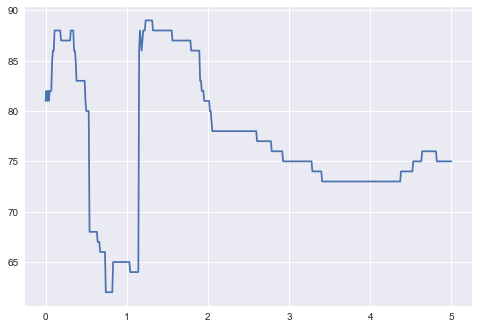

In [55]:
import matplotlib.pyplot as plt

accuracies_2, lamdas_2, max_accuracy_2, max_accuracy_lamda_2 = compute_accuracy(reward_function_2, expert_optimal_actions_2)

print(max_accuracy_2, max_accuracy_lamda_2)

plt.plot(lamdas_2,accuracies_2)
plt.show()

In [171]:
max_solver_reward_function_2 = compute_solver(max_accuracy_lamda_2, reward_function_2, expert_optimal_actions_2)

0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 2
9 2
10 3
11 3
12 3
13 3
14 3
15 3
16 3
17 3
18 2
19 2
20 3
21 3
22 3
23 3
24 3
25 3
26 3
27 3
28 2
29 2
30 0
31 0
32 0
33 0
34 0
35 0
36 3
37 3
38 3
39 2
40 0
41 0
42 0
43 0
44 0
45 0
46 3
47 3
48 3
49 2
50 2
51 1
52 3
53 3
54 3
55 3
56 3
57 3
58 3
59 2
60 2
61 2
62 2
63 3
64 3
65 3
66 0
67 0
68 3
69 2
70 2
71 2
72 2
73 1
74 3
75 0
76 0
77 3
78 3
79 2
80 2
81 2
82 2
83 2
84 2
85 2
86 2
87 3
88 3
89 2
90 3
91 3
92 3
93 3
94 3
95 3
96 3
97 3
98 3
99 2
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+03  4e+03  2e-01  1e+01  1e+00
 1:  6.0312e+01 -9.9580e+02  2e+03  8e-02  5e+00  7e-01
 2:  6.5182e+01 -5.7038e+02  1e+03  5e-02  3e+00  6e-01
 3:  3.6993e+01 -1.5750e+02  3e+02  2e-02  9e-01  2e-01
 4:  1.7476e+01 -3.8875e+01  8e+01  5e-03  3e-01  7e-02
 5:  5.1021e+00 -5.8335e+00  1e+01  9e-04  5e-02  1e-02
 6:  3.7543e-01 -8.6888e-02  5e-01  4e-05  2e-03  5e-04
 7:  3.7854e-03 -8.7593e-04  5e-03  4e-07  2e-05  5e-06
 8:  3.7

In [177]:
np.array(max_solver_reward_function_1)

array([[-9.68085592e-01],
       [-9.99999999e-01],
       [-1.54177977e-02],
       [-1.06197422e-02],
       [-8.20228329e-03],
       [-1.12290102e-09],
       [-4.25631862e-11],
       [ 2.36171254e-11],
       [-5.43403526e-11],
       [-2.76765533e-11],
       [-9.79166319e-01],
       [-9.99999999e-01],
       [-4.65292443e-11],
       [-2.45677357e-03],
       [-8.20228333e-03],
       [-2.75876945e-12],
       [ 3.65435322e-07],
       [-2.16522724e-11],
       [-2.20282888e-11],
       [-7.34460449e-11],
       [-4.62145513e-01],
       [-4.62145513e-01],
       [-4.84729632e-01],
       [-4.03350374e-01],
       [ 8.53404439e-12],
       [ 1.30603925e-10],
       [ 5.16549028e-11],
       [-5.45973110e-11],
       [-1.58659051e-06],
       [-4.25119471e-08],
       [-4.51815479e-11],
       [-4.39333925e-11],
       [-1.83033562e-11],
       [-1.83003372e-03],
       [-1.04716323e-02],
       [ 2.19525669e-04],
       [-7.69571623e-09],
       [-8.03490595e-06],
       [-6.1

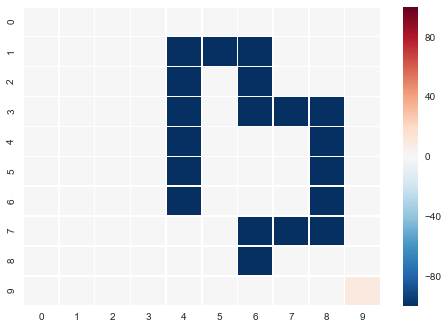

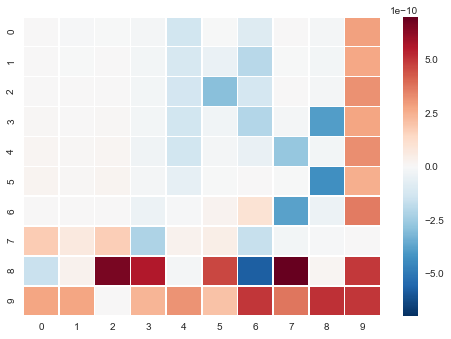

In [172]:
heat_map(map_to_matrix(reward_function_2, 10, 10))
heat_map(reshape_solver_reward_function(np.array(max_solver_reward_function_2)))

In [170]:
np.array(max_solver_reward_function_2)

array([[ 5.29034786e+00],
       [ 5.46658876e+00],
       [ 5.44810060e+00],
       [ 5.48939913e+00],
       [ 5.48852011e+00],
       [ 5.48852013e+00],
       [ 3.42126500e+00],
       [ 6.10310950e+00],
       [-2.80787723e+00],
       [ 8.64908205e+00],
       [ 5.43591667e+00],
       [ 5.28247930e+00],
       [ 5.42923721e+00],
       [ 5.48984611e+00],
       [ 5.48852012e+00],
       [ 5.48852011e+00],
       [ 3.42126502e+00],
       [-1.33514766e+00],
       [ 8.38760594e+00],
       [ 8.41008428e+00],
       [ 6.37261854e+00],
       [ 6.45584506e+00],
       [ 6.30963702e+00],
       [ 6.18493762e+00],
       [ 5.96674255e+00],
       [ 5.68357189e+00],
       [ 6.33716607e-01],
       [ 9.99999999e+00],
       [ 1.00000000e+01],
       [ 3.90264510e+00],
       [-9.99999999e+00],
       [-1.00000000e+01],
       [-1.00000000e+01],
       [-9.99999999e+00],
       [-1.00000000e+01],
       [-2.39096947e-07],
       [-1.16073324e+00],
       [-6.55981426e+00],
       [ 1.0

In [162]:
konark_result_A1 = np.load('estimated_r1.npy')
kA1 = np.load('Aout.npy')
kB1 = np.load('Bout.npy')
kC1 = np.load('Cout.npy')

In [163]:
for i in range(600):
    for j in range(100):
        if (D[i][j] != kA1[i][j]):
            print(i,j,D[i][j],kA1[i][j])

(0, 1, -0.21675330039669505, -0.21675330039669502)
(0, 2, -0.16618869544841688, -0.166188695448417)
(0, 3, -0.12747644942172082, -0.1274764494217208)
(0, 5, -0.07510174546957704, -0.07510174546957694)
(0, 8, -0.03585640017640537, -0.035856400176405394)
(0, 9, -0.11214580440309588, -0.11214580440309584)
(0, 10, 0.01926121791934232, 0.019261217919342325)
(0, 11, 0.010010456253315638, 0.010010456253315642)
(0, 12, 0.004102487127006474, 0.004102487127006466)
(0, 13, 0.000460151348225441, 0.0004601513482254417)
(0, 14, -0.0016672555615201744, -0.0016672555615201716)
(0, 16, -0.0032926163864878794, -0.003292616386487872)
(0, 17, -0.003397075788039162, -0.0033970757880391637)
(0, 18, -0.0036152420465526856, -0.0036152420465526843)
(0, 20, 0.0004036401794025121, 0.00040364017940251203)
(0, 22, 0.0004660190778363171, 0.0004660190778363169)
(0, 23, 0.0003592486952738803, 0.0003592486952738799)
(0, 24, 0.00023534001590674495, 0.00023534001590674574)
(0, 25, 0.00011898987534499985, 0.0001189898753

(12, 93, 2.2869212485791746e-16, 2.286921248579174e-16)
(12, 94, 1.694413194119602e-15, 1.6944131941196017e-15)
(12, 95, 7.379464638207605e-15, 7.379464638207602e-15)
(12, 96, 2.2653960865617668e-14, 2.2653960865617646e-14)
(12, 97, 5.4297812136283246e-14, 5.429781213628333e-14)
(12, 98, 9.423637917313316e-14, 9.423637917312993e-14)
(13, 0, 8.523775033100858e-06, 8.523775033100856e-06)
(13, 3, 0.9480952168481193, 0.948095216848119)
(13, 5, -0.38912984571261, -0.3891298457126101)
(13, 6, -0.2984184967233909, -0.2984184967233908)
(13, 7, -0.22913825886024647, -0.22913825886024652)
(13, 8, -0.1848829431080536, -0.18488294310805364)
(13, 9, -0.5751836443846324, -0.5751836443846323)
(13, 10, 6.851261044586322e-07, 6.851261044586323e-07)
(13, 11, 2.5012050007913474e-05, 2.5012050007913477e-05)
(13, 13, 0.020162218457465388, 0.020162218457465395)
(13, 14, 0.02939159210413007, 0.02939159210413004)
(13, 15, 0.014075720447095295, 0.014075720447095288)
(13, 16, 0.004436210780666304, 0.00443621078

(36, 61, -2.0847334909526727e-11, -2.084733490952672e-11)
(36, 62, -4.001303897395542e-10, -4.0013038973955425e-10)
(36, 63, -4.742716138021583e-09, -4.742716138021585e-09)
(36, 64, -1.813717837453984e-08, -1.813717837453983e-08)
(36, 66, -8.73271118839508e-08, -8.732711188395083e-08)
(36, 67, -1.5340115248438088e-07, -1.5340115248438085e-07)
(36, 68, -5.618990601968058e-07, -5.618990601968055e-07)
(36, 69, -1.3528616565763948e-05, -1.3528616565763943e-05)
(36, 71, -6.539395719912007e-13, -6.539395719912008e-13)
(36, 72, -1.0738153358802173e-11, -1.073815335880218e-11)
(36, 73, -1.1229815580929311e-10, -1.1229815580929315e-10)
(36, 74, -4.721792475438459e-10, -4.721792475438455e-10)
(36, 77, -5.9465183294902475e-09, -5.946518329490247e-09)
(36, 78, -3.8874021256569626e-08, -3.8874021256569606e-08)
(36, 79, -1.1588549572979513e-06, -1.1588549572979502e-06)
(36, 81, -1.9498181089162864e-14, -1.949818108916286e-14)
(36, 82, -2.8335822758712465e-13, -2.833582275871247e-13)
(36, 83, -2.7007

(68, 93, 0.38594002128175126, 5.23089052397083e-10)
(68, 94, 0.09992686181587096, 1.4259630136844871e-09)
(68, 95, 0.014100638688778911, 3.0550729666982516e-09)
(68, 96, 0.0015429293504597293, 5.584415512047214e-09)
(68, 97, 0.00014832214158181978, 9.867367774018827e-09)
(68, 98, 1.3325219550257901e-05, 4.6057460461185975e-08)
(68, 99, 1.25244546561015e-06, 1.2524454656101508e-06)
(69, 0, 6.844763728571319e-07, 6.84476372857132e-07)
(69, 1, 2.4994149676462608e-05, 2.4994149676462605e-05)
(69, 2, 0.0008153881373717987, 0.0008153881373717985)
(69, 4, 0.029765652841475643, 0.02976565284147565)
(69, 5, 0.03330227586198006, 0.033302275861980056)
(69, 6, 0.03321302633182162, 0.0332130263318216)
(69, 7, 0.031146056026328656, 0.031146056026328632)
(69, 8, 0.030476796875958192, 0.03047679687595817)
(69, 9, 0.1380109710003898, 0.13801097100038973)
(69, 10, 7.860716220679718e-06, 7.86071622067972e-06)
(69, 13, 0.9279677308679251, 0.9279677308679253)
(69, 14, 0.6792473346497176, 0.679247334649717)

(95, 11, 1.6181778421188283e-05, 1.6181778421188276e-05)
(95, 12, 0.0003839637812515672, 0.00038396378125156715)
(95, 13, 2.3984577469074193e-05, 2.398457746907419e-05)
(95, 14, 1.0095713676593148e-06, 1.009571367659315e-06)
(95, 15, 3.577132678388164e-08, 3.577132678388163e-08)
(95, 16, 1.151827359413447e-09, 1.1518273594134468e-09)
(95, 18, 1.0184637102341328e-12, 1.018463710234133e-12)
(95, 20, 9.379538787258522e-07, 9.379538787258586e-07)
(95, 22, 0.01886722887451994, 0.018867228874519935)
(95, 23, 0.0007901845443661265, 0.0007901845443661264)
(95, 24, 2.5203571161561236e-05, 2.520357116156124e-05)
(95, 27, 5.28020072331823e-10, 5.280200723318231e-10)
(95, 28, 1.383339875350653e-11, 1.3833398753506533e-11)
(95, 31, 0.0008628789951520311, 0.0008628789951520342)
(95, 33, 0.019729365406269076, 0.01972936540626908)
(95, 35, 9.712418558455669e-06, 9.71241855845567e-06)
(95, 36, 2.2363683036247737e-07, 2.2363683036247742e-07)
(95, 37, 5.254993164720541e-09, 5.254993164720543e-09)
(95, 38

(126, 35, 9.69646118088798e-06, 9.696461180887982e-06)
(126, 36, 2.2301150497581558e-07, 2.2301150497581564e-07)
(126, 37, 5.23380903620165e-09, 5.2338090362016516e-09)
(126, 38, 1.2493531974389865e-10, 1.249353197438987e-10)
(126, 39, 3.098395704793157e-12, 3.0983957047931568e-12)
(126, 42, 0.6800840802978798, 0.6800840802978796)
(126, 45, 2.6148478697206976e-05, 2.6148478697206966e-05)
(126, 46, 7.155023842412629e-07, 7.155023842412628e-07)
(126, 48, 4.991421541390653e-10, 4.991421541390656e-10)
(126, 49, 1.3295972677458954e-11, 1.3295972677458965e-11)
(126, 50, 0.0009907494338956345, 0.0009907494338956349)
(126, 53, 0.013124294404951074, 0.01312429440495107)
(126, 58, 1.2740205965841815e-09, 1.2740205965841817e-09)
(126, 59, 3.7719865979076525e-11, 3.771986597907652e-11)
(126, 62, -0.3020657215658852, -0.3020657215658851)
(126, 63, 0.003647300480956889, 0.003647300480956888)
(126, 64, 0.0007889128677749908, 0.0007889128677749903)
(126, 66, 1.969968560024075e-06, 1.9699685600240744e-

(160, 82, 9.696304561140178e-06, 9.69630456114018e-06)
(160, 84, 3.932344255798942e-05, 3.932344255798943e-05)
(160, 85, 4.583648723877701e-05, 4.583648723877702e-05)
(160, 86, 4.583064150674976e-05, 4.5830641506749746e-05)
(160, 87, 4.067798229968298e-05, 4.067798229968296e-05)
(160, 89, -0.00023378998693440178, -0.00023378998693440218)
(160, 90, 1.1594720212764082e-09, 1.159472021276408e-09)
(160, 93, 7.345246717206819e-07, 7.345246717206824e-07)
(160, 94, 1.3988636848331294e-06, 1.3988636848331304e-06)
(160, 95, 2.0434651451686973e-06, 2.043465145168698e-06)
(160, 96, 2.5353485356634022e-06, 2.5353485356634035e-06)
(160, 97, 2.7932263695151113e-06, 2.7932263695151104e-06)
(161, 0, -2.4373280453447328e-14, -2.4373280453447356e-14)
(161, 2, -2.1844110833248893e-11, -2.1844110833248884e-11)
(161, 3, -4.139489291619024e-10, -4.139489291619025e-10)
(161, 4, -4.86871876944969e-09, -4.868718769449689e-09)
(161, 7, -1.0039873668489334e-07, -1.0039873668489331e-07)
(161, 8, -5.41384744505915

(187, 38, 1.5916660752320796e-05, 1.591666075232087e-05)
(187, 39, -0.0002569040906736974, -0.0002569040906736962)
(187, 43, 0.0009514271231791421, 0.0009514271231791423)
(187, 44, 0.0007890325846060446, 0.0007890325846060448)
(187, 45, 0.0005525146792173661, 0.0005525146792173672)
(187, 46, 0.0003124459490044586, 0.0003124459490044591)
(187, 47, 0.00010080765158519896, 0.00010080765158519971)
(187, 48, -0.00015660046860232346, -0.00015660046860232273)
(187, 49, -0.0039145981413708664, -0.003914598141370862)
(187, 50, 0.0007905511458081896, 0.0007905511458081893)
(187, 52, 0.028485225869124237, 0.02848522586912424)
(187, 53, 0.013126847059915238, 0.013126847059915242)
(187, 54, 0.003650483683726012, 0.0036504836837260245)
(187, 55, -0.0019267460712688409, -0.0019267460712688298)
(187, 56, -0.004962421338443784, -0.004962421338443773)
(187, 57, -0.006396147333411394, -0.006396147333411385)
(187, 58, -0.007661225058149987, -0.007661225058149981)
(187, 59, -0.044838654408861596, -0.044838

(215, 91, 0.02016262461346865, 0.020162624613468648)
(215, 92, 0.029767832899668663, 0.029767832899668657)
(215, 93, 0.033304787807870294, 0.0333047878078703)
(215, 94, 0.03321441567364821, 0.03321441567364823)
(215, 95, 0.031093227665967293, 0.03109322766596731)
(215, 96, 0.02796485579213858, 0.02796485579213859)
(215, 97, 0.024500188704572334, 0.02450018870457234)
(215, 98, 0.022631316883652542, 0.02263131688365256)
(215, 99, 0.0934627279026596, 0.09346272790265964)
(216, 0, 9.97309560183282e-13, 9.973095601832827e-13)
(216, 1, 1.4122951898281282e-11, 1.4122951898281287e-11)
(216, 2, 1.2855235525970773e-10, 1.2855235525970778e-10)
(216, 3, 5.230890523970832e-10, 5.230890523970831e-10)
(216, 5, 3.055072966698249e-09, 3.0550729666982495e-09)
(216, 6, 5.584415512047215e-09, 5.584415512047213e-09)
(216, 7, 9.867367774018829e-09, 9.867367774018826e-09)
(216, 8, 4.6057460461185975e-08, 4.605746046118596e-08)
(216, 10, 3.3747906990516226e-11, 3.374790699051624e-11)
(216, 12, 5.2534271350921

(240, 55, 0.001942244126610256, 0.0019422441266102558)
(240, 56, 0.0019292810493243264, 0.001929281049324326)
(240, 57, 0.0018535607957644016, 0.0018535607957644018)
(240, 58, 0.001931824096806531, 0.0019318240968065306)
(240, 59, 0.010657954752807432, 0.010657954752807425)
(240, 61, 0.028842013889910915, 0.028842013889910912)
(240, 63, 0.031621390839569684, 0.03162139083956968)
(240, 64, 0.02932087649509283, 0.02932087649509281)
(240, 65, 0.02611563851059944, 0.02611563851059942)
(240, 67, 0.01923191271465598, 0.01923191271465597)
(240, 68, 0.017189967564494556, 0.017189967564494545)
(240, 69, 0.06578609454457457, 0.0657860945445745)
(240, 71, 0.6827938393020896, 0.6827938393020893)
(240, 74, 0.2680729963477558, 0.26807299634775567)
(240, 75, 0.1963420214894507, 0.19634202148945065)
(240, 77, 0.1054186123399313, 0.10541861233993126)
(240, 79, 0.20853247444036274, 0.20853247444036266)
(240, 80, 0.0006688369733827802, 0.0006688369733827733)
(240, 81, -0.899556356301138, -0.8995563563011

(265, 36, 4.3386952475815056e-10, 4.338695247581505e-10)
(265, 37, 3.3612439653092767e-09, 3.3612439653092775e-09)
(265, 38, 1.689558411746961e-10, 1.689558411746962e-10)
(265, 39, -2.526354794676553e-11, -2.5263547946765533e-11)
(265, 40, 1.638434191112023e-15, 1.6384341911120226e-15)
(265, 41, 1.9559758867569565e-14, 1.9559758867569562e-14)
(265, 42, 2.7362863540963107e-13, 2.736286354096311e-13)
(265, 43, 4.2721532905274516e-12, 4.272153290527451e-12)
(265, 44, 7.274807048300424e-11, 7.274807048300426e-11)
(265, 45, 1.234279660311303e-09, 1.2342796603113034e-09)
(265, 46, 1.7919188501742355e-08, 1.791918850174236e-08)
(265, 48, 4.932884414155709e-09, 4.932884414155705e-09)
(265, 49, -1.3912755141865162e-09, -1.3912755141865154e-09)
(265, 51, 6.815966713560328e-13, 6.815966713560324e-13)
(265, 53, 1.3569126508026888e-10, 1.356912650802688e-10)
(265, 54, 2.3179732257229577e-09, 2.317973225722957e-09)
(265, 55, 4.246122256556071e-08, 4.246122256556072e-08)
(265, 56, 7.137494051053817e-

(290, 4, 2.1639893016530017e-17, 2.1639893016530007e-17)
(290, 7, 7.099218229807436e-15, 7.099218229807597e-15)
(290, 8, 1.756688940804379e-14, 1.756688940804088e-14)
(290, 9, -2.659804190665882e-14, -2.6598041906865615e-14)
(290, 10, 7.333757061744943e-21, 7.333757061744946e-21)
(290, 11, 1.6096028485267078e-19, 1.609602848526708e-19)
(290, 12, 3.1358897743769082e-18, 3.1358897743769086e-18)
(290, 14, 7.725966769320335e-16, 7.725966769320332e-16)
(290, 15, 8.694210686266666e-15, 8.694210686266662e-15)
(290, 16, 6.680696627555868e-14, 6.680696627555869e-14)
(290, 17, 2.6811611838776396e-13, 2.681161183877652e-13)
(290, 18, 6.247045483981112e-13, 6.247045483980542e-13)
(290, 19, -9.691514109818394e-13, -9.691514109788615e-13)
(290, 20, 1.9812537640354188e-19, 1.9812537640354183e-19)
(290, 23, 1.79308070561469e-15, 1.793080705614689e-15)
(290, 26, 2.748865894985743e-12, 2.7488658949857416e-12)
(290, 27, 1.0302144400564686e-11, 1.0302144400564685e-11)
(290, 28, 2.2266515561126546e-11, 2.2

(317, 73, 1.0211673461771465e-12, 1.0211673461771467e-12)
(317, 74, 1.3850889997568846e-11, 1.3850889997568835e-11)
(317, 75, 1.2618187458434748e-10, 1.2618187458434743e-10)
(317, 76, 5.321564346196662e-10, 5.321564346196664e-10)
(317, 77, 2.222889603532421e-09, 2.2228896035324205e-09)
(317, 78, 3.424675855887252e-08, 3.424675855887251e-08)
(317, 79, 1.1712656695880804e-06, 1.1712656695880795e-06)
(317, 80, 4.57855518697361e-18, 4.578555186973609e-18)
(317, 81, 9.847983099154509e-17, 9.84798309915451e-17)
(317, 82, 1.837823609086442e-15, 1.8378236090864424e-15)
(317, 83, 2.9011664206270394e-14, 2.901166420627038e-14)
(317, 84, 3.6058447320127205e-13, 3.6058447320127195e-13)
(317, 85, 3.0952578228669886e-12, 3.095257822866987e-12)
(317, 87, 1.1070152568838243e-10, 1.1070152568838239e-10)
(317, 88, 2.7436794951715603e-09, 2.743679495171557e-09)
(317, 89, 9.85963976126815e-08, 9.859639761268147e-08)
(317, 91, 3.2964029001654825e-18, 3.2964029001654802e-18)
(317, 94, 9.64426399576063e-15, 

(346, 79, -7.880234493860793e-09, -7.880234493861703e-09)
(346, 80, 9.564374123513006e-17, 9.564374123513005e-17)
(346, 83, 3.5820412535377045e-13, 3.582041253537705e-13)
(346, 84, 3.02454805403834e-12, 3.0245480540383387e-12)
(346, 85, 1.2960549727606371e-11, 1.296054972760636e-11)
(346, 86, 3.6656953521643486e-11, 3.665695352164347e-11)
(346, 87, 7.899027717540497e-11, 7.899027717540489e-11)
(346, 88, 1.2344359330880163e-10, 1.2344359330879928e-10)
(346, 89, -2.5546498275385463e-10, -2.554649827539208e-10)
(346, 90, 3.1728507149619233e-18, 3.1728507149619225e-18)
(346, 91, 5.665309308304217e-17, 5.665309308304212e-17)
(346, 92, 8.267118414336782e-16, 8.267118414336778e-16)
(346, 93, 9.483412747418832e-15, 9.48341274741883e-15)
(346, 95, 3.434089700057621e-13, 3.43408970005762e-13)
(346, 96, 1.0583836406178405e-12, 1.0583836406178393e-12)
(346, 97, 2.4977129784174656e-12, 2.497712978417459e-12)
(346, 98, 4.237464064190736e-12, 4.237464064190586e-12)
(346, 99, -8.223234364899817e-12, -

(373, 87, 4.043473138313454e-09, 4.043473138313452e-09)
(373, 88, 5.052396767341578e-09, 5.052396767341594e-09)
(373, 91, 2.962579717682847e-14, 2.9625797176828456e-14)
(373, 92, 3.6729992198667763e-13, 3.672999219866776e-13)
(373, 93, 3.0983957047931568e-12, 3.0983957047931576e-12)
(373, 94, 1.329597267745896e-11, 1.3295972677458963e-11)
(373, 95, 3.7719865979076525e-11, 3.771986597907653e-11)
(373, 96, 8.230184732458601e-11, 8.230184732458599e-11)
(373, 97, 1.4885984110015102e-10, 1.4885984110015097e-10)
(373, 98, 2.0549072458426216e-10, 2.054907245842627e-10)
(373, 99, -4.911653834182848e-10, -4.911653834182875e-10)
(374, 0, 2.153022491897223e-11, 2.1530224918972246e-11)
(374, 1, 4.0475971931338653e-10, 4.047597193133869e-10)
(374, 2, 1.5385743064193655e-09, 1.5385743064193597e-09)
(374, 3, -3.0062213155588427e-07, -3.006221315558838e-07)
(374, 4, -1.6009402258624334e-05, -1.6009402258624345e-05)
(374, 6, -0.0009103720038502767, -0.0009103720038502769)
(374, 7, -0.001369298343471311

(397, 90, 0.1380109710003898, 0.13801097100038978)
(397, 91, 0.528490167594223, 0.5284901675942228)
(397, 93, -0.15138505896683224, -0.1513850589668322)
(397, 94, -0.018070720949615884, -0.01807072094961588)
(397, 95, -0.0017766003217912977, -0.0017766003217912982)
(397, 96, -0.00015993624933366763, -0.0001599362493336676)
(397, 97, -1.3830559157319925e-05, -1.3830559157319921e-05)
(397, 98, -1.1756815840334302e-06, -1.1756815840334304e-06)
(398, 0, 3.9426858095372685e-10, 3.9426858095372643e-10)
(398, 1, 1.7395375608620365e-08, 1.739537560862036e-08)
(398, 2, 4.909948514008935e-07, 4.909948514008937e-07)
(398, 4, 6.505669548132548e-07, 6.505669548132549e-07)
(398, 6, 1.4231292332670645e-09, 1.4231292332670647e-09)
(398, 8, 1.7874793735189016e-12, 1.7874793735189012e-12)
(398, 10, 1.5295162771585323e-09, 1.5295162771585257e-09)
(398, 11, 3.6098428484054957e-07, 3.609842848405496e-07)
(398, 14, 2.3984578277497935e-05, 2.3984578277497938e-05)
(398, 15, 1.0095713978985693e-06, 1.009571397

(435, 91, -8.995022473009128e-06, -8.99502247300908e-06)
(435, 92, -0.00020131589699905815, -0.000201315896999057)
(435, 93, -0.003863295771306941, -0.0038632957713069355)
(435, 94, -0.057671541846845614, -0.05767154184684566)
(435, 96, -0.05767154186280611, -0.05767154186280616)
(435, 97, -0.0038632962459592447, -0.003863296245959241)
(435, 98, -0.00020132937762738505, -0.0002013293776273848)
(435, 99, -9.356457621542726e-06, -9.35645762154275e-06)
(436, 1, 5.034710495062441e-11, 5.034710495062439e-11)
(436, 2, 1.0315928084600243e-09, 1.0315928084600245e-09)
(436, 3, 1.653475636414712e-08, 1.6534756364147124e-08)
(436, 4, 1.6020076766373004e-07, 1.6020076766373e-07)
(436, 5, 1.3286299310390788e-08, 1.3286299310390785e-08)
(436, 8, 4.860806858061469e-13, 4.860806858061473e-13)
(436, 10, 5.514392423761215e-11, 5.5143924237612135e-11)
(436, 11, 1.4332176043458159e-09, 1.4332176043458152e-09)
(436, 12, 3.396294414544344e-08, 3.396294414544343e-08)
(436, 13, 6.489707013710187e-07, 6.489707

(467, 6, -5.154586367943253e-09, 3.2682226008976656e-09)
(467, 7, -2.9448362792427744e-08, 4.037434451749075e-10)
(467, 8, -4.516322924926302e-07, 2.933072870535242e-11)
(467, 9, -1.5231856546700547e-05, 1.7086811431694899e-12)
(467, 10, 6.45834285618188e-16, -3.951523859399244e-16)
(467, 11, 4.292431508531347e-15, 4.292431508531309e-15)
(467, 12, -3.1020235513912797e-13, 5.013232143837615e-13)
(467, 13, -1.842136027633436e-11, 2.12737132416875e-11)
(467, 14, -6.272356030558588e-10, 6.300888941809454e-10)
(467, 15, -1.4682077108894925e-08, 1.3253664529327976e-08)
(467, 16, -2.0753191316317143e-07, 1.5940157925032354e-07)
(467, 17, -8.00617788722428e-07, 1.6485875483967448e-08)
(467, 18, -5.808536362118502e-06, 1.0317535802441915e-09)
(467, 19, -0.0001660718837381791, 5.268596616678309e-11)
(467, 20, 2.734822594718327e-14, -2.3848132383923e-14)
(467, 21, 5.013232143837618e-13, -3.102023551391285e-13)
(467, 22, 2.7762706859462473e-12, 2.7762706859462255e-12)
(467, 23, -2.815111881273174e

(493, 93, 9.919472609975146e-06, 9.919472609975148e-06)
(493, 94, 2.686398073799382e-05, 2.6863980737993834e-05)
(493, 96, 4.7798673290980334e-05, 4.779867329098032e-05)
(493, 97, 4.8052494127069746e-05, 4.8052494127069726e-05)
(493, 98, 3.6214393011556204e-05, 3.621439301155612e-05)
(493, 99, -0.000210310428306682, -0.0002103104283066833)
(494, 0, -3.1571040642060514e-17, -3.157104064206062e-17)
(494, 1, -1.125169911225532e-15, -1.1251699112255324e-15)
(494, 2, -3.128554499109876e-14, -3.128554499109875e-14)
(494, 3, -6.827788710352108e-13, -6.827788710352106e-13)
(494, 4, -1.1113660744902151e-11, -1.1113660744902148e-11)
(494, 6, -5.098731382200799e-10, -5.098731382200798e-10)
(494, 8, -3.710626498315239e-08, -3.710626498315241e-08)
(494, 9, -1.2790995032785787e-06, -1.2790995032785785e-06)
(494, 10, -3.902400395933728e-16, -3.902400395933741e-16)
(494, 11, -2.2679652155196118e-14, -2.2679652155196144e-14)
(494, 12, -8.085815468132824e-13, -8.085815468132834e-13)
(494, 14, -4.0331196

(520, 85, 0.003649950960869174, 0.003649950960869188)
(520, 86, -0.0019271872559792126, -0.0019271872559792056)
(520, 87, -0.004985020999633345, -0.0049850209996333385)
(520, 88, -0.007409444792228917, -0.007409444792228911)
(520, 89, -0.05148332743554158, -0.05148332743554155)
(520, 91, 2.5927937241743787e-05, 2.592793724174378e-05)
(520, 93, 0.0009347668801329375, 0.000934766880132938)
(520, 94, 0.000990753433634291, 0.0009907534336342921)
(520, 95, 0.0008348167989135938, 0.0008348167989135942)
(520, 96, 0.0005981951414281454, 0.0005981951414281463)
(520, 98, 2.7654448404151165e-05, 2.7654448404151554e-05)
(520, 99, -0.00420500940371567, -0.004205009403715667)
(521, 0, -4.4997936274984993e-17, -4.4997936274984975e-17)
(521, 2, -2.0301487478405188e-14, -2.030148747840517e-14)
(521, 3, -2.9265422576428766e-13, -2.926542257642875e-13)
(521, 5, -1.2584201076928293e-11, -1.2584201076928292e-11)
(521, 6, -4.003348106105821e-11, -4.003348106105819e-11)
(521, 7, -1.6716464140100008e-10, -1.6

(547, 86, -0.17070689312621912, -0.1707068931262192)
(547, 87, -0.12860472980511464, -0.12860472980511461)
(547, 90, 0.0008155048251921178, 0.0008155048251921175)
(547, 91, 0.020163558401033933, 0.020163558401033926)
(547, 92, 0.029393770862228493, 0.02939377086222849)
(547, 93, 0.014078274182040842, 0.014078274182040839)
(547, 94, 0.004439516265806867, 0.004439516265806863)
(547, 95, -0.0013742313970991544, -0.0013742313970991525)
(547, 96, -0.004649975398254871, -0.004649975398254879)
(547, 97, -0.0062953396956009445, -0.006295339695600951)
(547, 98, -0.00781782554390147, -0.007817825543901471)
(547, 99, -0.04875325250144575, -0.04875325250144577)
(548, 0, -3.288866043318322e-17, -3.288866043318325e-17)
(548, 1, -5.777501680420935e-16, -5.777501680420939e-16)
(548, 4, -3.211181897976925e-13, -3.211181897976926e-13)
(548, 7, -1.2266531243398274e-11, -1.2266531243398272e-11)
(548, 8, -2.5175288239456053e-10, -2.517528823945606e-10)
(548, 10, -1.0009055327507e-15, -1.0009055327507005e-1

(572, 18, 1.2613444444824725e-11, 1.2613444444824633e-11)
(572, 19, -4.258369720493256e-11, -4.258369720493703e-11)
(572, 20, 2.024351689991022e-12, 2.024351689991021e-12)
(572, 21, 9.046159811833811e-12, 9.046159811833806e-12)
(572, 22, 2.4615927089719753e-11, 2.4615927089719734e-11)
(572, 23, 5.1241787966424713e-11, 5.124178796642464e-11)
(572, 24, 8.95750262271509e-11, 8.957502622715089e-11)
(572, 26, 1.9367337989846004e-10, 1.9367337989845986e-10)
(572, 27, 2.502186804557066e-10, 2.502186804557065e-10)
(572, 28, 2.5998073670938526e-10, 2.5998073670938387e-10)
(572, 29, -1.018534927696689e-09, -1.0185349276967127e-09)
(572, 30, 9.010106476428694e-11, 9.01010647642869e-11)
(572, 31, 3.525620804336878e-10, 3.5256208043368757e-10)
(572, 32, 8.44152480842788e-10, 8.441524808427877e-10)
(572, 33, 1.560123901835968e-09, 1.5601239018359677e-09)
(572, 34, 2.4415636830858033e-09, 2.4415636830858e-09)
(572, 35, 3.39478728914053e-09, 3.3947872891405256e-09)
(572, 36, 4.3136155878933396e-09, 4.

(597, 19, 1.5271080828816415e-12, 9.872706741883843e-08)
(597, 20, 2.5613726143658996e-22, 8.532824723968397e-21)
(597, 21, 7.018054331900882e-21, 3.2164285450698648e-19)
(597, 22, 1.901348655878274e-19, 1.2075475645554529e-17)
(597, 23, 4.8752299939062676e-18, 4.514692672313763e-16)
(597, 24, 1.1661358074829857e-16, 1.682066467874383e-14)
(597, 25, 2.5487764989841174e-15, 6.250010526388279e-13)
(597, 26, 4.932140126549071e-14, 2.3177862144566945e-11)
(597, 27, 8.01947969371001e-13, 8.584694398166669e-10)
(597, 28, 9.923989848835264e-12, 3.1774742167837403e-08)
(597, 29, 7.341350595324548e-11, 1.1757515585796008e-06)
(597, 30, 5.0961040735940805e-21, 9.572661652455806e-20)
(597, 31, 1.492792838484397e-19, 3.6633455412656334e-18)
(597, 32, 4.339575444926462e-18, 1.3937489814826197e-16)
(597, 33, 1.2015499444306364e-16, 5.267755600233197e-15)
(597, 34, 3.1264495104580795e-15, 1.979083206743926e-13)
(597, 35, 7.497709475206589e-14, 7.397216236962542e-12)
(597, 36, 1.6082623806053383e-12, 

In [128]:
for i in range(300):
    if (C[i] != kC1[i]):
        print(i,C[i],kC1[i])

In [129]:
for i in range(1000):
    if (B[i] != kB1[i]):
        print(i,B[i],kB1[i])

In [67]:
A[0,:]

array([ 9.33385582e-01, -2.16753300e-01, -1.66188695e-01, -1.27476449e-01,
       -9.78244414e-02, -7.51017455e-02, -5.76819189e-02, -4.43568260e-02,
       -3.58564002e-02, -1.12145804e-01,  1.92612179e-02,  1.00104563e-02,
        4.10248713e-03,  4.60151348e-04, -1.66725556e-03, -2.79927656e-03,
       -3.29261639e-03, -3.39707579e-03, -3.61524205e-03, -1.90628463e-02,
        4.03640179e-04,  5.08562920e-04,  4.66019078e-04,  3.59248695e-04,
        2.35340016e-04,  1.18989875e-04,  2.14078766e-05, -5.49150501e-05,
       -1.51051684e-04, -1.90724191e-03,  8.58795158e-06,  1.69840212e-05,
        2.23900368e-05,  2.42375196e-05,  2.30647564e-05,  1.97818573e-05,
        1.52998777e-05,  1.02835330e-05,  1.75662539e-06, -1.42386179e-04,
        1.85426654e-07,  4.93894117e-07,  8.36457320e-07,  1.13116880e-06,
        1.32771991e-06,  1.40712402e-06,  1.37375748e-06,  1.23960125e-06,
        7.78409598e-07, -8.77355915e-06,  4.06036574e-09,  1.34411660e-08,
        2.75780872e-08,  

In [456]:
np.array(max_solver_reward_function_1)

array([[-0.99950356],
       [-0.98864706],
       [-0.71062395],
       [-0.37311124],
       [ 0.58478161],
       [ 0.62723947],
       [ 0.79934363],
       [ 0.98365628],
       [-0.99941823],
       [-0.83082045],
       [-0.99950907],
       [-0.99951265],
       [-0.98819116],
       [ 0.59653401],
       [ 0.12692236],
       [ 0.79852695],
       [ 0.78049847],
       [ 0.9804583 ],
       [ 0.9848487 ],
       [ 0.97492728],
       [-0.98860232],
       [-0.99951176],
       [-0.99951029],
       [-0.99951044],
       [ 0.80460913],
       [ 0.77734849],
       [ 0.98817349],
       [ 0.98650678],
       [ 0.99549584],
       [ 0.99729106],
       [ 0.96565458],
       [ 0.96335293],
       [ 0.97111392],
       [-0.99906415],
       [-0.99827999],
       [ 0.99770522],
       [ 0.98890817],
       [ 0.99555302],
       [ 0.99725092],
       [ 0.99762262],
       [ 0.9682928 ],
       [ 0.96811211],
       [ 0.97085187],
       [ 0.97269351],
       [ 0.99911846],
       [ 0